In [1]:
import pandas as pd
import numpy as np

In [246]:
df = pd.read_csv('dfnitro3v2.csv', index_col = 0)
df.set_index('new_date', inplace = True)

In [247]:
df.shape

(67040, 55)

In [248]:
#Lets do some initial cleaning from eyeballing duplicate columns 

In [249]:
#Drop Cloud_cover, HUC12, Fips_, windspeed, winddirection 
df = df.drop(columns = ['CloudCover', 'HUC12', 'FIPS_', 'WindDirection', 'WindSpeed', 'Method', 'min', 'hour'])


#Reasons
#CloudCover, winddirection and windspeed are repeats of the narr data
#HUC12 is a repeat of HUC12_
#Fips is the combination of State and County CODE 
#Method of collection shouldn't be important for total nitrogen
#min and hour don't seem as important here 

In [250]:
#Change numericals into categoricals.  For Dates usually use them as numeric when we are doing time series. 
#https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/tables/supporting-topics/basics/categorical-and-quantitative-variables/

In [251]:
#Change some numericals to categorical variables 
df['HUC12_'] = df['HUC12_'].apply(lambda x: str(x))
df['month'] = df['month'].apply(lambda x: str(x))
df['year'] = df['year'].apply(lambda x: str(x))
df['dayofweek'] = df['dayofweek'].apply(lambda x: str(x))
df['min'] = df['min'].apply(lambda x: str(x))
df['quarter'] = df['quarter'].apply(lambda x: str(x))
df['week'] = df['week'].apply(lambda x: str(x))
df['hour'] = df['hour'].apply(lambda x: str(x))
df['SampleId'] = df['SampleId'].apply(lambda x: str(x))

KeyError: 'min'

In [252]:
#https://stats.stackexchange.com/questions/297196/would-longitude-latitude-be-considered-discrete-or-continuous-data
#keep longitude and latitude as numerical 

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67040 entries, 2019-03-24 12:28:00 to 2016-11-08 09:00:00
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         67040 non-null  float64
 1   Longitude        67040 non-null  float64
 2   SampleDepth      67040 non-null  float64
 3   SampleId         67040 non-null  float64
 4   HUC12_           67040 non-null  object 
 5   COUNTY_          67040 non-null  object 
 6   STATE_           67040 non-null  object 
 7   areaacres        67040 non-null  float64
 8   za_mean          66896 non-null  float64
 9   lc_11            66896 non-null  float64
 10  lc_21            66896 non-null  float64
 11  lc_22            66896 non-null  float64
 12  lc_23            66896 non-null  float64
 13  lc_24            66896 non-null  float64
 14  lc_31            66896 non-null  float64
 15  lc_41            66896 non-null  float64
 16  lc_42            66896 non-null

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import explained_variance_score


#Scalers 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [255]:
df.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'SampleId', 'HUC12_', 'COUNTY_',
       'STATE_', 'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_23',
       'lc_24', 'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52', 'lc_71', 'lc_81',
       'lc_82', 'lc_90', 'lc_95', 'month', 'year', 'week', 'dayofweek',
       'quarter', 'DO', 'TN', 'TP', 'airtemp_narr', 'precip3_narr',
       'humidity_narr', 'cl_cover_narr', 'sfc_runoff', 'sfc_air_narr',
       'u_wind_narr', 'v_wind_narr', 'windspeed_narr', 'wdirection_narr',
       'precip24_narr', 'precip48_narr', 'PH', 'SA', 'of_dist'],
      dtype='object')

In [256]:
df.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'SampleId', 'HUC12_', 'COUNTY_',
       'STATE_', 'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_23',
       'lc_24', 'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52', 'lc_71', 'lc_81',
       'lc_82', 'lc_90', 'lc_95', 'month', 'year', 'week', 'dayofweek',
       'quarter', 'DO', 'TN', 'TP', 'airtemp_narr', 'precip3_narr',
       'humidity_narr', 'cl_cover_narr', 'sfc_runoff', 'sfc_air_narr',
       'u_wind_narr', 'v_wind_narr', 'windspeed_narr', 'wdirection_narr',
       'precip24_narr', 'precip48_narr', 'PH', 'SA', 'of_dist'],
      dtype='object')

In [257]:
#Feature imputation must do a train test split
#Let us split the numeric and categorical variables to first to see what we need to drop

In [258]:
#Feature Selection 

In [259]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = ['TN'], axis =1), df['TN'], test_size = 0.3, random_state = 0)

In [260]:
#Numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(X_train.select_dtypes(include = numerics).columns)
X_train_n = X_train[numerical_vars]

In [261]:
X_train_n.shape

(46928, 40)

In [262]:
#Variability Threshold 

In [263]:
#Looking for Quasi-Constant observations that dont' show much variability. 
sel = VarianceThreshold(threshold = 0.001)
sel.fit(X_train_n)

VarianceThreshold(threshold=0.001)

In [264]:
#Features not quasiconstant 
sum(sel.get_support())

36

In [265]:
#These Features are quasi-constant and should be dropped 
[x for x in X_train_n.columns if x not in X_train_n.columns[sel.get_support()]]

['lc_24', 'lc_31', 'lc_52', 'lc_71']

In [266]:
#Drop lc_24, lc_31, lc_52, lc_71

In [267]:
#Correlation Test

In [268]:
corrmat = X_train_n.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending = False)
corrmat = corrmat[corrmat >= 0.85]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,u_wind_narr,wdirection_narr,1.000000
1,wdirection_narr,u_wind_narr,1.000000
2,sfc_air_narr,airtemp_narr,0.965616
3,airtemp_narr,sfc_air_narr,0.965616
4,week,quarter,0.962350


In [269]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_features_ls:
        
        #find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(correlated_block.feature2.unique()) + [feature]
        
        #append the block of features to the list
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 12 correlated groups
out of 46 total features


In [270]:
#now we can visualize each group. We see that some groups 
for group in correlated_groups:
    print(group)
    print()
    print()

       feature1         feature2      corr
0   u_wind_narr  wdirection_narr  1.000000
11  u_wind_narr      v_wind_narr  0.924755


           feature1     feature2      corr
1   wdirection_narr  u_wind_narr  1.000000
13  wdirection_narr  v_wind_narr  0.924755


       feature1      feature2      corr
2  sfc_air_narr  airtemp_narr  0.965616


       feature1      feature2      corr
3  airtemp_narr  sfc_air_narr  0.965616


  feature1 feature2     corr
4     week  quarter  0.96235


  feature1 feature2     corr
5  quarter     week  0.96235


   feature1 feature2      corr
6     lc_23    lc_22  0.931414
14    lc_23    lc_24  0.886836


  feature1 feature2      corr
7    lc_22    lc_23  0.931414


   feature1 feature2      corr
8  Latitude  of_dist  0.928557


  feature1  feature2      corr
9  of_dist  Latitude  0.928557


       feature1         feature2      corr
10  v_wind_narr      u_wind_narr  0.924755
12  v_wind_narr  wdirection_narr  0.924755


   feature1 feature2      corr
15    l

In [271]:
#We can screen using a randomforest first feature group
features = ['u_wind_narr'] + ['wdirection_narr'] + ['v_wind_narr']
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [272]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,u_wind_narr,0.401671
1,wdirection_narr,0.335684
2,v_wind_narr,0.262646


In [273]:
#keep u_wind_narr

In [274]:
#We can screen using a randomforest second feature group 
features = ['lc_22'] + ['lc_23'] + ['lc_24']  
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [275]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,lc_22,0.539931
2,lc_24,0.263884
1,lc_23,0.196185


In [276]:
#Keep lc_22

In [277]:
#We can screen using a randomforest second feature group 
features = ['Latitude'] + ['of_dist']
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [278]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,Latitude,0.512237
1,of_dist,0.487763


In [279]:
#Keep Latitude 

In [280]:
#Telling to drop of_dist, lc_23, lc_24, wdirection_narr, v_wind_narr

In [281]:
#Mutual Information measures the dependence of 2 variables
#Deteremines how similar join distribution p(X,y) is to the product of individual distributions p(x)p(y)
#If x and y are independent MI is zero 

In [282]:
#Mutual Information
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [283]:
mi = mutual_info_regression(X_train_n.fillna(0), y_train)
mi

array([0.88839815, 0.84319572, 0.28732922, 0.20399124, 0.51765789,
       0.87454519, 0.68391974, 0.83487213, 0.78383897, 0.73529946,
       0.62773189, 0.69052454, 0.76923816, 0.69006431, 0.80720512,
       0.73984118, 0.73683464, 0.73632518, 0.77619524, 0.71173961,
       0.61267882, 0.04316024, 0.02101391, 0.09099716, 0.29632567,
       0.04028627, 0.00829355, 0.02395635, 0.00493176, 0.16301168,
       0.04784015, 0.01706681, 0.0285767 , 0.0217358 , 0.0170857 ,
       0.03735439, 0.03686851, 0.02228499, 0.09135044, 0.87487946])

In [284]:
mi = pd.Series(mi)
mi.index = X_train_n.columns
mi.sort_values(ascending = False)

Latitude           0.888398
of_dist            0.874879
za_mean            0.874545
Longitude          0.843196
lc_21              0.834872
lc_43              0.807205
lc_22              0.783839
lc_82              0.776195
lc_41              0.769238
lc_52              0.739841
lc_71              0.736835
lc_81              0.736325
lc_23              0.735299
lc_90              0.711740
lc_31              0.690525
lc_42              0.690064
lc_11              0.683920
lc_24              0.627732
lc_95              0.612679
areaacres          0.517658
TP                 0.296326
SampleDepth        0.287329
SampleId           0.203991
sfc_runoff         0.163012
SA                 0.091350
DO                 0.090997
sfc_air_narr       0.047840
week               0.043160
airtemp_narr       0.040286
precip24_narr      0.037354
precip48_narr      0.036869
v_wind_narr        0.028577
humidity_narr      0.023956
PH                 0.022285
windspeed_narr     0.021736
quarter            0

In [285]:
plt.style.use('fivethirtyeight')

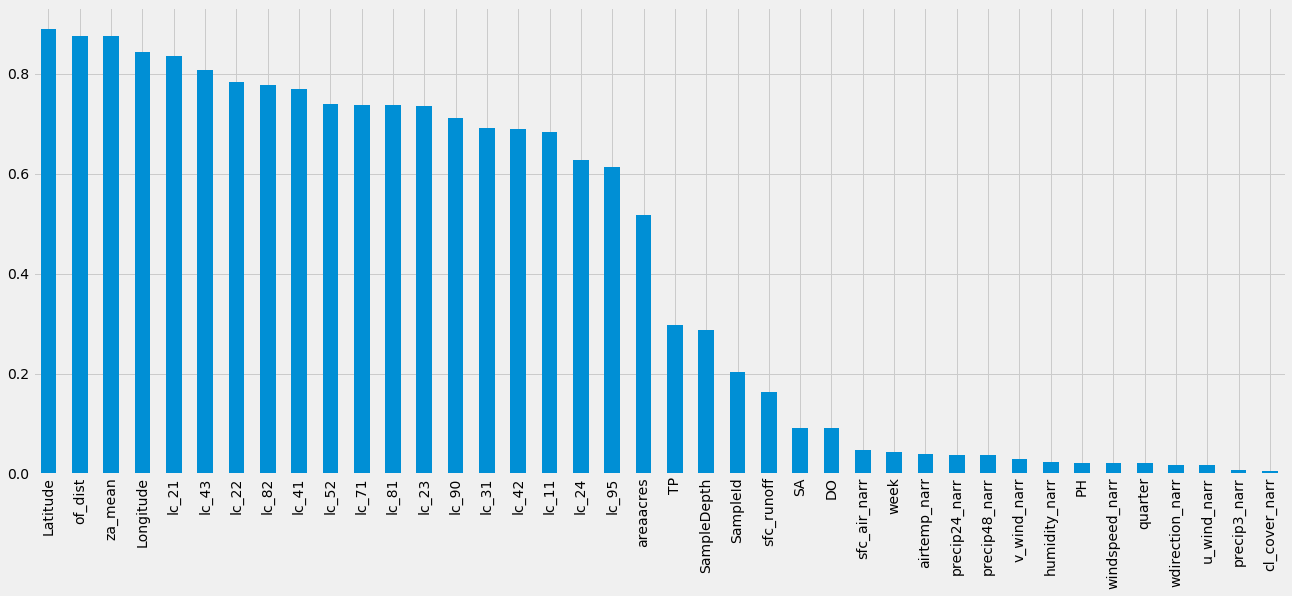

In [286]:
#Barplot
mi.sort_values(ascending = False).plot.bar(figsize = (20,8));


In [287]:
#Might want to drop everything after dissolved Oxygen 

In [288]:
#Lets use SelectKBest and SelectPercentile
#SelectKBest determines how many features to use, while percentile chooses within certain percentile 

In [289]:
sel_ = SelectKBest(mutual_info_regression, k = 20).fit(X_train_n.fillna(0), y_train)
X_train_n.columns[sel_.get_support()] #True False Vector what to keep with True and what to eliminate with False 

Index(['Latitude', 'Longitude', 'areaacres', 'za_mean', 'lc_11', 'lc_21',
       'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52',
       'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'of_dist'],
      dtype='object')

In [290]:
sel_p = SelectPercentile(mutual_info_regression, percentile = 0.05).fit(X_train_n.fillna(0), y_train)
X_train_n.columns[sel_p.get_support()]

Index(['Latitude'], dtype='object')

#### What to Drop so far 
    DO                 0.092647
    SA                 0.089290
    sfc_air_narr       0.047796
    airtemp_narr       0.040444
    precip24_narr      0.037211
    precip48_narr      0.036821
    v_wind_narr        0.028399
    humidity_narr      0.023878
    PH                 0.022037
    windspeed_narr     0.021779
    wdirection_narr    0.017109
    u_wind_narr        0.017065
    precip3_narr       0.005507
    cl_cover_narr      0.001648

HighCorrelation or low explaination 

    lc_24
    lc_23
    lc_31
    lc_52
    lc_71

In [291]:
#MSE with DecisionTreeClassifier

In [292]:
from sklearn.tree import DecisionTreeRegressor

In [293]:
mse_values = []
for feature in X_train_n.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [294]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train_n.columns
mse_values.sort_values(ascending = False)

airtemp_narr       15.267492
windspeed_narr     14.660988
quarter            14.192820
DO                 14.161411
week               14.158612
SA                 14.120906
PH                 14.100977
cl_cover_narr      14.091117
precip3_narr       13.912113
SampleDepth        13.836204
TP                 13.566937
SampleId           13.565394
sfc_runoff         13.299213
of_dist            10.418910
precip48_narr      10.353202
Longitude           9.396732
Latitude            9.367966
precip24_narr       7.749881
sfc_air_narr        7.704277
lc_24               7.416926
lc_31               7.235953
lc_42               7.233319
lc_41               7.232993
lc_43               7.231452
lc_82               7.230906
lc_95               7.227195
lc_23               7.225606
lc_22               7.223858
lc_71               7.223097
lc_90               7.223061
za_mean             7.221241
lc_11               7.217836
lc_21               7.206932
lc_52               7.206297
lc_81         

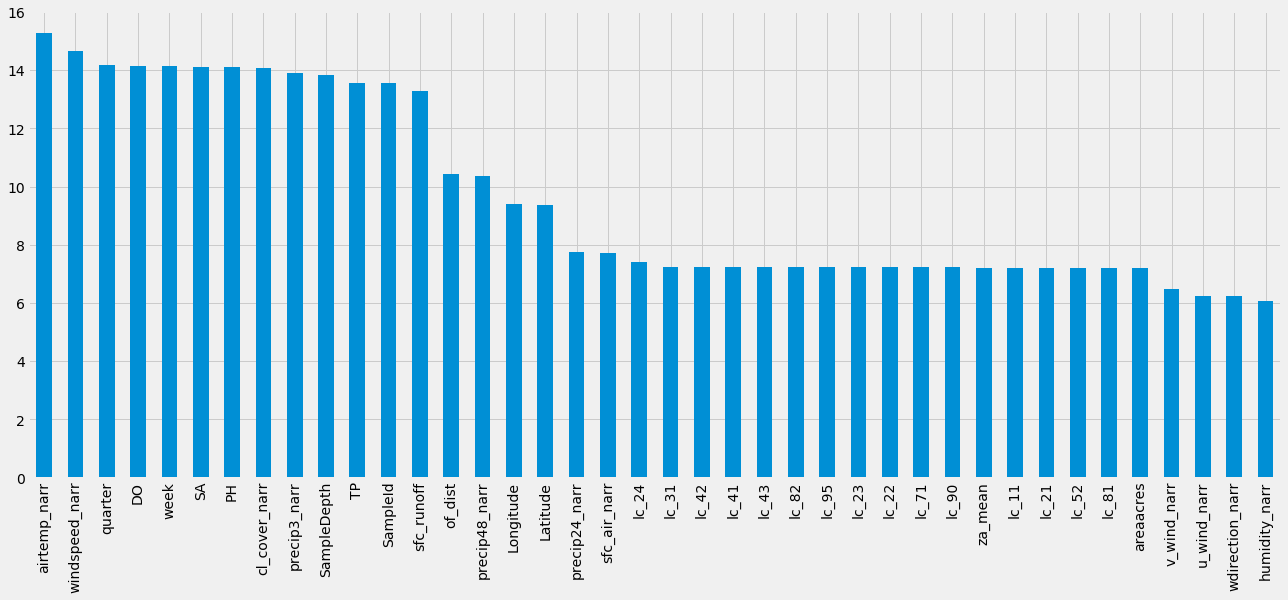

In [295]:
mse_values.sort_values(ascending = False).plot.bar(figsize = (20,8));

In [296]:
X_train = X_train.drop(columns = ['of_dist', 'lc_24', 'lc_23', 'wdirection_narr', 'v_wind_narr', 'lc_31', 'lc_52', 'lc_71', 'DO', 'SA', 'sfc_air_narr',
                                 'airtemp_narr', 'precip24_narr', 'precip48_narr', 'v_wind_narr', 'humidity_narr', 'PH', 'windspeed_narr', 'wdirection_narr',
                                 'u_wind_narr', 'precip3_narr', 'cl_cover_narr'])
X_test = X_test.drop(columns = ['of_dist', 'lc_24', 'lc_23', 'wdirection_narr', 'v_wind_narr', 'lc_31', 'lc_52', 'lc_71', 'DO', 'SA', 'sfc_air_narr',
                                 'airtemp_narr', 'precip24_narr', 'precip48_narr', 'v_wind_narr', 'humidity_narr', 'PH', 'windspeed_narr', 'wdirection_narr',
                                 'u_wind_narr', 'precip3_narr', 'cl_cover_narr'])

In [297]:
X_train.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'SampleId', 'HUC12_', 'COUNTY_',
       'STATE_', 'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_41',
       'lc_42', 'lc_43', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'month', 'year',
       'week', 'dayofweek', 'quarter', 'TP', 'sfc_runoff'],
      dtype='object')

In [ ]:
#Categoricals Chi-Score Fischer Score 

In [229]:
# #Numerics
# objects = ['object']
# cat_vars = list(X_train.select_dtypes(include = objects).columns)
# X_train_c = X_train[cat_vars]

In [ ]:
# def mean_encoding(df_train, df_test):
#     df_train_temp = df_train.copy()
#     df_test_temp = df_test.copy()
    
#     for col in X_train_c:
#         risk_dict = df_train.groupby([col])[]

In [298]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = MinMaxScaler()
imp_mean_scaler = make_pipeline(imp_mean, scaler)
imp_constant = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder()
imp_ohe = make_pipeline(imp_constant, ohe)

In [301]:
ct = make_column_transformer(
    (imp_mean_scaler, ['Latitude', 'Longitude', 'SampleDepth',
       'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_41',
       'lc_42', 'lc_43', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'TP', 'sfc_runoff']),
    (imp_ohe, ['COUNTY_', 'STATE_',  'month', 'year', 'week', 'dayofweek', 'quarter', 'SampleId', 'HUC12_']),
    remainder='passthrough')

In [302]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
#Scaler Information 

In [303]:
rf = RandomForestRegressor(verbose = True, n_jobs = -1)
pipe = make_pipeline(ct, rf)

In [304]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.4min finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'SampleDepth', 'areaacres',
                                                   'za_mean', 'lc_11', 'lc_21',
                                                   'lc_22', 'lc_41', 'lc_42',
                                                   'lc_43', 'lc_81', 'lc_82',
                                                   'lc_90', 'lc_95', 'TP',
                                  

In [305]:
y_pred = pipe.predict(X_test)

ValueError: Found unknown categories [393216.0, 458755.0, 458756.0, 458757.0, 393222.0, 393223.0, 458759.0, 393226.0, 131083.0, 458763.0, 458762.0, 458764.0, 458769.0, 131090.0, 458773.0, 393237.0, 131096.0, 393241.0, 131098.0, 458779.0, 131100.0, 393243.0, 393246.0, 393245.0, 131099.0, 458785.0, 131106.0, 393251.0, 458789.0, 131109.0, 458791.0, 458792.0, 131113.0, 393253.0, 131115.0, 458796.0, 131116.0, 393260.0, 458799.0, 393264.0, 458801.0, 393266.0, 131123.0, 458797.0, 131125.0, 393270.0, 393272.0, 131130.0, 131133.0, 393277.0, 458820.0, 458821.0, 131142.0, 458822.0, 131143.0, 131145.0, 393290.0, 458825.0, 458828.0, 131141.0, 458826.0, 393292.0, 393296.0, 393298.0, 131157.0, 393303.0, 458840.0, 131161.0, 393305.0, 393306.0, 456667.0, 458845.0, 458847.0, 131168.0, 458849.0, 393315.0, 393316.0, 131173.0, 458854.0, 131175.0, 458852.0, 393322.0, 458859.0, 458862.0, 393326.0, 393327.0, 131185.0, 131186.0, 458864.0, 131184.0, 458869.0, 393334.0, 131191.0, 393337.0, 393338.0, 393339.0, 131195.0, 393341.0, 458875.0, 393343.0, 458874.0, 458884.0, 131206.0, 131207.0, 131209.0, 458890.0, 131211.0, 458894.0, 131217.0, 458898.0, 131219.0, 458901.0, 458902.0, 458903.0, 131222.0, 458906.0, 458908.0, 458911.0, 131231.0, 458915.0, 458918.0, 131239.0, 131238.0, 458921.0, 458924.0, 458927.0, 131252.0, 131257.0, 131267.0, 131271.0, 131272.0, 131273.0, 131278.0, 131285.0, 131293.0, 62530.0, 131305.0, 131306.0, 131309.0, 131322.0, 131324.0, 131325.0, 131326.0, 131336.0, 131340.0, 131345.0, 131346.0, 131347.0, 131355.0, 131356.0, 131359.0, 131360.0, 131361.0, 131363.0, 131364.0, 19597.0, 131368.0, 131373.0, 131378.0, 131379.0, 393525.0, 393527.0, 131383.0, 131397.0, 131400.0, 393548.0, 131411.0, 131412.0, 131414.0, 131421.0, 131422.0, 131423.0, 131426.0, 131427.0, 131429.0, 131438.0, 131442.0, 393590.0, 131450.0, 393595.0, 131451.0, 131455.0, 131456.0, 131458.0, 131461.0, 131462.0, 131465.0, 131468.0, 131470.0, 131475.0, 131476.0, 393619.0, 131478.0, 131484.0, 131486.0, 459173.0, 131493.0, 131495.0, 131497.0, 131499.0, 459180.0, 131501.0, 459179.0, 131500.0, 131506.0, 459187.0, 459188.0, 459186.0, 416912.0, 459191.0, 131512.0, 416913.0, 131516.0, 131517.0, 459197.0, 459200.0, 459201.0, 459203.0, 131526.0, 131527.0, 459207.0, 131531.0, 131533.0, 131535.0, 131537.0, 131539.0, 416919.0, 131547.0, 131551.0, 131552.0, 449485.0, 459236.0, 459237.0, 459239.0, 131560.0, 459241.0, 131569.0, 459253.0, 131574.0, 459255.0, 459257.0, 459258.0, 459259.0, 416926.0, 390876.0, 131595.0, 131597.0, 459282.0, 459283.0, 131602.0, 131607.0, 459287.0, 393753.0, 131609.0, 459291.0, 393755.0, 459296.0, 393761.0, 459299.0, 131620.0, 131624.0, 131625.0, 131626.0, 459307.0, 459308.0, 459309.0, 131634.0, 459317.0, 459318.0, 393785.0, 131641.0, 393787.0, 131644.0, 459323.0, 459326.0, 393791.0, 390888.0, 459331.0, 459333.0, 459334.0, 131656.0, 131657.0, 393801.0, 459339.0, 459337.0, 459342.0, 393807.0, 131663.0, 131667.0, 459347.0, 459348.0, 98902.0, 416944.0, 98905.0, 393818.0, 459354.0, 459357.0, 131678.0, 393823.0, 98911.0, 131681.0, 459361.0, 393827.0, 393829.0, 131685.0, 98919.0, 98920.0, 393833.0, 459367.0, 131689.0, 98924.0, 131693.0, 131694.0, 459375.0, 98927.0, 98929.0, 131692.0, 393841.0, 393843.0, 459381.0, 459382.0, 393847.0, 98934.0, 131706.0, 393851.0, 393852.0, 393853.0, 131710.0, 98940.0, 131709.0, 459392.0, 131708.0, 131715.0, 393860.0, 98948.0, 131717.0, 131716.0, 459397.0, 393865.0, 459401.0, 131721.0, 416954.0, 393869.0, 393871.0, 131727.0, 131729.0, 459410.0, 459411.0, 393876.0, 131732.0, 98965.0, 393877.0, 393880.0, 98969.0, 98961.0, 459419.0, 459413.0, 459421.0, 393883.0, 98975.0, 459423.0, 459425.0, 131746.0, 131747.0, 393892.0, 393893.0, 393891.0, 393887.0, 393896.0, 459433.0, 131754.0, 98984.0, 459436.0, 131756.0, 98990.0, 98991.0, 393904.0, 459441.0, 459440.0, 98995.0, 131764.0, 459445.0, 459446.0, 393911.0, 393912.0, 393910.0, 99002.0, 99003.0, 131768.0, 393909.0, 99006.0, 459455.0, 393918.0, 99009.0, 393922.0, 459459.0, 99007.0, 99013.0, 131782.0, 393926.0, 459464.0, 99016.0, 131786.0, 393931.0, 393929.0, 99021.0, 99022.0, 99023.0, 459472.0, 131793.0, 131794.0, 99026.0, 459476.0, 99029.0, 99030.0, 131798.0, 393943.0, 459481.0, 131801.0, 390917.0, 99036.0, 99037.0, 99038.0, 131806.0, 393952.0, 131808.0, 131810.0, 99043.0, 99042.0, 393957.0, 99041.0, 99040.0, 393960.0, 393961.0, 459498.0, 131818.0, 459500.0, 393964.0, 393963.0, 99055.0, 131820.0, 99057.0, 393967.0, 459507.0, 99060.0, 393972.0, 131830.0, 393970.0, 131832.0, 393977.0, 131825.0, 131838.0, 131839.0, 99073.0, 393986.0, 131844.0, 99076.0, 459526.0, 99080.0, 131849.0, 131850.0, 393994.0, 131852.0, 393997.0, 393998.0, 99087.0, 393996.0, 131857.0, 459538.0, 131859.0, 394003.0, 99091.0, 394000.0, 459544.0, 394008.0, 394010.0, 99098.0, 459548.0, 459549.0, 459550.0, 394015.0, 459552.0, 99105.0, 99104.0, 131875.0, 131872.0, 394016.0, 394018.0, 459556.0, 459560.0, 459561.0, 99114.0, 99108.0, 459564.0, 131884.0, 99116.0, 131885.0, 131887.0, 459566.0, 99122.0, 459570.0, 131891.0, 131893.0, 394037.0, 459575.0, 99128.0, 99129.0, 131896.0, 131899.0, 394041.0, 99130.0, 394046.0, 99135.0, 459584.0, 131905.0, 394050.0, 459587.0, 459588.0, 99140.0, 131906.0, 99143.0, 99144.0, 459593.0, 131912.0, 99146.0, 99148.0, 131917.0, 131918.0, 394062.0, 99150.0, 394065.0, 459600.0, 459603.0, 459604.0, 131925.0, 394068.0, 459601.0, 131923.0, 394067.0, 131931.0, 394076.0, 459613.0, 394079.0, 459615.0, 131937.0, 99169.0, 394082.0, 459618.0, 99173.0, 394086.0, 99174.0, 459622.0, 99175.0, 99178.0, 459626.0, 459628.0, 394091.0, 394094.0, 459630.0, 394095.0, 131953.0, 394097.0, 131955.0, 131952.0, 99189.0, 131958.0, 459639.0, 394104.0, 131961.0, 99192.0, 99195.0, 459644.0, 394109.0, 131964.0, 394107.0, 131966.0, 131963.0, 99202.0, 394115.0, 459651.0, 394110.0, 459654.0, 459655.0, 459656.0, 99209.0, 131978.0, 131979.0, 131980.0, 99213.0, 99214.0, 99211.0, 459659.0, 131981.0, 459661.0, 131987.0, 459667.0, 394126.0, 459670.0, 394135.0, 131992.0, 131993.0, 394138.0, 459674.0, 459676.0, 131997.0, 394143.0, 394144.0, 99232.0, 394146.0, 132003.0, 394147.0, 99237.0, 99236.0, 132006.0, 459685.0, 394148.0, 132010.0, 99239.0, 459692.0, 459686.0, 459694.0, 394158.0, 394160.0, 459695.0, 99250.0, 99251.0, 459700.0, 99252.0, 99254.0, 132023.0, 132018.0, 132025.0, 99258.0, 394170.0, 99260.0, 459703.0, 99261.0, 394173.0, 99264.0, 394177.0, 132034.0, 132035.0, 459715.0, 99268.0, 99270.0, 394181.0, 394176.0, 459721.0, 132042.0, 99266.0, 99276.0, 459725.0, 132046.0, 394189.0, 394188.0, 394191.0, 99280.0, 394193.0, 99279.0, 132049.0, 394197.0, 132054.0, 99288.0, 132056.0, 394200.0, 132053.0, 99285.0, 99293.0, 132062.0, 99295.0, 459744.0, 99297.0, 132065.0, 132067.0, 394212.0, 459749.0, 99298.0, 99303.0, 132071.0, 132073.0, 394216.0, 394213.0, 459756.0, 394221.0, 99309.0, 459759.0, 459760.0, 132075.0, 394223.0, 99315.0, 459761.0, 459762.0, 99318.0, 459767.0, 132088.0, 459768.0, 132087.0, 417027.0, 394236.0, 132093.0, 99326.0, 459775.0, 132096.0, 459776.0, 132098.0, 99329.0, 459780.0, 394244.0, 99331.0, 99335.0, 132104.0, 459783.0, 394246.0, 132107.0, 459790.0, 99343.0, 132112.0, 459792.0, 394256.0, 459796.0, 394261.0, 99351.0, 394264.0, 459800.0, 459802.0, 459805.0, 459806.0, 394269.0, 459809.0, 449600.0, 459813.0, 99365.0, 459815.0, 459816.0, 459817.0, 132138.0, 132140.0, 132141.0, 459822.0, 99375.0, 132142.0, 459821.0, 459826.0, 99380.0, 459829.0, 132150.0, 459830.0, 459831.0, 99383.0, 132154.0, 99387.0, 459836.0, 459839.0, 132162.0, 459843.0, 132164.0, 459847.0, 99399.0, 459850.0, 132170.0, 459851.0, 459853.0, 132174.0, 449609.0, 459857.0, 99410.0, 459858.0, 459861.0, 132184.0, 459865.0, 132186.0, 99418.0, 459870.0, 459871.0, 132192.0, 132193.0, 132194.0, 99425.0, 99426.0, 459872.0, 132196.0, 132200.0, 99434.0, 99435.0, 132204.0, 99437.0, 459886.0, 459888.0, 99441.0, 99440.0, 459891.0, 132212.0, 459895.0, 459896.0, 132216.0, 459897.0, 459899.0, 459900.0, 459901.0, 99454.0, 132221.0, 99456.0, 394369.0, 459905.0, 459907.0, 132228.0, 99457.0, 459904.0, 394370.0, 99464.0, 394376.0, 459914.0, 132235.0, 394379.0, 459916.0, 99469.0, 99471.0, 394384.0, 99472.0, 99473.0, 99474.0, 459924.0, 459923.0, 132240.0, 459925.0, 99480.0, 459928.0, 99481.0, 459932.0, 459933.0, 132254.0, 99488.0, 427169.0, 132257.0, 132259.0, 423574.0, 459941.0, 132262.0, 132263.0, 459943.0, 99497.0, 132264.0, 132267.0, 99500.0, 459949.0, 99503.0, 394416.0, 459952.0, 99506.0, 132274.0, 427188.0, 99509.0, 99510.0, 99513.0, 459962.0, 394428.0, 459966.0, 99520.0, 132289.0, 99522.0, 99523.0, 99524.0, 99525.0, 394434.0, 132294.0, 459974.0, 99529.0, 132298.0, 99531.0, 394442.0, 394445.0, 99527.0, 132303.0, 394448.0, 459984.0, 427218.0, 99538.0, 459983.0, 99541.0, 99542.0, 459991.0, 99544.0, 99536.0, 427224.0, 459995.0, 394452.0, 427229.0, 132317.0, 99551.0, 460000.0, 99552.0, 460002.0, 427231.0, 460004.0, 394461.0, 460006.0, 427232.0, 460007.0, 427241.0, 132327.0, 99563.0, 132332.0, 132334.0, 460014.0, 427249.0, 460019.0, 99572.0, 394485.0, 427255.0, 99576.0, 132345.0, 394490.0, 427259.0, 99580.0, 394492.0, 460029.0, 394495.0, 394488.0, 99585.0, 427266.0, 427267.0, 99581.0, 427269.0, 427270.0, 99590.0, 460038.0, 99589.0, 99594.0, 99595.0, 99596.0, 394509.0, 394508.0, 460042.0, 427280.0, 99601.0, 460044.0, 460051.0, 460052.0, 99605.0, 460053.0, 99607.0, 460054.0, 394517.0, 460058.0, 99611.0, 394522.0, 427293.0, 394525.0, 427290.0, 460064.0, 394529.0, 460066.0, 460065.0, 394532.0, 99616.0, 99617.0, 427303.0, 99620.0, 460071.0, 460073.0, 427302.0, 460076.0, 460077.0, 99627.0, 460079.0, 394544.0, 394545.0, 427314.0, 394546.0, 394547.0, 460082.0, 460086.0, 99638.0, 427320.0, 427316.0, 99637.0, 394555.0, 394556.0, 427325.0, 460094.0, 394559.0, 99648.0, 99649.0, 460097.0, 99651.0, 99646.0, 460101.0, 99655.0, 99657.0, 427338.0, 99659.0, 460108.0, 99661.0, 394574.0, 394575.0, 460106.0, 427345.0, 99664.0, 394579.0, 427348.0, 394581.0, 99669.0, 99671.0, 427346.0, 394582.0, 460122.0, 427355.0, 394586.0, 460125.0, 99674.0, 99678.0, 99676.0, 427361.0, 99682.0, 460129.0, 460131.0, 427365.0, 99686.0, 99687.0, 460133.0, 460132.0, 460137.0, 99691.0, 99692.0, 394599.0, 460142.0, 99695.0, 394606.0, 99689.0, 427378.0, 460149.0, 460150.0, 99703.0, 427384.0, 460153.0, 460152.0, 99707.0, 460155.0, 394622.0, 460159.0, 394623.0, 427393.0, 99714.0, 427395.0, 460161.0, 460164.0, 394630.0, 460166.0, 449670.0, 99724.0, 99725.0, 427405.0, 99727.0, 427408.0, 99735.0, 394648.0, 427418.0, 99744.0, 427428.0, 449677.0, 427432.0, 427436.0, 427437.0, 427440.0, 99763.0, 427444.0, 394676.0, 427446.0, 449681.0, 394683.0, 99775.0, 99780.0, 460230.0, 394695.0, 394696.0, 394694.0, 99788.0, 460237.0, 394703.0, 427472.0, 99792.0, 427475.0, 394708.0, 99798.0, 460247.0, 427480.0, 394713.0, 427482.0, 460251.0, 427484.0, 99805.0, 427486.0, 99799.0, 460256.0, 427488.0, 394722.0, 99811.0, 394724.0, 460254.0, 427492.0, 427496.0, 99817.0, 460265.0, 427499.0, 460269.0, 460271.0, 460272.0, 394737.0, 394735.0, 427504.0, 460276.0, 460277.0, 427510.0, 394742.0, 460280.0, 427513.0, 460282.0, 394747.0, 394746.0, 99837.0, 99838.0, 460285.0, 427518.0, 394744.0, 394754.0, 99842.0, 427524.0, 460293.0, 460294.0, 460295.0, 394759.0, 427529.0, 99850.0, 460296.0, 427532.0, 460301.0, 427534.0, 460303.0, 427536.0, 427537.0, 427538.0, 394770.0, 460309.0, 394774.0, 427543.0, 427544.0, 460313.0, 427545.0, 427546.0, 427548.0, 460317.0, 99870.0, 427551.0, 460314.0, 99873.0, 99866.0, 99875.0, 99876.0, 394788.0, 427558.0, 427559.0, 460328.0, 460323.0, 460327.0, 99883.0, 460332.0, 99884.0, 99886.0, 460335.0, 427563.0, 99889.0, 460337.0, 460342.0, 394807.0, 394808.0, 460344.0, 99898.0, 99903.0, 427584.0, 460353.0, 460354.0, 460352.0, 460356.0, 394818.0, 394822.0, 460359.0, 460360.0, 427590.0, 394826.0, 99914.0, 460363.0, 427597.0, 99918.0, 99919.0, 427599.0, 460369.0, 460370.0, 427603.0, 99924.0, 460373.0, 99926.0, 99927.0, 460374.0, 99925.0, 99930.0, 427611.0, 99931.0, 460381.0, 394847.0, 460383.0, 460385.0, 99936.0, 427619.0, 99940.0, 99941.0, 460388.0, 99943.0, 394856.0, 460393.0, 394858.0, 427624.0, 394857.0, 460397.0, 394861.0, 99946.0, 99952.0, 427633.0, 394866.0, 460401.0, 460400.0, 427634.0, 394870.0, 427639.0, 99958.0, 99961.0, 99962.0, 394874.0, 394876.0, 427645.0, 394878.0, 427647.0, 99963.0, 460417.0, 99970.0, 460419.0, 99971.0, 427651.0, 460422.0, 427646.0, 394888.0, 394889.0, 99978.0, 427659.0, 99980.0, 460428.0, 460430.0, 427663.0, 99981.0, 460433.0, 460434.0, 394892.0, 427668.0, 394902.0, 99991.0, 460441.0, 427675.0, 460444.0, 99997.0, 460443.0, 99996.0, 394912.0, 427685.0, 460454.0, 394918.0, 460456.0, 427689.0, 100012.0, 100013.0, 394925.0, 100015.0, 427693.0, 427698.0, 100018.0, 100020.0, 100021.0, 427705.0, 427708.0, 427709.0, 427710.0, 427716.0, 394949.0, 427718.0, 394950.0, 100041.0, 100042.0, 100043.0, 394955.0, 427725.0, 100046.0, 427724.0, 394956.0, 394959.0, 427730.0, 394963.0, 423684.0, 460502.0, 427736.0, 394971.0, 427740.0, 100061.0, 100062.0, 460507.0, 427744.0, 394973.0, 427739.0, 394979.0, 427748.0, 427749.0, 427750.0, 427745.0, 427752.0, 427753.0, 394987.0, 427756.0, 394988.0, 394991.0, 427760.0, 394993.0, 100082.0, 394995.0, 100080.0, 100085.0, 100083.0, 394999.0, 427768.0, 100088.0, 100089.0, 394998.0, 427766.0, 100093.0, 395006.0, 427769.0, 395008.0, 427777.0, 100095.0, 100101.0, 100104.0, 427785.0, 427789.0, 427790.0, 427795.0, 100116.0, 427797.0, 100121.0, 100122.0, 100123.0, 427806.0, 427807.0, 100126.0, 427810.0, 100130.0, 427812.0, 100132.0, 427815.0, 427816.0, 100137.0, 427818.0, 427819.0, 427823.0, 100144.0, 427824.0, 427825.0, 100147.0, 100151.0, 427831.0, 427833.0, 427836.0, 427837.0, 427838.0, 100160.0, 100161.0, 427842.0, 427843.0, 100165.0, 100166.0, 427847.0, 427848.0, 417195.0, 427853.0, 100175.0, 100176.0, 427857.0, 100178.0, 100180.0, 427862.0, 100185.0, 100186.0, 427867.0, 427870.0, 427871.0, 100193.0, 427874.0, 427873.0, 427879.0, 427880.0, 100201.0, 100207.0, 427888.0, 100212.0, 427895.0, 100219.0, 427901.0, 427903.0, 427906.0, 100227.0, 100226.0, 100228.0, 100231.0, 100234.0, 100248.0, 100255.0, 449779.0, 100265.0, 100267.0, 100269.0, 100270.0, 100277.0, 100282.0, 100287.0, 460737.0, 100290.0, 460739.0, 100289.0, 100295.0, 460743.0, 460746.0, 456299.0, 100301.0, 100302.0, 100304.0, 460759.0, 460761.0, 100318.0, 100321.0, 460771.0, 100324.0, 100323.0, 460774.0, 100328.0, 460778.0, 460781.0, 460785.0, 100338.0, 460787.0, 100337.0, 100339.0, 100346.0, 460794.0, 449796.0, 100352.0, 460800.0, 100355.0, 460804.0, 460813.0, 100366.0, 100369.0, 100371.0, 460820.0, 100372.0, 460822.0, 460823.0, 100375.0, 460826.0, 460827.0, 395294.0, 395295.0, 460833.0, 460834.0, 395298.0, 100388.0, 100387.0, 395303.0, 100392.0, 395305.0, 460842.0, 460843.0, 395308.0, 100396.0, 100398.0, 460846.0, 395307.0, 395313.0, 395314.0, 460849.0, 460852.0, 460853.0, 100406.0, 460861.0, 100413.0, 100415.0, 100416.0, 100420.0, 100421.0, 460870.0, 100422.0, 460872.0, 460869.0, 100423.0, 395337.0, 395333.0, 100429.0, 460875.0, 100430.0, 100426.0, 456324.0, 456325.0, 100435.0, 100440.0, 460889.0, 460890.0, 100442.0, 460892.0, 460893.0, 460894.0, 100448.0, 395361.0, 395365.0, 100454.0, 100455.0, 395367.0, 100457.0, 100458.0, 395370.0, 100460.0, 460909.0, 460913.0, 460914.0, 100470.0, 460919.0, 395383.0, 460923.0, 100476.0, 395389.0, 460925.0, 395393.0, 460929.0, 100485.0, 460933.0, 460935.0, 2184.0, 100490.0, 100491.0, 2186.0, 2189.0, 460942.0, 100494.0, 395408.0, 460945.0, 2193.0, 2194.0, 395409.0, 2191.0, 2198.0, 100502.0, 460947.0, 2192.0, 395411.0, 100508.0, 2205.0, 460956.0, 460959.0, 460958.0, 460964.0, 100518.0, 100520.0, 2217.0, 2218.0, 460971.0, 100525.0, 460974.0, 395439.0, 395440.0, 2223.0, 2225.0, 2227.0, 395444.0, 395448.0, 100537.0, 395451.0, 100540.0, 395452.0, 100541.0, 100543.0, 2239.0, 395457.0, 2241.0, 460992.0, 460990.0, 100549.0, 100542.0, 2240.0, 2248.0, 100545.0, 456349.0, 456350.0, 395469.0, 2254.0, 2255.0, 100560.0, 395473.0, 100562.0, 2256.0, 2258.0, 2259.0, 2257.0, 2263.0, 100565.0, 395472.0, 100567.0, 2267.0, 100572.0, 100566.0, 100576.0, 2275.0, 100580.0, 100579.0, 100582.0, 2278.0, 100588.0, 100589.0, 100590.0, 456357.0, 100593.0, 461046.0, 100598.0, 461048.0, 100601.0, 417281.0, 2299.0, 461052.0, 2302.0, 2303.0, 461056.0, 2305.0, 461057.0, 67844.0, 100614.0, 2311.0, 67848.0, 461066.0, 461068.0, 67852.0, 67854.0, 461071.0, 67855.0, 67857.0, 67858.0, 2322.0, 67856.0, 461077.0, 2325.0, 67863.0, 461080.0, 67866.0, 461084.0, 461085.0, 461087.0, 461089.0, 67873.0, 100644.0, 461093.0, 67877.0, 2343.0, 100647.0, 2345.0, 2340.0, 100651.0, 67883.0, 2349.0, 67886.0, 461096.0, 100656.0, 67888.0, 67890.0, 2348.0, 456371.0, 100662.0, 100663.0, 67898.0, 100667.0, 67899.0, 100666.0, 67902.0, 67903.0, 67904.0, 100673.0, 2372.0, 100678.0, 67912.0, 100683.0, 2379.0, 2381.0, 100686.0, 67916.0, 2384.0, 2385.0, 2386.0, 100691.0, 2387.0, 100695.0, 2395.0, 100700.0, 67933.0, 100702.0, 67935.0, 2400.0, 2401.0, 2402.0, 100707.0, 67940.0, 100709.0, 67942.0, 100705.0, 100714.0, 2411.0, 100717.0, 100718.0, 67951.0, 461168.0, 100722.0, 100723.0, 100724.0, 2420.0, 2422.0, 100727.0, 100728.0, 2423.0, 461178.0, 2427.0, 461180.0, 67965.0, 100732.0, 67967.0, 67959.0, 100737.0, 2434.0, 2435.0, 67969.0, 100741.0, 2439.0, 67975.0, 100746.0, 2442.0, 100748.0, 100750.0, 67982.0, 2446.0, 100753.0, 67986.0, 100755.0, 67983.0, 67989.0, 67990.0, 2456.0, 100760.0, 100762.0, 67997.0, 2462.0, 67999.0, 68000.0, 2465.0, 68002.0, 2464.0, 100773.0, 68006.0, 100774.0, 2472.0, 391265.0, 2474.0, 100780.0, 68013.0, 100782.0, 68015.0, 461231.0, 100783.0, 100787.0, 461237.0, 2485.0, 461239.0, 2486.0, 461240.0, 2490.0, 2492.0, 68029.0, 2494.0, 428479.0, 100800.0, 461249.0, 68031.0, 68033.0, 461251.0, 428485.0, 461254.0, 68039.0, 461256.0, 428488.0, 68040.0, 461253.0, 428492.0, 2507.0, 100814.0, 68047.0, 428496.0, 461265.0, 100817.0, 100819.0, 100818.0, 68045.0, 68054.0, 428494.0, 461269.0, 428505.0, 461273.0, 461275.0, 100828.0, 428509.0, 100830.0, 428508.0, 68056.0, 100833.0, 428511.0, 68068.0, 100837.0, 68070.0, 461286.0, 100840.0, 461289.0, 461288.0, 2539.0, 461292.0, 2541.0, 100845.0, 428527.0, 100848.0, 461297.0, 428528.0, 68083.0, 428531.0, 428533.0, 68078.0, 461303.0, 68085.0, 461305.0, 461302.0, 461307.0, 428539.0, 428540.0, 428542.0, 2559.0, 461311.0, 68093.0, 461314.0, 461309.0, 428546.0, 68092.0, 2566.0, 461318.0, 461320.0, 428545.0, 68106.0, 2571.0, 68107.0, 461316.0, 68105.0, 428559.0, 461319.0, 461321.0, 2578.0, 68115.0, 2580.0, 461328.0, 2582.0, 428564.0, 461336.0, 68120.0, 428570.0, 2588.0, 68125.0, 428573.0, 2591.0, 68126.0, 68129.0, 428578.0, 68131.0, 461348.0, 2589.0, 428577.0, 461346.0, 2596.0, 461353.0, 461354.0, 2603.0, 2605.0, 68142.0, 2607.0, 461357.0, 428593.0, 461362.0, 2611.0, 68147.0, 68149.0, 428594.0, 428597.0, 461368.0, 2615.0, 2616.0, 428603.0, 428604.0, 2621.0, 68150.0, 68158.0, 68160.0, 2617.0, 428611.0, 68165.0, 2631.0, 428615.0, 461385.0, 461386.0, 461387.0, 68172.0, 428620.0, 68173.0, 2639.0, 2640.0, 428625.0, 428619.0, 461395.0, 2644.0, 428629.0, 428630.0, 428628.0, 2645.0, 68185.0, 2649.0, 428634.0, 68188.0, 428633.0, 461406.0, 68190.0, 68192.0, 68186.0, 68194.0, 461411.0, 428644.0, 68197.0, 461414.0, 428647.0, 2662.0, 428648.0, 68202.0, 2667.0, 2668.0, 68204.0, 428654.0, 428653.0, 461424.0, 428657.0, 428658.0, 461427.0, 68212.0, 68208.0, 428662.0, 2678.0, 68214.0, 68217.0, 2682.0, 428667.0, 461436.0, 428668.0, 428665.0, 461437.0, 68219.0, 461441.0, 2689.0, 428673.0, 68225.0, 461445.0, 461446.0, 2693.0, 2696.0, 428681.0, 428682.0, 68233.0, 68234.0, 2695.0, 68230.0, 68239.0, 461453.0, 68241.0, 2699.0, 461459.0, 461461.0, 2710.0, 428696.0, 428697.0, 68248.0, 461466.0, 461468.0, 461464.0, 461470.0, 428703.0, 2720.0, 461465.0, 461474.0, 2717.0, 428708.0, 2725.0, 428701.0, 428712.0, 461480.0, 461482.0, 428715.0, 428716.0, 461485.0, 428718.0, 461486.0, 428720.0, 428721.0, 461484.0, 2734.0, 428724.0, 2740.0, 461493.0, 2742.0, 461495.0, 461496.0, 68280.0, 461498.0, 2747.0, 428732.0, 68282.0, 461502.0, 2743.0, 68288.0, 428737.0, 428736.0, 461507.0, 68290.0, 461505.0, 68295.0, 428742.0, 461515.0, 2763.0, 68302.0, 68304.0, 428753.0, 428754.0, 461522.0, 461523.0, 68310.0, 68311.0, 461528.0, 428760.0, 2777.0, 68315.0, 2780.0, 2781.0, 68318.0, 461535.0, 461536.0, 428770.0, 461539.0, 2788.0, 130812.0, 2790.0, 461542.0, 68326.0, 461545.0, 2791.0, 428779.0, 68332.0, 2795.0, 428782.0, 68328.0, 68336.0, 68337.0, 461553.0, 2803.0, 2801.0, 68341.0, 2806.0, 428791.0, 68344.0, 68343.0, 461557.0, 428792.0, 2812.0, 461565.0, 461561.0, 68351.0, 461562.0, 428801.0, 461569.0, 68355.0, 461572.0, 2819.0, 461571.0, 428803.0, 428807.0, 461577.0, 428802.0, 68360.0, 2828.0, 461580.0, 2830.0, 2826.0, 428816.0, 428817.0, 461586.0, 68370.0, 428820.0, 68371.0, 428818.0, 68375.0, 68376.0, 428819.0, 428826.0, 461595.0, 428827.0, 461592.0, 68383.0, 2847.0, 68384.0, 461602.0, 428835.0, 2851.0, 2850.0, 428836.0, 68391.0, 461607.0, 2857.0, 428842.0, 2855.0, 68393.0, 461613.0, 2860.0, 428847.0, 428843.0, 461611.0, 68402.0, 68403.0, 428852.0, 428849.0, 428854.0, 2871.0, 461624.0, 428857.0, 2874.0, 428855.0, 461628.0, 2873.0, 68414.0, 428862.0, 428863.0, 461627.0, 2882.0, 461636.0, 2884.0, 68423.0, 461640.0, 428873.0, 461642.0, 461639.0, 461644.0, 68428.0, 68425.0, 428879.0, 428880.0, 461649.0, 428882.0, 461648.0, 428884.0, 68436.0, 2902.0, 461652.0, 428888.0, 2904.0, 428890.0, 461656.0, 68437.0, 428891.0, 461665.0, 428898.0, 2915.0, 68449.0, 2917.0, 428897.0, 428903.0, 461667.0, 2921.0, 428905.0, 428907.0, 2924.0, 68458.0, 428910.0, 428911.0, 2930.0, 68467.0, 428917.0, 2934.0, 68471.0, 428918.0, 449973.0, 428922.0, 428923.0, 428924.0, 68477.0, 428925.0, 461695.0, 2944.0, 461697.0, 461696.0, 428928.0, 428932.0, 2949.0, 2950.0, 461703.0, 428934.0, 449656.0, 428938.0, 461707.0, 428939.0, 2955.0, 461708.0, 428943.0, 68495.0, 68494.0, 2962.0, 428947.0, 2964.0, 68501.0, 461716.0, 461712.0, 428954.0, 428955.0, 428956.0, 428957.0, 461726.0, 2975.0, 461728.0, 68513.0, 461730.0, 2979.0, 68514.0, 428965.0, 2981.0, 428964.0, 68520.0, 2985.0, 461737.0, 68519.0, 461734.0, 428973.0, 461742.0, 2990.0, 428976.0, 2993.0, 68524.0, 68531.0, 461748.0, 461751.0, 428986.0, 428989.0, 428991.0, 428994.0, 68547.0, 3012.0, 461763.0, 428995.0, 461764.0, 428998.0, 429001.0, 3018.0, 68554.0, 429002.0, 461772.0, 461774.0, 3023.0, 3024.0, 461776.0, 3026.0, 429009.0, 429012.0, 3028.0, 3030.0, 429014.0, 461784.0, 3033.0, 429019.0, 3036.0, 3035.0, 68574.0, 429022.0, 68575.0, 3041.0, 429021.0, 429027.0, 3044.0, 3043.0, 68582.0, 3045.0, 68584.0, 3049.0, 429034.0, 68585.0, 3052.0, 461802.0, 461806.0, 429039.0, 68592.0, 461808.0, 3056.0, 68595.0, 68596.0, 3058.0, 3059.0, 68599.0, 68600.0, 3065.0, 429050.0, 429044.0, 461814.0, 68601.0, 68598.0, 429055.0, 461824.0, 68609.0, 68608.0, 429059.0, 461827.0, 3077.0, 461830.0, 461831.0, 429064.0, 3081.0, 68615.0, 68612.0, 461835.0, 68621.0, 3087.0, 429071.0, 461839.0, 68623.0, 461843.0, 68627.0, 429077.0, 461846.0, 429079.0, 429080.0, 3098.0, 429082.0, 68634.0, 461851.0, 3102.0, 461853.0, 68635.0, 461857.0, 429089.0, 461854.0, 461855.0, 461861.0, 3109.0, 429093.0, 429096.0, 3113.0, 68648.0, 68651.0, 68652.0, 3117.0, 68653.0, 429098.0, 68656.0, 429104.0, 461874.0, 429106.0, 429105.0, 461877.0, 3118.0, 429111.0, 461880.0, 3127.0, 429114.0, 68663.0, 429109.0, 3131.0, 68670.0, 3129.0, 68672.0, 3132.0, 461890.0, 3134.0, 68676.0, 68677.0, 461893.0, 3142.0, 429128.0, 3145.0, 68680.0, 461899.0, 461900.0, 20164.0, 423963.0, 461903.0, 429136.0, 68689.0, 429137.0, 68691.0, 461908.0, 68693.0, 3158.0, 3159.0, 429144.0, 429141.0, 461910.0, 461915.0, 68694.0, 461917.0, 461918.0, 429150.0, 429152.0, 461921.0, 3170.0, 429153.0, 429156.0, 68709.0, 68710.0, 461927.0, 68712.0, 429161.0, 461929.0, 3178.0, 68715.0, 429162.0, 461931.0, 3182.0, 429168.0, 429169.0, 3186.0, 461937.0, 429172.0, 461940.0, 461942.0, 3190.0, 68727.0, 429175.0, 3192.0, 68731.0, 461948.0, 68733.0, 461950.0, 429182.0, 68736.0, 3199.0, 429183.0, 68739.0, 461955.0, 429189.0, 429188.0, 461957.0, 429190.0, 429192.0, 68746.0, 3210.0, 68749.0, 461965.0, 461967.0, 68751.0, 3217.0, 429200.0, 3216.0, 68756.0, 461970.0, 461974.0, 3223.0, 429208.0, 429209.0, 429204.0, 461979.0, 68764.0, 461981.0, 461976.0, 3231.0, 422305.0, 461985.0, 423981.0, 68772.0, 68773.0, 461988.0, 429223.0, 429224.0, 3240.0, 3242.0, 429227.0, 3239.0, 68777.0, 461998.0, 429231.0, 462000.0, 3249.0, 68783.0, 429233.0, 462004.0, 3253.0, 429238.0, 429239.0, 3256.0, 462007.0, 462012.0, 429244.0, 3264.0, 117881.0, 429250.0, 3267.0, 462018.0, 423608.0, 462023.0, 462024.0, 462028.0, 68813.0, 462029.0, 3276.0, 429264.0, 462030.0, 462038.0, 68823.0, 3291.0, 429277.0, 429278.0, 3295.0, 429281.0, 429282.0, 3299.0, 429283.0, 3297.0, 68839.0, 429290.0, 429292.0, 462061.0, 3310.0, 462060.0, 68848.0, 462065.0, 429298.0, 462067.0, 68852.0, 3318.0, 3319.0, 429304.0, 429305.0, 3320.0, 68855.0, 462076.0, 3324.0, 429310.0, 3327.0, 462080.0, 3329.0, 3326.0, 462079.0, 429308.0, 3333.0, 68866.0, 462091.0, 429324.0, 3344.0, 3346.0, 3347.0, 429331.0, 68884.0, 429334.0, 429335.0, 429330.0, 3354.0, 3358.0, 3359.0, 429344.0, 429347.0, 68899.0, 3364.0, 429351.0, 68905.0, 429354.0, 429355.0, 429356.0, 429357.0, 3373.0, 3372.0, 429360.0, 68913.0, 68917.0, 3387.0, 429372.0, 68928.0, 429376.0, 429378.0, 450064.0, 3397.0, 429382.0, 3399.0, 68936.0, 3398.0, 429383.0, 3403.0, 68939.0, 429388.0, 68942.0, 68943.0, 429391.0, 68945.0, 3411.0, 68949.0, 3414.0, 429397.0, 3419.0, 68956.0, 429405.0, 429403.0, 68959.0, 3424.0, 429408.0, 68961.0, 396641.0, 68964.0, 3427.0, 68966.0, 3431.0, 429412.0, 68969.0, 3433.0, 68970.0, 429420.0, 3437.0, 68974.0, 68975.0, 429424.0, 396653.0, 3442.0, 68978.0, 3439.0, 396661.0, 3445.0, 68983.0, 396659.0, 396663.0, 396657.0, 429435.0, 68987.0, 68989.0, 68990.0, 3461.0, 3462.0, 396679.0, 396683.0, 429451.0, 429453.0, 429454.0, 396687.0, 69006.0, 429452.0, 396690.0, 69010.0, 396692.0, 3477.0, 69014.0, 69012.0, 3479.0, 429465.0, 69018.0, 429467.0, 69020.0, 3485.0, 429466.0, 3482.0, 69024.0, 69025.0, 3481.0, 69026.0, 3492.0, 69029.0, 396708.0, 429477.0, 396707.0, 396713.0, 3498.0, 69033.0, 396716.0, 429483.0, 3502.0, 429486.0, 69040.0, 3504.0, 396722.0, 69042.0, 69038.0, 69043.0, 69046.0, 396727.0, 396728.0, 429496.0, 429498.0, 3515.0, 69052.0, 396730.0, 429500.0, 396735.0, 396736.0, 429499.0, 396738.0, 3520.0, 429504.0, 396739.0, 396742.0, 3527.0, 396743.0, 396745.0, 429514.0, 69061.0, 69068.0, 3525.0, 429512.0, 3535.0, 396747.0, 429520.0, 69065.0, 396755.0, 69076.0, 69077.0, 3541.0, 69079.0, 69080.0, 396760.0, 396762.0, 69083.0, 69082.0, 3549.0, 69086.0, 3551.0, 3552.0, 69085.0, 396767.0, 3555.0, 396771.0, 69087.0, 3554.0, 456609.0, 3560.0, 69096.0, 429545.0, 69098.0, 429548.0, 396781.0, 456610.0, 396783.0, 69107.0, 396787.0, 3574.0, 3575.0, 3576.0, 429561.0, 69114.0, 69112.0, 429564.0, 69117.0, 69118.0, 429562.0, 3581.0, 3580.0, 3586.0, 424051.0, 69124.0, 3592.0, 396809.0, 3594.0, 3597.0, 3598.0, 69135.0, 429584.0, 396821.0, 3607.0, 69143.0, 396825.0, 3611.0, 3612.0, 69148.0, 3614.0, 429599.0, 69152.0, 3616.0, 3618.0, 396835.0, 69156.0, 429605.0, 3622.0, 429606.0, 429608.0, 3621.0, 69153.0, 396843.0, 3628.0, 69164.0, 429614.0, 3632.0, 3633.0, 429618.0, 429617.0, 3636.0, 396853.0, 69174.0, 69175.0, 3638.0, 429624.0, 3642.0, 396859.0, 69180.0, 69179.0, 69182.0, 3647.0, 396864.0, 429633.0, 3644.0, 396867.0, 429636.0, 3652.0, 69189.0, 3655.0, 69183.0, 429641.0, 429643.0, 3659.0, 396877.0, 69195.0, 429647.0, 396880.0, 429649.0, 3667.0, 396883.0, 429653.0, 429654.0, 3672.0, 429657.0, 396890.0, 396891.0, 396889.0, 3675.0, 396893.0, 429663.0, 396895.0, 429665.0, 396898.0, 396899.0, 3684.0, 396901.0, 3687.0, 3688.0, 396904.0, 396906.0, 429674.0, 396903.0, 429677.0, 429678.0, 429679.0, 429680.0, 3697.0, 3693.0, 69235.0, 429675.0, 396917.0, 396918.0, 3702.0, 3700.0, 3706.0, 429691.0, 69244.0, 69245.0, 3710.0, 396927.0, 396928.0, 429696.0, 3714.0, 69250.0, 429698.0, 396933.0, 429701.0, 396935.0, 69255.0, 429705.0, 3722.0, 429703.0, 429708.0, 396940.0, 396942.0, 3727.0, 3724.0, 396947.0, 429717.0, 396950.0, 396951.0, 69271.0, 429721.0, 69274.0, 429720.0, 429724.0, 396953.0, 69272.0, 396959.0, 429722.0, 420865.0, 429731.0, 396965.0, 69286.0, 3750.0, 429736.0, 69288.0, 429738.0, 429734.0, 396966.0, 69293.0, 396977.0, 69298.0, 429747.0, 396978.0, 429749.0, 396982.0, 396980.0, 3768.0, 396985.0, 69306.0, 396987.0, 429752.0, 396983.0, 3774.0, 429758.0, 429760.0, 429759.0, 69314.0, 429763.0, 69316.0, 429764.0, 396997.0, 429767.0, 429768.0, 397002.0, 397004.0, 3788.0, 397006.0, 3791.0, 69328.0, 429772.0, 3794.0, 3795.0, 69330.0, 3797.0, 429774.0, 69332.0, 69336.0, 429777.0, 429778.0, 3803.0, 69337.0, 397021.0, 3806.0, 397023.0, 69343.0, 3809.0, 69342.0, 69348.0, 397029.0, 3816.0, 69353.0, 3817.0, 3821.0, 429810.0, 69362.0, 69368.0, 69369.0, 429818.0, 397049.0, 3836.0, 69373.0, 424100.0, 3840.0, 3841.0, 69377.0, 69379.0, 3843.0, 429829.0, 397062.0, 397063.0, 429832.0, 3848.0, 69383.0, 69387.0, 397064.0, 429833.0, 3847.0, 69391.0, 3856.0, 397073.0, 397074.0, 429840.0, 429844.0, 429845.0, 3862.0, 397079.0, 69392.0, 397072.0, 397082.0, 3869.0, 3870.0, 397087.0, 397088.0, 3872.0, 69410.0, 69411.0, 397089.0, 3877.0, 397094.0, 429863.0, 3879.0, 3880.0, 397090.0, 3874.0, 69420.0, 429868.0, 3886.0, 3888.0, 3889.0, 429875.0, 3892.0, 397108.0, 429879.0, 3898.0, 429883.0, 3901.0, 429886.0, 397117.0, 397118.0, 3905.0, 3908.0, 69445.0, 397124.0, 3909.0, 397128.0, 397129.0, 3913.0, 397127.0, 397134.0, 424117.0, 397136.0, 397137.0, 3921.0, 397140.0, 397141.0, 3924.0, 3929.0, 3930.0, 69466.0, 397148.0, 3935.0, 429920.0, 3936.0, 397153.0, 391556.0, 3940.0, 397156.0, 429926.0, 397158.0, 429928.0, 397162.0, 429931.0, 3948.0, 397165.0, 429934.0, 3946.0, 397164.0, 69489.0, 3950.0, 397167.0, 397172.0, 429940.0, 69494.0, 397175.0, 3951.0, 397177.0, 3962.0, 397178.0, 397180.0, 3965.0, 397179.0, 429951.0, 429950.0, 429953.0, 3970.0, 429955.0, 397187.0, 3971.0, 397189.0, 3973.0, 397191.0, 429956.0, 397193.0, 3977.0, 397194.0, 3976.0, 69517.0, 397198.0, 69516.0, 397199.0, 69522.0, 3980.0, 397204.0, 69524.0, 69526.0, 3991.0, 3992.0, 3993.0, 69525.0, 69531.0, 397211.0, 397208.0, 69534.0, 3999.0, 397215.0, 397213.0, 69539.0, 397220.0, 4008.0, 69547.0, 4012.0, 4014.0, 397230.0, 4017.0, 69553.0, 4019.0, 69556.0, 397236.0, 69554.0, 4023.0, 4024.0, 397240.0, 397242.0, 69562.0, 69567.0, 69571.0, 397252.0, 4041.0, 69577.0, 397259.0, 69579.0, 69581.0, 69582.0, 69587.0, 69589.0, 4054.0, 69591.0, 69593.0, 4059.0, 397276.0, 397282.0, 397283.0, 4067.0, 397285.0, 4070.0, 69604.0, 4071.0, 4068.0, 397290.0, 4074.0, 131068.0, 397293.0, 397294.0, 4081.0, 4083.0, 4085.0, 397302.0, 4087.0, 69622.0, 69625.0, 69624.0, 69626.0, 397303.0, 397309.0, 397310.0, 4095.0, 397311.0, 397313.0, 69634.0, 4096.0, 4100.0, 397316.0, 4102.0, 397319.0, 69640.0, 397321.0, 69642.0, 397323.0, 4107.0, 4109.0, 397328.0, 4116.0, 397335.0, 397337.0, 4123.0, 397342.0, 4127.0, 69665.0, 4133.0, 69670.0, 397353.0, 4138.0, 4139.0, 69676.0, 397355.0, 69675.0, 4144.0, 69683.0, 4147.0, 69688.0, 397368.0, 397370.0, 69691.0, 397372.0, 397373.0, 4156.0, 4154.0, 69692.0, 69695.0, 397375.0, 69697.0, 4161.0, 397377.0, 397380.0, 4165.0, 397383.0, 397385.0, 4170.0, 397387.0, 397386.0, 4172.0, 69708.0, 397391.0, 69713.0, 4178.0, 69716.0, 69717.0, 397397.0, 69718.0, 4184.0, 397402.0, 69723.0, 4187.0, 69724.0, 4192.0, 69729.0, 69730.0, 69733.0, 4198.0, 397414.0, 69736.0, 69735.0, 4202.0, 69739.0, 4208.0, 69745.0, 397425.0, 397427.0, 4212.0, 4213.0, 4211.0, 4215.0, 397431.0, 397436.0, 4222.0, 4224.0, 397441.0, 397442.0, 4227.0, 4225.0, 4229.0, 4232.0, 4235.0, 397459.0, 4245.0, 4247.0, 4248.0, 397464.0, 4250.0, 4251.0, 4249.0, 397469.0, 397470.0, 397474.0, 397475.0, 397476.0, 20385.0, 4262.0, 397479.0, 4264.0, 397480.0, 397482.0, 397485.0, 397490.0, 397491.0, 397495.0, 397496.0, 397500.0, 397507.0, 131111.0, 397509.0, 397517.0, 397523.0, 397525.0, 397530.0, 397535.0, 397539.0, 397540.0, 397543.0, 397544.0, 397551.0, 397553.0, 20401.0, 397557.0, 397558.0, 397559.0, 397563.0, 397571.0, 397578.0, 397580.0, 397581.0, 397582.0, 397585.0, 397588.0, 397594.0, 397598.0, 397600.0, 397605.0, 397611.0, 397612.0, 397614.0, 397618.0, 397621.0, 397622.0, 397624.0, 397626.0, 397627.0, 397635.0, 397641.0, 397642.0, 397646.0, 397650.0, 397655.0, 397656.0, 397657.0, 397658.0, 397659.0, 397660.0, 397669.0, 397671.0, 397673.0, 397674.0, 397680.0, 397685.0, 39966.0, 397691.0, 397699.0, 397705.0, 397709.0, 397714.0, 397722.0, 397725.0, 397726.0, 397729.0, 397730.0, 397731.0, 397740.0, 397747.0, 397749.0, 397750.0, 397751.0, 397754.0, 397757.0, 397759.0, 397766.0, 397769.0, 397770.0, 397773.0, 397775.0, 397782.0, 397785.0, 397786.0, 397789.0, 397790.0, 397794.0, 397795.0, 397796.0, 397800.0, 397807.0, 397810.0, 397815.0, 397817.0, 397819.0, 397821.0, 397827.0, 397830.0, 397834.0, 397835.0, 397841.0, 397843.0, 397845.0, 397847.0, 397853.0, 397866.0, 397869.0, 397870.0, 397872.0, 397877.0, 397888.0, 397889.0, 397890.0, 397891.0, 456834.0, 397906.0, 397910.0, 397912.0, 397914.0, 397924.0, 397931.0, 397933.0, 397937.0, 397950.0, 397951.0, 397956.0, 397957.0, 397967.0, 397970.0, 397971.0, 397972.0, 397977.0, 397980.0, 397985.0, 397988.0, 397994.0, 397998.0, 397999.0, 398004.0, 398006.0, 398007.0, 398011.0, 398013.0, 398016.0, 398018.0, 398020.0, 398024.0, 398032.0, 398033.0, 398036.0, 398037.0, 398039.0, 398040.0, 398042.0, 456863.0, 398050.0, 398058.0, 398059.0, 398065.0, 398066.0, 398071.0, 398072.0, 456868.0, 398077.0, 398078.0, 398082.0, 398085.0, 398088.0, 398096.0, 398102.0, 398103.0, 398110.0, 398117.0, 398118.0, 398119.0, 398128.0, 398129.0, 398134.0, 398135.0, 398140.0, 398142.0, 456883.0, 398150.0, 398154.0, 398159.0, 398162.0, 398164.0, 398166.0, 398179.0, 398181.0, 398189.0, 456891.0, 398194.0, 398196.0, 424328.0, 40068.0, 398202.0, 398207.0, 398209.0, 398214.0, 398219.0, 398221.0, 398229.0, 398236.0, 398237.0, 398238.0, 398250.0, 398251.0, 398252.0, 398254.0, 398257.0, 398258.0, 398260.0, 398264.0, 398267.0, 398268.0, 398277.0, 398283.0, 398286.0, 398287.0, 398288.0, 398293.0, 398295.0, 398300.0, 398309.0, 398311.0, 398315.0, 398317.0, 398323.0, 398329.0, 398332.0, 398335.0, 398340.0, 398347.0, 398357.0, 398359.0, 398367.0, 398373.0, 398377.0, 398384.0, 398388.0, 398392.0, 398393.0, 398396.0, 398402.0, 398407.0, 398410.0, 398415.0, 398419.0, 398421.0, 398428.0, 398435.0, 398437.0, 398438.0, 398439.0, 398441.0, 398444.0, 398446.0, 398447.0, 398448.0, 398449.0, 398452.0, 398454.0, 398458.0, 398464.0, 398473.0, 398474.0, 398481.0, 398484.0, 398490.0, 398492.0, 398493.0, 398497.0, 398498.0, 398499.0, 398500.0, 398501.0, 398504.0, 398507.0, 398512.0, 398515.0, 398517.0, 398526.0, 398533.0, 398535.0, 398538.0, 398540.0, 398547.0, 398548.0, 398549.0, 398550.0, 450450.0, 398554.0, 398555.0, 398563.0, 398565.0, 398583.0, 398587.0, 398588.0, 398589.0, 398590.0, 398592.0, 398597.0, 398599.0, 398604.0, 398606.0, 398614.0, 398616.0, 398617.0, 398622.0, 398636.0, 398637.0, 398639.0, 398644.0, 398654.0, 398655.0, 398668.0, 398671.0, 398673.0, 398677.0, 398681.0, 398684.0, 398685.0, 398687.0, 398694.0, 398700.0, 398709.0, 398710.0, 398711.0, 398714.0, 398715.0, 398718.0, 398720.0, 398721.0, 398722.0, 398730.0, 398731.0, 398740.0, 398750.0, 398767.0, 398770.0, 398771.0, 398772.0, 398773.0, 398779.0, 398784.0, 398791.0, 398794.0, 398800.0, 398801.0, 398803.0, 398804.0, 398805.0, 398807.0, 398813.0, 398814.0, 398818.0, 398819.0, 398821.0, 398822.0, 398825.0, 398826.0, 398833.0, 398834.0, 398837.0, 398840.0, 398847.0, 398852.0, 398855.0, 398859.0, 398864.0, 398873.0, 398874.0, 398880.0, 398884.0, 398885.0, 398886.0, 398890.0, 398891.0, 398892.0, 398907.0, 398908.0, 398909.0, 398913.0, 398917.0, 398920.0, 398922.0, 398923.0, 398926.0, 398928.0, 398934.0, 398936.0, 398937.0, 398939.0, 398940.0, 398941.0, 7651.0, 398945.0, 398946.0, 398949.0, 398958.0, 398960.0, 398972.0, 398973.0, 398978.0, 398982.0, 398991.0, 398996.0, 398998.0, 399002.0, 399017.0, 399023.0, 399028.0, 399033.0, 399035.0, 399036.0, 399037.0, 399042.0, 399045.0, 399047.0, 399049.0, 399050.0, 399054.0, 399056.0, 399057.0, 399061.0, 399062.0, 399064.0, 399067.0, 399076.0, 399080.0, 399082.0, 399085.0, 399094.0, 399095.0, 399096.0, 399099.0, 399106.0, 399109.0, 399112.0, 399114.0, 399116.0, 399118.0, 399119.0, 399124.0, 399130.0, 399133.0, 399138.0, 399139.0, 399141.0, 399142.0, 399143.0, 399144.0, 399146.0, 399150.0, 399152.0, 399158.0, 399159.0, 399160.0, 399168.0, 399171.0, 399172.0, 399173.0, 399176.0, 399177.0, 399178.0, 399179.0, 399180.0, 399184.0, 399185.0, 399187.0, 399188.0, 399191.0, 399192.0, 399198.0, 399204.0, 399205.0, 399207.0, 399218.0, 399219.0, 399223.0, 399225.0, 399227.0, 399228.0, 399229.0, 399231.0, 399235.0, 399238.0, 399244.0, 399246.0, 399248.0, 399249.0, 399253.0, 399255.0, 399260.0, 399261.0, 399263.0, 399266.0, 399267.0, 399272.0, 399273.0, 399277.0, 399279.0, 399280.0, 399282.0, 399288.0, 399294.0, 399300.0, 399301.0, 399310.0, 399311.0, 399314.0, 399318.0, 399319.0, 399321.0, 399324.0, 399326.0, 399332.0, 399335.0, 399342.0, 399343.0, 399346.0, 399347.0, 399356.0, 399359.0, 399364.0, 399366.0, 399369.0, 399371.0, 399377.0, 399378.0, 399380.0, 399383.0, 399388.0, 399394.0, 399400.0, 399410.0, 399412.0, 399416.0, 399417.0, 399420.0, 399423.0, 399424.0, 399428.0, 399429.0, 399431.0, 399435.0, 399441.0, 399443.0, 399444.0, 399446.0, 399447.0, 399449.0, 399450.0, 399452.0, 399453.0, 399457.0, 399462.0, 399464.0, 399465.0, 399468.0, 399472.0, 399473.0, 399475.0, 399490.0, 399491.0, 399492.0, 399495.0, 399498.0, 399500.0, 399505.0, 399506.0, 98946.0, 23698.0, 447020.0, 98960.0, 98963.0, 447021.0, 399618.0, 6413.0, 6416.0, 6424.0, 6426.0, 399644.0, 399645.0, 6430.0, 23701.0, 399648.0, 399651.0, 6436.0, 6440.0, 6444.0, 399662.0, 98976.0, 6456.0, 6457.0, 399675.0, 399676.0, 6462.0, 399678.0, 399680.0, 6465.0, 399682.0, 6469.0, 105492.0, 433999.0, 399688.0, 6474.0, 6475.0, 399693.0, 399694.0, 399695.0, 399699.0, 6483.0, 6484.0, 6486.0, 6487.0, 399704.0, 6489.0, 399706.0, 399708.0, 399709.0, 6498.0, 6499.0, 399719.0, 6505.0, 399722.0, 399723.0, 6512.0, 399728.0, 399730.0, 399732.0, 399733.0, 399735.0, 6525.0, 6526.0, 399744.0, 399745.0, 399746.0, 6529.0, 6534.0, 399751.0, 6549.0, 399765.0, 399767.0, 399768.0, 399769.0, 399771.0, 6558.0, 399774.0, 399776.0, 98997.0, 399779.0, 399782.0, 399783.0, 6568.0, 6571.0, 99000.0, 399795.0, 399798.0, 399799.0, 399809.0, 6599.0, 6602.0, 6604.0, 6609.0, 399826.0, 399828.0, 399832.0, 399833.0, 6618.0, 399834.0, 6622.0, 399839.0, 399841.0, 6626.0, 6625.0, 399844.0, 6629.0, 6627.0, 399847.0, 399846.0, 6634.0, 6635.0, 399851.0, 6636.0, 399854.0, 399856.0, 6640.0, 399858.0, 6645.0, 399862.0, 6647.0, 6651.0, 399868.0, 6654.0, 6655.0, 6657.0, 6663.0, 399880.0, 6664.0, 399882.0, 6665.0, 6668.0, 6669.0, 99018.0, 399888.0, 6674.0, 6675.0, 399892.0, 399898.0, 6683.0, 6682.0, 6684.0, 399902.0, 6687.0, 399906.0, 6691.0, 399909.0, 399913.0, 399920.0, 6707.0, 399923.0, 6709.0, 399925.0, 6711.0, 399931.0, 399934.0, 6718.0, 399936.0, 6721.0, 6719.0, 6722.0, 6725.0, 399942.0, 399946.0, 6730.0, 399953.0, 6738.0, 399958.0, 399959.0, 6744.0, 6746.0, 399963.0, 6748.0, 6750.0, 399967.0, 6752.0, 6751.0, 6755.0, 6758.0, 6762.0, 6763.0, 6764.0, 6767.0, 6768.0, 6769.0, 399986.0, 399987.0, 6772.0, 399993.0, 23715.0, 6786.0, 400006.0, 6791.0, 400008.0, 400009.0, 6793.0, 400011.0, 6804.0, 6809.0, 400025.0, 400026.0, 6812.0, 400029.0, 400028.0, 6817.0, 400033.0, 6819.0, 400036.0, 39588.0, 400038.0, 6822.0, 6820.0, 400041.0, 400042.0, 400043.0, 6826.0, 99049.0, 6829.0, 6831.0, 6830.0, 6833.0, 6836.0, 6837.0, 6838.0, 400053.0, 400056.0, 400062.0, 400063.0, 400064.0, 6849.0, 6850.0, 400068.0, 6853.0, 6862.0, 39637.0, 400087.0, 6872.0, 6874.0, 39643.0, 6877.0, 6890.0, 6891.0, 39661.0, 6894.0, 400109.0, 400112.0, 105203.0, 105204.0, 105205.0, 105208.0, 105209.0, 6906.0, 6910.0, 105216.0, 6914.0, 105222.0, 400134.0, 118607.0, 6922.0, 105227.0, 39693.0, 105231.0, 105233.0, 105236.0, 39702.0, 39703.0, 105240.0, 105239.0, 105243.0, 39708.0, 6940.0, 105246.0, 39711.0, 39712.0, 105248.0, 6945.0, 6947.0, 105252.0, 105253.0, 400163.0, 105256.0, 39726.0, 105263.0, 39727.0, 118615.0, 39732.0, 39733.0, 105271.0, 6968.0, 39739.0, 6972.0, 6974.0, 105278.0, 6976.0, 105281.0, 105282.0, 105280.0, 6981.0, 6982.0, 6984.0, 400201.0, 400202.0, 39753.0, 39756.0, 6987.0, 39760.0, 6993.0, 39762.0, 105299.0, 39763.0, 400213.0, 6997.0, 400215.0, 105304.0, 105305.0, 400217.0, 7001.0, 6999.0, 7005.0, 39777.0, 39778.0, 105318.0, 7015.0, 7014.0, 105320.0, 39785.0, 105322.0, 7018.0, 7020.0, 400237.0, 7022.0, 105327.0, 105325.0, 39789.0, 7027.0, 7028.0, 105603.0, 39798.0, 400248.0, 400252.0, 400255.0, 39807.0, 105346.0, 39811.0, 7043.0, 105348.0, 105351.0, 400263.0, 39816.0, 7047.0, 7050.0, 400266.0, 105354.0, 7053.0, 39823.0, 7054.0, 105358.0, 7056.0, 105360.0, 39826.0, 105362.0, 105359.0, 105366.0, 105367.0, 105368.0, 7067.0, 7070.0, 105377.0, 400291.0, 7078.0, 105383.0, 7079.0, 105384.0, 105386.0, 400298.0, 105388.0, 39853.0, 39851.0, 39854.0, 7087.0, 7089.0, 105393.0, 105394.0, 7092.0, 400309.0, 7091.0, 7922.0, 7097.0, 7098.0, 39865.0, 105403.0, 39869.0, 7099.0, 7101.0, 39870.0, 7103.0, 39872.0, 7105.0, 39871.0, 105413.0, 105411.0, 7107.0, 7109.0, 105417.0, 39878.0, 39883.0, 105420.0, 105412.0, 105416.0, 39881.0, 39882.0, 7115.0, 7116.0, 39885.0, 7117.0, 39888.0, 39889.0, 39891.0, 39894.0, 105431.0, 7127.0, 7129.0, 39895.0, 105437.0, 105435.0, 39899.0, 39901.0, 39902.0, 39905.0, 105438.0, 7136.0, 7135.0, 105443.0, 7140.0, 7141.0, 400359.0, 400360.0, 39913.0, 105448.0, 7147.0, 39916.0, 39918.0, 39919.0, 7152.0, 39921.0, 105458.0, 105460.0, 7157.0, 39927.0, 7161.0, 105465.0, 99117.0, 7163.0, 105468.0, 39932.0, 39933.0, 39936.0, 39934.0, 39938.0, 7170.0, 39940.0, 7177.0, 39945.0, 7178.0, 105482.0, 105483.0, 39947.0, 7182.0, 7183.0, 39951.0, 105487.0, 105490.0, 105491.0, 400400.0, 39958.0, 39959.0, 39954.0, 400403.0, 7194.0, 7188.0, 39964.0, 105493.0, 105495.0, 7192.0, 400409.0, 400408.0, 105499.0, 7196.0, 400413.0, 105501.0, 400414.0, 39970.0, 105508.0, 105509.0, 105511.0, 7208.0, 105512.0, 39978.0, 7210.0, 39977.0, 105517.0, 7216.0, 105521.0, 7218.0, 105522.0, 105524.0, 105527.0, 7224.0, 7225.0, 400442.0, 7228.0, 105535.0, 40001.0, 400450.0, 105538.0, 7235.0, 7239.0, 105544.0, 40010.0, 7242.0, 400460.0, 105549.0, 7246.0, 400461.0, 105553.0, 7251.0, 105555.0, 400469.0, 40022.0, 40023.0, 105560.0, 40025.0, 400470.0, 105563.0, 7259.0, 40028.0, 7260.0, 99136.0, 40030.0, 7263.0, 7264.0, 40033.0, 7266.0, 7268.0, 105572.0, 7271.0, 105576.0, 105578.0, 105579.0, 7276.0, 40043.0, 105582.0, 99139.0, 400499.0, 40053.0, 7286.0, 7285.0, 105591.0, 40057.0, 40058.0, 40059.0, 105594.0, 7293.0, 7294.0, 7295.0, 400504.0, 7289.0, 400506.0, 400507.0, 105596.0, 40061.0, 105599.0, 7296.0, 40072.0, 40065.0, 105610.0, 105611.0, 7308.0, 105613.0, 40076.0, 7302.0, 7311.0, 7304.0, 7305.0, 105619.0, 105615.0, 7312.0, 105617.0, 7315.0, 40084.0, 7317.0, 105623.0, 105624.0, 7321.0, 105626.0, 105628.0, 105630.0, 400543.0, 400546.0, 7330.0, 400548.0, 105634.0, 99151.0, 105635.0, 40101.0, 105638.0, 7337.0, 400553.0, 105641.0, 400556.0, 40109.0, 7341.0, 7342.0, 7345.0, 7346.0, 105650.0, 40114.0, 105653.0, 105656.0, 105657.0, 7356.0, 40124.0, 400575.0, 40130.0, 40131.0, 40132.0, 40133.0, 40134.0, 7369.0, 7370.0, 105674.0, 7371.0, 7372.0, 40141.0, 40142.0, 7375.0, 7376.0, 7377.0, 105679.0, 105683.0, 40144.0, 40145.0, 7383.0, 105686.0, 400601.0, 40151.0, 40155.0, 40152.0, 105689.0, 105690.0, 7387.0, 105688.0, 40157.0, 105691.0, 105693.0, 40160.0, 105698.0, 40168.0, 105706.0, 105711.0, 105712.0, 40177.0, 7409.0, 40179.0, 131730.0, 118705.0, 7414.0, 40183.0, 40182.0, 105722.0, 7419.0, 40186.0, 7420.0, 105725.0, 131733.0, 400640.0, 40193.0, 7425.0, 7426.0, 105732.0, 105733.0, 40197.0, 7428.0, 105736.0, 105729.0, 105738.0, 400650.0, 105739.0, 40202.0, 7436.0, 40207.0, 400654.0, 7438.0, 7440.0, 105745.0, 400656.0, 40209.0, 7444.0, 7445.0, 105750.0, 7442.0, 105755.0, 105758.0, 105759.0, 7456.0, 40225.0, 40226.0, 400674.0, 105764.0, 7461.0, 105766.0, 105768.0, 105769.0, 7467.0, 40236.0, 7472.0, 105777.0, 400689.0, 40242.0, 7475.0, 105782.0, 400695.0, 7483.0, 7484.0, 40253.0, 105790.0, 400702.0, 105792.0, 7489.0, 105794.0, 400707.0, 7500.0, 105805.0, 40268.0, 7505.0, 7506.0, 7507.0, 40276.0, 7510.0, 7512.0, 131751.0, 40282.0, 99187.0, 7516.0, 40285.0, 105822.0, 105824.0, 99188.0, 40291.0, 105827.0, 7523.0, 7530.0, 400748.0, 40301.0, 7534.0, 433519.0, 400752.0, 7536.0, 105842.0, 400755.0, 7540.0, 40308.0, 433523.0, 433524.0, 105846.0, 433522.0, 7544.0, 7539.0, 105852.0, 40314.0, 433530.0, 40316.0, 7549.0, 105853.0, 7550.0, 105856.0, 433536.0, 105858.0, 105859.0, 7551.0, 433542.0, 40326.0, 433541.0, 105866.0, 40331.0, 7564.0, 433549.0, 40335.0, 433546.0, 433551.0, 40338.0, 105875.0, 105871.0, 433552.0, 7573.0, 105870.0, 40339.0, 105881.0, 105876.0, 7579.0, 40348.0, 105877.0, 40343.0, 40349.0, 40345.0, 7578.0, 400794.0, 400796.0, 40350.0, 433566.0, 7590.0, 7585.0, 400803.0, 433572.0, 131766.0, 433573.0, 40359.0, 40358.0, 7593.0, 105897.0, 433578.0, 40364.0, 433581.0, 105907.0, 7595.0, 433583.0, 105903.0, 7599.0, 40370.0, 433587.0, 105908.0, 105909.0, 7604.0, 40376.0, 433593.0, 105914.0, 433595.0, 7612.0, 7610.0, 7614.0, 105919.0, 105920.0, 7617.0, 433601.0, 400834.0, 105923.0, 433605.0, 105926.0, 7621.0, 105925.0, 433609.0, 433607.0, 40395.0, 105932.0, 433613.0, 105934.0, 400847.0, 105935.0, 433620.0, 40407.0, 400853.0, 433622.0, 7639.0, 105944.0, 40412.0, 7645.0, 400857.0, 7640.0, 40410.0, 40417.0, 105946.0, 40413.0, 433636.0, 40414.0, 7654.0, 105951.0, 433632.0, 433633.0, 40418.0, 40425.0, 433644.0, 400868.0, 433638.0, 105959.0, 400871.0, 400872.0, 105961.0, 105966.0, 433647.0, 7664.0, 105969.0, 433649.0, 105968.0, 7670.0, 433655.0, 433656.0, 105979.0, 433660.0, 433659.0, 105981.0, 7677.0, 105985.0, 433666.0, 105987.0, 433668.0, 105989.0, 433670.0, 105991.0, 433672.0, 40460.0, 105997.0, 433677.0, 105999.0, 7696.0, 7697.0, 433681.0, 433682.0, 40467.0, 106003.0, 106005.0, 7700.0, 106007.0, 106008.0, 433688.0, 7705.0, 40469.0, 7709.0, 106009.0, 433693.0, 40480.0, 106014.0, 433695.0, 106016.0, 433697.0, 40478.0, 40482.0, 7712.0, 106018.0, 433702.0, 7719.0, 106024.0, 106025.0, 40490.0, 106023.0, 40493.0, 433708.0, 40495.0, 40497.0, 433714.0, 7729.0, 40501.0, 106036.0, 433716.0, 40502.0, 7735.0, 40504.0, 106040.0, 106042.0, 7738.0, 433719.0, 433725.0, 40510.0, 106047.0, 7742.0, 106049.0, 7746.0, 40513.0, 7748.0, 40517.0, 433730.0, 106052.0, 7747.0, 7754.0, 7755.0, 7758.0, 400974.0, 40530.0, 433747.0, 400980.0, 7765.0, 40533.0, 7767.0, 7768.0, 7764.0, 40537.0, 40539.0, 7770.0, 433754.0, 7772.0, 106076.0, 106078.0, 433759.0, 400992.0, 40547.0, 106080.0, 433758.0, 106083.0, 7779.0, 433765.0, 7785.0, 433766.0, 40551.0, 400998.0, 433769.0, 40558.0, 106089.0, 40554.0, 433772.0, 106090.0, 401006.0, 106095.0, 40560.0, 106097.0, 433778.0, 401008.0, 106101.0, 106102.0, 401014.0, 106104.0, 433785.0, 433784.0, 106105.0, 433790.0, 7808.0, 40577.0, 433794.0, 7811.0, 433793.0, 433797.0, 106119.0, 433800.0, 7817.0, 106124.0, 7821.0, 40589.0, 106127.0, 7824.0, 433808.0, 7823.0, 401042.0, 40595.0, 401044.0, 433806.0, 7830.0, 401046.0, 433815.0, 433817.0, 106138.0, 433818.0, 433819.0, 106137.0, 433822.0, 106140.0, 433824.0, 106141.0, 401052.0, 401060.0, 7845.0, 7846.0, 7847.0, 433829.0, 401065.0, 433834.0, 40619.0, 7851.0, 40618.0, 106155.0, 433839.0, 433840.0, 401066.0, 40623.0, 7853.0, 7860.0, 106165.0, 433845.0, 433847.0, 7858.0, 433849.0, 7866.0, 106171.0, 433850.0, 106164.0, 7870.0, 99256.0, 433858.0, 433859.0, 106178.0, 433862.0, 433863.0, 7879.0, 40650.0, 401099.0, 401100.0, 106186.0, 433870.0, 40655.0, 401104.0, 7882.0, 433874.0, 106194.0, 433876.0, 106191.0, 433878.0, 106198.0, 433880.0, 433881.0, 7894.0, 106203.0, 7900.0, 7901.0, 433885.0, 7902.0, 40670.0, 106208.0, 7906.0, 106204.0, 433890.0, 433891.0, 7908.0, 433893.0, 40677.0, 40679.0, 7911.0, 433895.0, 7916.0, 40682.0, 106217.0, 433900.0, 40683.0, 7918.0, 106221.0, 7920.0, 401136.0, 40690.0, 401139.0, 7924.0, 106229.0, 106230.0, 433909.0, 106231.0, 106233.0, 40698.0, 7931.0, 433916.0, 106236.0, 7932.0, 433919.0, 433914.0, 7937.0, 106242.0, 433923.0, 433924.0, 7941.0, 433925.0, 7943.0, 106247.0, 433927.0, 106246.0, 106251.0, 433932.0, 7945.0, 433934.0, 7951.0, 433936.0, 106257.0, 433938.0, 7955.0, 401171.0, 7958.0, 7961.0, 99275.0, 106264.0, 40729.0, 106266.0, 106265.0, 433945.0, 7965.0, 106270.0, 433948.0, 7968.0, 7966.0, 7964.0, 433956.0, 99278.0, 106278.0, 433959.0, 40739.0, 106282.0, 401195.0, 106283.0, 433963.0, 433966.0, 7983.0, 7978.0, 433962.0, 401203.0, 433972.0, 433971.0, 433974.0, 433975.0, 40760.0, 7988.0, 99282.0, 106299.0, 7995.0, 7997.0, 7998.0, 7999.0, 433982.0, 433985.0, 433986.0, 40668.0, 433988.0, 8005.0, 433989.0, 106311.0, 40770.0, 106313.0, 433996.0, 433997.0, 8013.0, 433998.0, 106320.0, 106319.0, 434002.0, 434003.0, 8019.0, 106317.0, 106326.0, 8023.0, 40792.0, 434009.0, 106330.0, 106327.0, 40672.0, 40794.0, 106325.0, 8034.0, 106338.0, 106339.0, 434019.0, 434018.0, 434022.0, 8040.0, 434024.0, 8041.0, 106345.0, 434027.0, 434025.0, 8045.0, 106348.0, 8047.0, 434026.0, 8049.0, 8050.0, 434035.0, 40819.0, 434037.0, 434031.0, 401263.0, 8056.0, 8057.0, 40826.0, 106364.0, 40831.0, 8063.0, 40833.0, 434049.0, 434050.0, 106372.0, 40837.0, 434052.0, 434055.0, 8072.0, 401288.0, 434056.0, 40842.0, 8075.0, 40844.0, 40843.0, 8074.0, 8079.0, 99299.0, 106385.0, 434065.0, 106388.0, 99300.0, 434071.0, 8087.0, 106393.0, 434078.0, 106398.0, 434080.0, 106400.0, 106402.0, 401315.0, 99302.0, 434085.0, 434086.0, 401317.0, 8105.0, 434092.0, 8109.0, 434093.0, 401326.0, 8112.0, 8111.0, 40880.0, 401329.0, 8114.0, 8115.0, 106414.0, 8117.0, 434097.0, 434103.0, 106423.0, 434105.0, 434102.0, 434100.0, 40892.0, 434109.0, 106428.0, 8129.0, 8127.0, 8128.0, 434113.0, 434108.0, 106431.0, 8132.0, 434116.0, 40902.0, 106439.0, 434121.0, 106442.0, 8139.0, 8140.0, 434125.0, 106446.0, 40913.0, 434130.0, 434129.0, 434132.0, 106452.0, 8150.0, 106455.0, 106456.0, 434137.0, 434138.0, 401371.0, 434139.0, 401373.0, 40926.0, 434143.0, 8157.0, 40927.0, 106464.0, 434148.0, 40934.0, 106471.0, 8170.0, 434155.0, 106477.0, 40942.0, 8175.0, 106478.0, 434159.0, 106482.0, 8179.0, 40944.0, 8181.0, 40950.0, 434160.0, 434168.0, 40947.0, 434170.0, 434171.0, 434172.0, 40955.0, 106494.0, 8191.0, 8192.0, 8193.0, 8194.0, 434179.0, 106499.0, 434174.0, 106503.0, 434183.0, 8199.0, 401420.0, 401421.0, 434188.0, 106509.0, 434192.0, 106513.0, 434194.0, 434195.0, 106516.0, 106515.0, 8214.0, 105838.0, 434200.0, 8208.0, 434202.0, 434203.0, 106523.0, 8221.0, 106526.0, 434207.0, 434208.0, 99328.0, 106530.0, 8227.0, 434212.0, 106533.0, 106534.0, 434214.0, 40712.0, 106537.0, 106538.0, 434220.0, 434221.0, 434222.0, 434223.0, 106544.0, 434226.0, 8244.0, 8245.0, 434230.0, 8248.0, 434233.0, 106554.0, 434234.0, 106556.0, 8249.0, 8252.0, 434235.0, 8257.0, 434245.0, 8262.0, 434247.0, 434249.0, 8267.0, 8268.0, 434253.0, 106574.0, 8270.0, 106576.0, 434254.0, 434258.0, 106578.0, 434260.0, 434261.0, 434262.0, 434263.0, 106584.0, 434265.0, 106587.0, 434268.0, 106590.0, 434270.0, 106591.0, 8289.0, 8291.0, 8296.0, 106601.0, 8298.0, 8300.0, 106606.0, 434290.0, 8307.0, 106612.0, 8311.0, 8316.0, 106624.0, 8321.0, 106629.0, 106630.0, 449703.0, 106632.0, 106633.0, 8330.0, 8331.0, 106635.0, 8332.0, 106639.0, 106644.0, 8341.0, 106646.0, 8343.0, 8344.0, 8346.0, 106650.0, 106651.0, 106657.0, 8354.0, 8356.0, 8358.0, 8361.0, 106667.0, 106669.0, 8368.0, 8371.0, 8373.0, 8374.0, 106677.0, 106686.0, 8384.0, 106690.0, 106695.0, 106702.0, 106704.0, 106716.0, 106727.0, 106729.0, 106730.0, 106737.0, 106741.0, 106742.0, 131936.0, 106750.0, 106753.0, 106755.0, 106756.0, 131938.0, 106759.0, 423658.0, 106774.0, 106778.0, 106780.0, 106783.0, 106789.0, 106791.0, 106792.0, 106795.0, 106796.0, 106797.0, 106800.0, 106804.0, 106805.0, 74043.0, 74044.0, 74045.0, 74047.0, 106816.0, 74049.0, 106819.0, 74055.0, 106824.0, 106827.0, 74062.0, 106831.0, 74064.0, 106833.0, 106835.0, 74069.0, 106839.0, 106840.0, 74074.0, 106844.0, 74081.0, 106850.0, 106851.0, 106852.0, 106854.0, 106855.0, 106859.0, 74092.0, 106860.0, 106862.0, 74095.0, 106863.0, 106867.0, 74103.0, 74107.0, 106876.0, 106877.0, 74112.0, 106881.0, 74115.0, 74116.0, 74119.0, 106889.0, 106890.0, 106891.0, 74124.0, 106893.0, 74121.0, 106895.0, 74132.0, 105915.0, 106910.0, 106911.0, 106918.0, 106919.0, 106920.0, 423664.0, 106924.0, 106928.0, 74160.0, 106930.0, 74163.0, 106933.0, 106945.0, 74177.0, 106952.0, 106957.0, 74191.0, 106963.0, 106964.0, 74195.0, 74199.0, 74200.0, 74203.0, 106973.0, 106976.0, 74213.0, 106981.0, 106983.0, 74214.0, 106986.0, 106988.0, 74224.0, 106993.0, 74225.0, 106994.0, 74231.0, 106999.0, 74235.0, 74239.0, 74240.0, 74242.0, 74244.0, 107013.0, 107012.0, 74245.0, 107014.0, 74246.0, 74251.0, 74252.0, 74255.0, 74258.0, 107028.0, 107030.0, 74264.0, 107033.0, 74266.0, 74267.0, 74268.0, 107035.0, 74270.0, 74273.0, 107044.0, 107046.0, 74281.0, 107050.0, 74285.0, 107053.0, 74289.0, 107058.0, 107059.0, 74293.0, 107062.0, 74295.0, 74296.0, 74294.0, 107066.0, 105948.0, 74300.0, 74301.0, 107071.0, 74304.0, 74305.0, 74309.0, 107078.0, 74313.0, 74315.0, 107084.0, 107083.0, 74318.0, 107088.0, 74321.0, 74322.0, 107095.0, 107097.0, 105954.0, 74332.0, 107103.0, 74338.0, 107107.0, 74340.0, 107109.0, 74341.0, 74343.0, 107112.0, 74345.0, 107113.0, 74349.0, 105958.0, 107118.0, 74352.0, 107124.0, 107126.0, 74364.0, 107136.0, 74375.0, 132015.0, 74384.0, 74387.0, 74393.0, 74411.0, 74416.0, 74421.0, 74424.0, 74427.0, 74440.0, 74441.0, 132028.0, 74456.0, 74466.0, 74475.0, 453635.0, 74515.0, 74519.0, 74535.0, 74537.0, 74541.0, 74542.0, 74547.0, 105998.0, 74553.0, 74555.0, 74556.0, 74567.0, 74570.0, 125541.0, 74574.0, 74577.0, 74580.0, 74589.0, 74590.0, 74604.0, 74607.0, 74608.0, 74612.0, 74617.0, 74621.0, 74627.0, 74632.0, 74640.0, 74647.0, 74648.0, 74651.0, 40889.0, 74655.0, 74656.0, 74658.0, 74661.0, 74665.0, 106022.0, 74673.0, 74674.0, 74678.0, 74680.0, 40895.0, 74686.0, 74688.0, 74693.0, 74698.0, 74702.0, 74703.0, 74707.0, 74708.0, 449966.0, 74716.0, 74719.0, 40903.0, 74736.0, 74739.0, 74742.0, 74746.0, 106037.0, 74752.0, 74757.0, 74758.0, 99526.0, 74760.0, 106039.0, 74763.0, 74764.0, 74768.0, 74770.0, 74773.0, 74782.0, 74793.0, 74826.0, 74827.0, 74831.0, 74864.0, 74866.0, 74867.0, 74868.0, 74873.0, 74892.0, 74895.0, 74896.0, 74899.0, 74915.0, 74921.0, 74925.0, 74926.0, 74929.0, 74931.0, 74936.0, 74938.0, 74939.0, 74947.0, 74953.0, 40949.0, 74960.0, 74972.0, 106084.0, 74993.0, 74994.0, 106087.0, 75001.0, 75006.0, 14908.0, 75008.0, 75017.0, 75019.0, 75023.0, 75024.0, 75033.0, 106094.0, 75037.0, 75039.0, 75040.0, 75043.0, 75044.0, 75045.0, 75046.0, 75047.0, 75049.0, 75055.0, 93074.0, 99587.0, 75078.0, 75079.0, 75080.0, 75082.0, 75083.0, 75086.0, 75087.0, 75088.0, 75100.0, 75102.0, 75110.0, 93084.0, 75114.0, 75115.0, 75123.0, 75126.0, 75129.0, 75133.0, 75138.0, 75139.0, 75148.0, 75154.0, 75156.0, 75162.0, 75163.0, 75168.0, 75184.0, 75186.0, 75187.0, 99612.0, 75190.0, 106125.0, 75189.0, 75196.0, 75201.0, 99615.0, 106131.0, 106136.0, 75250.0, 75257.0, 75260.0, 75261.0, 75265.0, 75269.0, 75270.0, 75271.0, 75274.0, 75277.0, 75278.0, 75279.0, 75281.0, 75284.0, 119170.0, 75289.0, 75294.0, 75300.0, 106148.0, 75309.0, 75312.0, 75319.0, 75321.0, 75322.0, 106151.0, 75328.0, 75332.0, 75333.0, 75338.0, 75339.0, 75345.0, 75348.0, 75353.0, 75354.0, 75359.0, 75360.0, 75363.0, 75364.0, 75366.0, 75368.0, 75371.0, 75374.0, 75377.0, 75381.0, 14983.0, 75386.0, 119191.0, 75393.0, 75396.0, 75398.0, 75403.0, 75406.0, 86631.0, 75422.0, 75423.0, 75430.0, 75433.0, 75436.0, 75450.0, 75452.0, 75464.0, 75466.0, 75472.0, 132233.0, 132234.0, 99670.0, 75484.0, 75494.0, 75495.0, 132238.0, 75506.0, 75509.0, 75512.0, 75513.0, 75514.0, 75521.0, 75527.0, 99681.0, 75546.0, 75549.0, 93173.0, 75566.0, 75567.0, 75568.0, 75570.0, 75575.0, 75576.0, 75580.0, 75586.0, 86667.0, 75602.0, 75603.0, 75605.0, 75606.0, 106209.0, 75614.0, 75618.0, 75623.0, 106211.0, 75626.0, 75638.0, 75643.0, 75653.0, 75654.0, 75661.0, 75668.0, 75673.0, 75674.0, 75683.0, 75706.0, 75711.0, 75713.0, 75716.0, 75717.0, 75719.0, 75720.0, 75725.0, 75731.0, 75746.0, 75748.0, 75749.0, 75751.0, 75753.0, 75754.0, 75756.0, 75766.0, 75767.0, 75770.0, 132293.0, 75788.0, 106244.0, 132296.0, 75795.0, 75800.0, 75803.0, 75805.0, 75806.0, 75807.0, 75810.0, 75825.0, 75826.0, 75827.0, 75829.0, 75831.0, 75837.0, 106254.0, 75839.0, 417412.0, 132316.0, 106269.0, 106274.0, 119317.0, 132346.0, 119323.0, 119327.0, 119328.0, 125842.0, 125843.0, 10568.0, 10572.0, 10586.0, 10594.0, 99800.0, 10600.0, 10604.0, 10605.0, 10611.0, 119341.0, 10614.0, 10616.0, 10618.0, 10620.0, 10623.0, 10625.0, 10627.0, 10628.0, 10630.0, 125858.0, 10636.0, 10643.0, 10647.0, 10648.0, 10655.0, 10658.0, 10659.0, 10661.0, 10663.0, 10665.0, 10666.0, 10668.0, 10671.0, 10676.0, 10678.0, 86790.0, 10680.0, 10682.0, 10687.0, 10688.0, 10691.0, 10693.0, 10695.0, 10696.0, 10698.0, 10699.0, 392900.0, 10701.0, 10702.0, 10703.0, 10704.0, 10708.0, 10716.0, 10719.0, 10721.0, 10722.0, 10725.0, 10726.0, 10727.0, 10729.0, 10730.0, 10731.0, 10732.0, 392907.0, 10735.0, 10737.0, 10740.0, 10746.0, 10755.0, 106344.0, 10766.0, 10770.0, 10773.0, 10784.0, 392917.0, 10789.0, 10795.0, 10798.0, 10801.0, 10803.0, 10805.0, 10818.0, 10827.0, 10828.0, 10830.0, 10836.0, 10838.0, 10843.0, 10844.0, 10849.0, 10850.0, 10855.0, 10858.0, 425497.0, 10866.0, 10867.0, 10871.0, 10875.0, 10881.0, 10885.0, 10888.0, 10894.0, 10900.0, 10902.0, 10905.0, 10911.0, 125914.0, 10914.0, 10916.0, 10920.0, 10923.0, 99865.0, 10930.0, 10932.0, 10936.0, 10937.0, 10938.0, 10948.0, 10957.0, 404175.0, 392952.0, 404177.0, 404180.0, 404181.0, 404182.0, 404185.0, 10971.0, 10973.0, 10975.0, 10977.0, 10978.0, 10981.0, 10982.0, 10989.0, 10990.0, 11009.0, 11012.0, 11016.0, 11024.0, 11026.0, 11034.0, 11037.0, 11040.0, 11045.0, 11046.0, 11059.0, 11069.0, 11072.0, 11073.0, 11076.0, 11077.0, 11084.0, 11088.0, 11092.0, 11093.0, 11095.0, 11096.0, 11097.0, 11099.0, 11100.0, 11102.0, 11104.0, 11105.0, 11109.0, 11114.0, 11119.0, 11120.0, 11126.0, 11127.0, 11143.0, 11145.0, 11150.0, 11152.0, 11161.0, 11163.0, 11164.0, 11171.0, 11173.0, 392995.0, 11180.0, 11181.0, 11183.0, 11186.0, 106430.0, 11191.0, 11192.0, 11196.0, 11201.0, 99920.0, 11204.0, 11209.0, 11210.0, 11211.0, 11218.0, 11220.0, 11226.0, 11229.0, 11234.0, 11241.0, 11247.0, 11248.0, 11249.0, 11250.0, 11254.0, 11256.0, 11269.0, 11279.0, 11281.0, 11282.0, 11284.0, 11285.0, 11286.0, 11294.0, 11295.0, 11298.0, 11305.0, 11312.0, 99942.0, 86918.0, 11327.0, 11328.0, 11330.0, 11331.0, 11332.0, 11336.0, 11337.0, 11341.0, 11345.0, 11349.0, 11351.0, 11357.0, 11366.0, 11379.0, 11380.0, 11395.0, 11399.0, 11400.0, 11404.0, 11409.0, 11412.0, 11413.0, 11416.0, 11419.0, 11421.0, 11429.0, 11433.0, 11436.0, 11439.0, 11443.0, 11444.0, 106481.0, 11449.0, 11451.0, 11453.0, 11462.0, 11477.0, 11480.0, 11483.0, 11486.0, 99977.0, 11499.0, 11506.0, 11507.0, 11510.0, 11511.0, 11515.0, 11531.0, 11536.0, 11539.0, 11540.0, 11542.0, 11551.0, 11553.0, 11558.0, 11559.0, 11560.0, 11563.0, 11570.0, 11573.0, 11581.0, 11592.0, 11593.0, 11596.0, 11597.0, 11601.0, 11612.0, 11616.0, 11619.0, 11622.0, 11623.0, 11624.0, 11625.0, 11628.0, 106519.0, 11637.0, 11647.0, 11655.0, 11663.0, 11665.0, 11668.0, 11670.0, 11674.0, 11677.0, 11678.0, 11680.0, 11687.0, 11689.0, 425662.0, 425663.0, 11698.0, 11709.0, 11712.0, 11713.0, 11714.0, 11715.0, 11718.0, 11721.0, 11722.0, 11724.0, 425669.0, 11729.0, 11731.0, 11732.0, 11735.0, 11738.0, 11741.0, 11744.0, 11750.0, 11757.0, 11764.0, 11776.0, 11782.0, 11783.0, 11788.0, 11793.0, 11797.0, 11800.0, 11803.0, 11805.0, 11806.0, 11808.0, 11811.0, 11817.0, 11825.0, 11827.0, 11834.0, 11836.0, 11845.0, 11856.0, 11867.0, 11868.0, 11869.0, 11874.0, 11883.0, 11886.0, 11888.0, 11889.0, 80519.0, 11897.0, 106571.0, 11899.0, 80520.0, 11903.0, 11912.0, 106575.0, 11934.0, 11936.0, 11938.0, 11941.0, 11953.0, 11955.0, 458279.0, 11962.0, 11965.0, 11966.0, 11969.0, 11970.0, 11971.0, 11972.0, 11975.0, 11978.0, 11985.0, 11986.0, 11988.0, 11992.0, 11994.0, 11999.0, 12007.0, 12008.0, 12011.0, 12028.0, 12029.0, 12035.0, 12042.0, 12049.0, 12050.0, 12058.0, 12060.0, 12061.0, 12063.0, 12064.0, 12066.0, 12067.0, 12072.0, 12078.0, 12080.0, 12081.0, 12090.0, 12098.0, 12101.0, 12104.0, 12109.0, 12111.0, 12112.0, 12115.0, 12119.0, 12121.0, 405342.0, 405343.0, 405344.0, 12133.0, 405349.0, 405353.0, 405354.0, 12140.0, 405357.0, 405358.0, 12144.0, 405364.0, 12151.0, 405367.0, 12152.0, 405370.0, 12154.0, 12155.0, 405373.0, 405376.0, 12161.0, 405379.0, 12164.0, 405381.0, 405382.0, 12165.0, 12169.0, 12171.0, 405388.0, 12174.0, 12176.0, 405393.0, 12178.0, 405396.0, 12180.0, 12182.0, 405400.0, 405406.0, 12191.0, 405409.0, 12193.0, 405411.0, 12196.0, 12195.0, 405415.0, 405416.0, 405420.0, 405422.0, 12207.0, 12208.0, 12209.0, 405423.0, 405427.0, 12213.0, 405429.0, 12217.0, 12218.0, 405433.0, 405436.0, 12220.0, 12226.0, 405443.0, 405444.0, 12227.0, 12230.0, 12231.0, 405448.0, 12234.0, 405451.0, 405452.0, 12236.0, 405454.0, 12239.0, 12240.0, 405459.0, 12244.0, 405461.0, 12246.0, 405462.0, 405464.0, 12249.0, 405466.0, 405467.0, 12250.0, 405465.0, 405470.0, 12255.0, 405472.0, 405473.0, 405474.0, 12259.0, 405476.0, 405479.0, 405480.0, 12265.0, 405481.0, 12264.0, 405484.0, 405485.0, 12268.0, 405482.0, 405488.0, 393213.0, 405493.0, 12278.0, 12279.0, 405495.0, 405497.0, 405498.0, 405499.0, 12282.0, 12285.0, 405501.0, 405505.0, 12290.0, 12291.0, 12300.0, 405521.0, 405523.0, 12310.0, 405528.0, 12316.0, 405532.0, 405537.0, 12324.0, 12325.0, 405543.0, 12330.0, 12334.0, 12335.0, 405551.0, 405552.0, 12342.0, 12346.0, 405564.0, 405565.0, 12351.0, 12352.0, 12353.0, 30449.0, 12356.0, 12359.0, 405579.0, 12363.0, 405581.0, 12367.0, 405583.0, 12369.0, 119690.0, 405587.0, 12377.0, 405594.0, 12378.0, 405596.0, 405598.0, 12382.0, 12384.0, 405603.0, 405604.0, 12389.0, 405607.0, 405609.0, 12394.0, 12397.0, 405617.0, 405618.0, 12407.0, 405624.0, 405625.0, 12411.0, 405628.0, 12418.0, 405635.0, 12419.0, 405639.0, 405641.0, 405650.0, 405651.0, 12436.0, 405654.0, 12438.0, 405655.0, 12440.0, 405657.0, 405659.0, 12444.0, 405661.0, 405662.0, 405658.0, 12449.0, 405666.0, 405667.0, 12452.0, 405668.0, 405669.0, 12456.0, 405674.0, 12460.0, 405678.0, 12462.0, 45232.0, 405681.0, 405683.0, 12467.0, 45237.0, 405687.0, 12475.0, 405691.0, 12480.0, 12485.0, 405702.0, 12486.0, 393255.0, 412794.0, 405706.0, 12493.0, 12494.0, 405710.0, 12496.0, 405714.0, 405715.0, 405716.0, 405717.0, 12500.0, 12498.0, 405722.0, 45275.0, 12506.0, 12509.0, 45277.0, 405727.0, 405728.0, 405725.0, 12515.0, 12521.0, 12522.0, 45291.0, 405740.0, 45292.0, 12529.0, 12530.0, 12531.0, 45300.0, 45301.0, 12533.0, 405751.0, 405748.0, 405749.0, 405757.0, 12541.0, 12543.0, 45314.0, 12547.0, 12548.0, 405763.0, 405766.0, 405767.0, 12552.0, 405762.0, 45322.0, 12555.0, 12556.0, 405773.0, 45325.0, 45329.0, 405777.0, 405779.0, 45333.0, 45334.0, 405783.0, 405784.0, 45337.0, 405786.0, 405787.0, 405788.0, 12567.0, 113217.0, 405792.0, 12577.0, 45345.0, 405793.0, 12580.0, 405797.0, 45348.0, 405799.0, 405800.0, 45351.0, 45354.0, 405803.0, 12588.0, 45355.0, 45353.0, 405807.0, 12591.0, 2501.0, 45362.0, 2503.0, 405813.0, 2504.0, 405817.0, 45371.0, 405822.0, 12608.0, 45376.0, 45378.0, 45379.0, 12611.0, 405828.0, 12615.0, 405832.0, 45383.0, 12618.0, 12616.0, 45385.0, 405837.0, 12624.0, 405844.0, 12629.0, 45398.0, 45401.0, 405851.0, 405852.0, 45406.0, 45407.0, 12640.0, 405854.0, 12642.0, 405860.0, 45415.0, 12650.0, 12654.0, 405871.0, 12656.0, 405874.0, 12658.0, 2516.0, 405877.0, 12663.0, 12667.0, 405883.0, 12670.0, 45439.0, 45442.0, 405891.0, 405892.0, 405894.0, 405895.0, 405896.0, 405899.0, 405901.0, 405905.0, 405910.0, 45467.0, 405917.0, 45478.0, 45479.0, 405928.0, 405927.0, 405940.0, 45495.0, 45497.0, 405946.0, 45498.0, 405953.0, 405954.0, 405956.0, 405961.0, 45513.0, 405970.0, 405973.0, 405975.0, 405976.0, 405977.0, 405986.0, 405988.0, 405992.0, 405993.0, 45545.0, 405995.0, 405997.0, 45551.0, 406000.0, 45554.0, 406003.0, 130761.0, 406013.0, 45571.0, 45572.0, 406021.0, 406019.0, 45575.0, 406022.0, 45577.0, 45578.0, 45579.0, 406028.0, 406029.0, 406031.0, 45584.0, 406033.0, 45585.0, 45586.0, 406035.0, 406038.0, 406041.0, 406042.0, 45597.0, 45598.0, 406049.0, 45602.0, 406051.0, 45603.0, 45605.0, 406054.0, 406055.0, 406056.0, 406057.0, 406058.0, 2553.0, 406062.0, 406063.0, 406064.0, 2554.0, 406066.0, 406068.0, 45621.0, 406070.0, 45623.0, 406071.0, 406073.0, 406075.0, 45627.0, 406077.0, 45630.0, 45631.0, 406082.0, 406084.0, 406088.0, 45641.0, 406091.0, 406096.0, 45649.0, 406098.0, 406099.0, 45650.0, 45653.0, 45655.0, 45657.0, 45658.0, 406105.0, 406110.0, 406111.0, 406116.0, 406117.0, 45670.0, 406121.0, 406124.0, 406126.0, 406127.0, 406129.0, 406137.0, 406140.0, 45692.0, 45694.0, 406143.0, 406141.0, 45697.0, 45699.0, 406147.0, 45701.0, 45703.0, 45704.0, 406152.0, 406156.0, 406162.0, 406163.0, 406165.0, 406167.0, 406170.0, 406172.0, 406175.0, 45729.0, 45730.0, 45731.0, 45733.0, 45734.0, 406186.0, 406188.0, 45740.0, 406192.0, 45744.0, 406194.0, 45746.0, 45748.0, 406197.0, 45751.0, 45753.0, 406201.0, 15607.0, 45758.0, 406209.0, 45762.0, 45763.0, 406211.0, 406213.0, 45766.0, 406215.0, 45761.0, 406219.0, 45775.0, 406225.0, 406229.0, 406232.0, 45791.0, 45797.0, 406245.0, 45800.0, 406248.0, 45803.0, 406252.0, 406253.0, 406254.0, 406255.0, 406257.0, 2592.0, 45814.0, 45816.0, 406266.0, 45820.0, 45823.0, 406273.0, 406274.0, 45829.0, 45830.0, 406278.0, 406282.0, 45834.0, 45840.0, 406288.0, 45842.0, 406291.0, 406293.0, 45847.0, 45851.0, 406300.0, 45854.0, 45856.0, 406312.0, 45865.0, 406313.0, 45864.0, 45867.0, 406317.0, 45870.0, 45871.0, 406320.0, 45873.0, 406322.0, 45876.0, 406327.0, 406328.0, 406329.0, 45883.0, 406332.0, 406333.0, 406334.0, 45887.0, 45888.0, 45889.0, 406339.0, 45894.0, 406343.0, 45895.0, 45898.0, 406353.0, 406355.0, 406356.0, 406357.0, 406358.0, 45911.0, 406360.0, 45912.0, 45914.0, 45915.0, 406364.0, 45916.0, 406369.0, 406370.0, 406371.0, 406373.0, 45926.0, 406376.0, 406378.0, 406379.0, 406380.0, 406385.0, 45942.0, 406393.0, 406394.0, 111486.0, 406399.0, 45952.0, 406402.0, 45955.0, 111492.0, 406407.0, 406408.0, 406409.0, 45959.0, 111496.0, 406412.0, 45965.0, 45964.0, 406413.0, 406417.0, 406418.0, 45970.0, 111509.0, 406424.0, 111516.0, 406429.0, 111518.0, 406431.0, 406432.0, 406433.0, 406434.0, 406435.0, 45986.0, 111525.0, 406430.0, 111521.0, 111533.0, 45998.0, 406446.0, 406449.0, 406452.0, 111541.0, 406454.0, 46007.0, 46008.0, 406455.0, 46010.0, 46011.0, 46012.0, 406461.0, 46013.0, 46016.0, 46017.0, 46019.0, 111556.0, 46021.0, 406470.0, 111559.0, 406472.0, 46025.0, 111563.0, 111564.0, 46029.0, 111566.0, 406475.0, 2636.0, 111571.0, 46037.0, 111575.0, 406489.0, 46042.0, 406491.0, 46044.0, 111581.0, 406495.0, 111584.0, 406496.0, 406498.0, 46051.0, 406500.0, 46052.0, 406502.0, 46055.0, 406504.0, 46057.0, 111589.0, 20946.0, 406508.0, 46061.0, 46063.0, 46070.0, 46071.0, 46072.0, 406523.0, 46076.0, 46075.0, 46078.0, 111616.0, 46080.0, 111618.0, 46081.0, 111622.0, 111623.0, 406534.0, 46088.0, 406537.0, 111626.0, 111627.0, 406536.0, 406538.0, 406539.0, 46094.0, 111632.0, 406544.0, 46100.0, 406552.0, 46105.0, 406554.0, 406553.0, 46108.0, 111642.0, 111640.0, 46111.0, 46112.0, 46113.0, 111649.0, 46115.0, 46116.0, 406565.0, 111648.0, 111652.0, 111651.0, 46121.0, 406570.0, 406569.0, 111660.0, 406573.0, 46126.0, 46124.0, 406576.0, 406577.0, 111664.0, 111658.0, 111661.0, 46131.0, 406583.0, 46137.0, 46139.0, 406588.0, 111676.0, 406589.0, 46144.0, 406593.0, 46146.0, 406595.0, 406596.0, 111684.0, 46150.0, 406598.0, 406592.0, 111689.0, 46154.0, 406603.0, 406601.0, 111692.0, 46160.0, 111697.0, 406610.0, 111700.0, 46166.0, 406615.0, 46170.0, 406619.0, 406618.0, 111709.0, 111706.0, 15690.0, 111712.0, 423949.0, 46178.0, 406626.0, 406629.0, 111717.0, 46183.0, 111719.0, 46181.0, 111722.0, 111723.0, 46188.0, 406637.0, 111726.0, 406634.0, 46193.0, 111730.0, 46197.0, 406646.0, 46198.0, 46199.0, 46203.0, 406652.0, 406653.0, 111742.0, 111743.0, 111746.0, 406659.0, 46213.0, 406662.0, 111750.0, 111749.0, 46217.0, 46218.0, 111755.0, 46220.0, 406666.0, 406667.0, 46222.0, 111762.0, 406675.0, 46228.0, 406677.0, 46230.0, 406679.0, 46232.0, 406685.0, 406688.0, 46242.0, 111779.0, 406692.0, 111783.0, 46248.0, 406697.0, 111786.0, 46249.0, 406700.0, 111788.0, 46254.0, 406703.0, 111792.0, 46257.0, 2681.0, 111795.0, 46260.0, 111797.0, 46264.0, 406712.0, 406714.0, 406716.0, 406717.0, 406718.0, 2684.0, 406721.0, 406725.0, 406726.0, 111817.0, 406730.0, 406732.0, 406737.0, 406738.0, 111825.0, 406740.0, 111834.0, 406748.0, 406754.0, 406756.0, 406759.0, 111849.0, 111850.0, 111851.0, 406764.0, 406765.0, 406767.0, 111856.0, 406770.0, 406775.0, 111863.0, 406782.0, 406787.0, 406788.0, 406789.0, 111881.0, 111883.0, 406796.0, 111885.0, 406798.0, 111887.0, 406800.0, 111889.0, 406802.0, 406799.0, 406803.0, 111893.0, 111896.0, 406811.0, 111904.0, 406818.0, 111908.0, 406821.0, 406820.0, 406823.0, 406824.0, 111912.0, 406826.0, 111914.0, 406828.0, 111918.0, 406830.0, 111921.0, 406834.0, 406833.0, 423863.0, 111925.0, 406840.0, 111934.0, 406847.0, 406848.0, 111937.0, 406849.0, 111942.0, 406854.0, 406855.0, 111946.0, 111949.0, 111952.0, 406865.0, 111955.0, 406868.0, 2714.0, 406872.0, 111963.0, 406876.0, 406877.0, 406881.0, 406882.0, 111969.0, 406885.0, 111973.0, 406887.0, 406888.0, 111978.0, 111981.0, 406893.0, 406895.0, 111988.0, 111989.0, 406903.0, 111993.0, 406907.0, 406909.0, 406910.0, 112004.0, 112006.0, 112008.0, 112009.0, 406920.0, 112012.0, 112013.0, 406926.0, 406927.0, 406928.0, 112014.0, 406930.0, 406932.0, 112027.0, 406941.0, 112030.0, 406944.0, 112032.0, 112034.0, 112035.0, 406950.0, 406956.0, 112045.0, 112046.0, 406961.0, 112050.0, 406963.0, 112052.0, 406965.0, 112053.0, 112049.0, 112056.0, 406971.0, 406972.0, 112063.0, 112064.0, 112065.0, 406976.0, 112067.0, 406981.0, 406983.0, 406985.0, 112073.0, 112076.0, 112078.0, 406990.0, 112081.0, 112082.0, 112083.0, 2739.0, 406998.0, 112090.0, 407003.0, 407004.0, 112093.0, 407007.0, 407008.0, 112097.0, 407010.0, 407011.0, 112100.0, 112101.0, 112107.0, 63070.0, 407022.0, 112111.0, 112113.0, 407026.0, 112115.0, 407027.0, 112114.0, 407029.0, 112120.0, 2746.0, 407034.0, 112122.0, 407036.0, 407037.0, 407039.0, 407044.0, 112133.0, 407047.0, 112136.0, 2749.0, 407050.0, 112141.0, 407054.0, 112144.0, 407057.0, 407058.0, 407059.0, 112148.0, 112147.0, 407061.0, 407069.0, 112159.0, 407072.0, 112160.0, 112161.0, 407077.0, 407078.0, 112169.0, 407082.0, 407084.0, 407086.0, 407087.0, 407088.0, 56560.0, 112178.0, 112179.0, 407092.0, 407093.0, 407090.0, 407095.0, 407096.0, 112185.0, 112189.0, 407102.0, 407104.0, 112194.0, 407106.0, 407110.0, 407112.0, 407113.0, 112204.0, 407117.0, 407116.0, 407122.0, 407126.0, 112216.0, 407128.0, 407137.0, 407142.0, 112237.0, 112238.0, 112240.0, 112247.0, 407161.0, 112250.0, 112249.0, 407164.0, 407163.0, 406572.0, 112255.0, 407168.0, 407170.0, 112261.0, 112262.0, 407176.0, 407177.0, 407181.0, 407182.0, 407189.0, 407191.0, 407194.0, 407195.0, 112284.0, 112282.0, 112288.0, 407203.0, 112292.0, 407205.0, 112294.0, 407207.0, 112301.0, 407217.0, 112309.0, 407222.0, 407227.0, 112316.0, 407230.0, 112321.0, 407235.0, 112326.0, 112333.0, 407248.0, 407249.0, 112339.0, 407253.0, 112343.0, 407255.0, 407258.0, 112346.0, 407260.0, 407261.0, 112350.0, 407264.0, 407266.0, 112357.0, 407269.0, 407271.0, 407272.0, 407273.0, 112362.0, 406594.0, 112366.0, 407279.0, 407281.0, 112370.0, 112369.0, 407282.0, 407285.0, 112373.0, 407291.0, 407292.0, 407293.0, 407294.0, 112382.0, 112383.0, 112380.0, 407299.0, 112387.0, 407301.0, 407303.0, 112391.0, 407305.0, 407306.0, 407307.0, 407308.0, 112397.0, 407310.0, 407311.0, 407312.0, 112401.0, 407314.0, 407315.0, 112403.0, 130813.0, 67932.0, 112408.0, 391319.0, 407323.0, 112413.0, 407327.0, 407328.0, 112416.0, 112418.0, 407330.0, 407334.0, 112423.0, 407337.0, 407340.0, 407341.0, 112431.0, 407346.0, 407348.0, 112437.0, 407350.0, 407354.0, 112444.0, 407356.0, 112446.0, 112445.0, 112447.0, 407361.0, 112449.0, 407363.0, 407368.0, 407370.0, 112463.0, 112464.0, 407376.0, 407378.0, 112466.0, 407380.0, 112471.0, 407386.0, 407388.0, 407389.0, 2817.0, 112479.0, 407392.0, 407393.0, 112488.0, 407404.0, 112497.0, 407413.0, 112503.0, 407418.0, 407419.0, 407420.0, 112510.0, 407423.0, 407424.0, 445701.0, 407427.0, 407428.0, 407431.0, 112521.0, 112522.0, 112523.0, 407435.0, 407437.0, 407440.0, 407441.0, 407445.0, 112535.0, 112536.0, 2829.0, 407451.0, 112540.0, 407453.0, 112542.0, 407452.0, 407454.0, 407457.0, 112546.0, 112548.0, 112551.0, 112554.0, 407467.0, 407466.0, 112555.0, 112563.0, 112566.0, 407481.0, 407482.0, 407483.0, 112571.0, 112573.0, 112575.0, 407488.0, 407491.0, 407493.0, 112582.0, 407495.0, 112583.0, 112585.0, 407498.0, 407499.0, 407501.0, 112589.0, 407502.0, 112595.0, 112596.0, 112599.0, 407512.0, 112603.0, 407515.0, 407516.0, 112607.0, 112608.0, 407520.0, 112611.0, 112612.0, 407525.0, 407526.0, 407528.0, 407529.0, 112622.0, 112623.0, 407537.0, 112625.0, 407545.0, 112634.0, 112635.0, 407548.0, 407552.0, 407553.0, 112646.0, 407558.0, 112648.0, 407564.0, 112655.0, 112656.0, 112657.0, 407572.0, 407578.0, 112666.0, 407589.0, 112681.0, 407593.0, 112683.0, 407596.0, 407597.0, 112686.0, 112685.0, 407607.0, 407610.0, 407612.0, 407613.0, 407614.0, 112701.0, 407619.0, 407623.0, 407625.0, 407627.0, 407630.0, 112720.0, 112721.0, 407633.0, 112723.0, 112726.0, 407640.0, 407641.0, 407643.0, 407644.0, 407648.0, 407650.0, 112746.0, 407659.0, 407661.0, 407662.0, 407663.0, 407664.0, 112752.0, 407666.0, 112754.0, 112756.0, 407669.0, 112759.0, 407672.0, 407673.0, 112761.0, 407675.0, 112760.0, 407678.0, 112769.0, 407681.0, 112775.0, 407688.0, 112777.0, 407693.0, 407694.0, 407699.0, 407700.0, 407701.0, 112792.0, 63418.0, 112794.0, 407707.0, 112799.0, 407712.0, 112801.0, 407714.0, 112802.0, 407716.0, 407713.0, 407717.0, 407719.0, 112807.0, 112809.0, 407722.0, 112811.0, 407724.0, 112813.0, 407729.0, 407730.0, 407732.0, 407734.0, 112823.0, 407735.0, 407738.0, 407739.0, 112826.0, 112832.0, 407745.0, 112834.0, 112836.0, 112842.0, 112843.0, 407756.0, 407757.0, 407759.0, 407762.0, 112850.0, 112854.0, 407770.0, 112863.0, 407776.0, 407777.0, 407778.0, 407779.0, 112868.0, 112867.0, 407780.0, 112866.0, 2895.0, 112873.0, 407786.0, 112876.0, 407790.0, 112879.0, 112881.0, 407795.0, 112888.0, 406698.0, 112890.0, 112894.0, 112897.0, 407809.0, 407811.0, 407816.0, 112912.0, 112914.0, 407830.0, 112926.0, 81061.0, 112928.0, 112929.0, 112930.0, 407844.0, 407845.0, 112935.0, 112937.0, 112938.0, 112939.0, 112941.0, 112943.0, 407855.0, 112949.0, 112950.0, 112952.0, 112953.0, 407865.0, 407870.0, 407872.0, 407875.0, 112966.0, 112967.0, 112968.0, 407880.0, 407881.0, 407882.0, 80203.0, 80204.0, 68044.0, 112971.0, 80207.0, 112975.0, 407889.0, 112979.0, 407892.0, 80214.0, 407895.0, 80216.0, 407898.0, 80219.0, 80223.0, 407904.0, 112992.0, 112994.0, 407909.0, 113001.0, 80233.0, 407914.0, 80237.0, 407920.0, 80242.0, 407923.0, 407924.0, 113016.0, 407929.0, 113018.0, 80251.0, 113020.0, 407934.0, 407935.0, 80257.0, 407937.0, 113027.0, 113028.0, 113029.0, 407942.0, 80264.0, 407944.0, 80266.0, 113034.0, 407949.0, 80270.0, 80272.0, 407952.0, 407954.0, 407955.0, 80275.0, 80276.0, 113046.0, 80278.0, 407957.0, 407956.0, 80282.0, 407967.0, 113055.0, 80290.0, 80291.0, 113064.0, 80297.0, 80298.0, 80300.0, 407980.0, 407981.0, 407983.0, 113072.0, 113073.0, 80306.0, 407985.0, 407988.0, 407990.0, 80311.0, 113080.0, 407993.0, 80314.0, 80315.0, 407995.0, 113085.0, 113089.0, 80323.0, 408005.0, 113094.0, 408006.0, 113098.0, 408010.0, 408012.0, 408016.0, 80337.0, 408018.0, 68071.0, 408021.0, 80344.0, 408025.0, 113113.0, 408029.0, 113118.0, 113117.0, 80353.0, 408034.0, 408033.0, 408036.0, 408037.0, 113127.0, 80360.0, 80361.0, 113129.0, 408042.0, 80359.0, 408044.0, 113133.0, 113130.0, 408041.0, 408048.0, 80369.0, 68077.0, 113139.0, 113142.0, 80375.0, 80376.0, 408056.0, 113145.0, 408059.0, 80380.0, 408061.0, 113150.0, 408063.0, 80383.0, 408065.0, 408067.0, 80388.0, 113156.0, 113160.0, 408074.0, 408075.0, 80398.0, 408081.0, 80402.0, 80403.0, 68084.0, 113172.0, 80406.0, 113171.0, 408086.0, 113174.0, 14872.0, 113175.0, 408083.0, 14868.0, 14876.0, 14877.0, 80416.0, 113184.0, 113181.0, 80419.0, 14879.0, 14880.0, 113185.0, 408095.0, 113187.0, 408100.0, 113189.0, 80420.0, 80424.0, 408106.0, 113195.0, 408108.0, 14890.0, 80433.0, 14894.0, 14896.0, 113204.0, 113200.0, 113202.0, 80435.0, 80436.0, 80434.0, 14898.0, 14901.0, 113208.0, 80441.0, 113210.0, 14904.0, 408124.0, 80445.0, 14910.0, 80444.0, 408128.0, 408129.0, 408130.0, 408132.0, 14916.0, 14917.0, 80453.0, 113225.0, 80459.0, 14926.0, 408143.0, 14928.0, 113232.0, 113234.0, 14929.0, 80468.0, 14932.0, 14931.0, 80470.0, 14934.0, 80473.0, 113241.0, 14936.0, 408153.0, 408154.0, 408155.0, 113239.0, 14937.0, 80478.0, 14942.0, 14944.0, 113249.0, 14946.0, 14947.0, 80479.0, 80481.0, 14948.0, 2971.0, 14952.0, 80489.0, 80490.0, 113259.0, 80492.0, 408173.0, 14958.0, 80495.0, 113264.0, 408177.0, 14962.0, 14963.0, 80498.0, 408179.0, 408180.0, 113270.0, 408182.0, 408185.0, 14969.0, 408187.0, 14968.0, 408189.0, 408193.0, 80510.0, 14975.0, 80512.0, 113281.0, 14982.0, 80514.0, 80513.0, 14980.0, 14981.0, 113285.0, 408199.0, 14989.0, 14984.0, 14985.0, 80528.0, 408203.0, 14988.0, 113291.0, 80524.0, 408209.0, 408210.0, 80530.0, 113300.0, 408213.0, 113297.0, 408215.0, 15000.0, 408217.0, 80539.0, 408220.0, 408221.0, 408223.0, 113312.0, 15009.0, 80543.0, 113311.0, 113316.0, 80549.0, 408225.0, 400271.0, 408234.0, 408235.0, 15020.0, 15021.0, 113326.0, 408239.0, 408237.0, 80554.0, 80562.0, 80561.0, 113324.0, 80563.0, 15030.0, 15024.0, 15029.0, 408245.0, 15031.0, 15032.0, 113336.0, 80570.0, 408247.0, 80573.0, 80572.0, 408255.0, 408256.0, 113344.0, 80578.0, 15043.0, 408257.0, 408259.0, 15046.0, 80582.0, 113352.0, 408265.0, 113354.0, 80587.0, 408268.0, 15053.0, 113358.0, 80589.0, 408269.0, 15057.0, 15058.0, 113362.0, 113366.0, 408279.0, 80599.0, 408281.0, 408280.0, 408284.0, 408285.0, 408286.0, 80606.0, 408288.0, 15073.0, 15074.0, 80611.0, 408292.0, 113379.0, 408293.0, 113383.0, 408295.0, 15079.0, 80615.0, 113389.0, 15086.0, 113390.0, 408305.0, 408306.0, 80627.0, 15092.0, 15094.0, 408310.0, 113402.0, 113404.0, 80636.0, 80637.0, 80639.0, 15102.0, 80642.0, 15108.0, 80645.0, 408326.0, 408328.0, 15115.0, 408332.0, 15118.0, 80654.0, 408336.0, 408337.0, 80658.0, 80659.0, 80660.0, 15123.0, 15128.0, 80665.0, 80664.0, 408348.0, 80669.0, 100701.0, 15135.0, 408351.0, 80672.0, 408354.0, 15136.0, 408352.0, 80677.0, 80671.0, 80676.0, 15144.0, 80673.0, 80675.0, 80683.0, 15148.0, 15149.0, 15147.0, 408363.0, 408367.0, 80689.0, 80687.0, 408371.0, 15155.0, 15150.0, 15158.0, 80695.0, 80697.0, 15162.0, 80699.0, 80698.0, 15163.0, 408384.0, 447370.0, 80706.0, 80707.0, 15172.0, 80709.0, 80710.0, 68145.0, 80711.0, 15174.0, 408393.0, 15177.0, 408388.0, 408396.0, 15178.0, 408394.0, 80719.0, 408400.0, 80716.0, 408403.0, 80726.0, 80728.0, 408409.0, 80731.0, 15195.0, 408413.0, 15196.0, 15199.0, 408411.0, 80738.0, 408418.0, 15204.0, 80739.0, 15207.0, 15208.0, 80746.0, 80747.0, 408429.0, 408431.0, 408432.0, 408433.0, 80754.0, 15218.0, 80756.0, 80758.0, 408439.0, 408440.0, 80760.0, 408442.0, 80759.0, 408443.0, 15226.0, 408446.0, 15232.0, 80770.0, 15237.0, 15239.0, 408457.0, 15241.0, 15242.0, 80779.0, 408461.0, 15246.0, 80782.0, 15248.0, 15249.0, 408465.0, 80786.0, 15251.0, 80788.0, 15252.0, 80790.0, 408463.0, 80792.0, 15257.0, 80794.0, 408473.0, 15259.0, 408477.0, 15256.0, 80798.0, 408480.0, 15266.0, 80804.0, 15270.0, 80813.0, 15279.0, 408495.0, 408496.0, 80820.0, 408502.0, 15287.0, 15288.0, 80824.0, 80823.0, 15291.0, 15292.0, 408508.0, 15294.0, 408511.0, 408512.0, 15296.0, 408513.0, 80827.0, 68168.0, 408517.0, 15302.0, 15299.0, 80840.0, 80841.0, 15304.0, 80834.0, 15308.0, 408525.0, 408526.0, 408527.0, 15312.0, 408528.0, 408530.0, 408531.0, 80848.0, 15318.0, 408534.0, 15321.0, 80857.0, 80859.0, 408543.0, 80866.0, 15335.0, 80871.0, 15339.0, 408559.0, 80880.0, 15343.0, 408572.0, 68181.0, 80895.0, 15361.0, 408578.0, 15363.0, 80901.0, 408581.0, 15371.0, 408589.0, 15374.0, 80913.0, 80914.0, 80915.0, 80916.0, 15379.0, 408595.0, 3057.0, 80920.0, 15385.0, 15386.0, 15387.0, 408600.0, 408606.0, 80928.0, 80930.0, 408611.0, 408614.0, 15398.0, 15399.0, 408615.0, 15402.0, 408619.0, 80936.0, 80940.0, 15405.0, 80943.0, 408624.0, 15409.0, 408626.0, 15411.0, 15408.0, 408629.0, 80950.0, 408627.0, 15416.0, 80953.0, 80954.0, 15418.0, 408639.0, 80961.0, 408643.0, 15428.0, 408645.0, 80966.0, 80967.0, 80968.0, 408649.0, 408644.0, 68195.0, 15435.0, 15438.0, 80974.0, 80976.0, 15441.0, 15443.0, 408664.0, 15449.0, 15450.0, 408667.0, 408668.0, 80984.0, 15454.0, 408670.0, 15456.0, 408674.0, 80994.0, 408678.0, 81001.0, 408682.0, 15467.0, 408681.0, 15468.0, 408686.0, 81007.0, 408687.0, 81009.0, 81006.0, 15475.0, 408692.0, 15477.0, 15479.0, 81015.0, 408695.0, 15483.0, 408700.0, 81021.0, 408701.0, 81022.0, 408704.0, 81025.0, 15490.0, 15491.0, 81028.0, 81029.0, 408710.0, 81031.0, 15492.0, 15494.0, 15495.0, 408715.0, 15501.0, 15502.0, 15503.0, 408719.0, 15505.0, 15506.0, 81043.0, 81041.0, 408725.0, 408730.0, 81051.0, 81052.0, 68213.0, 15515.0, 15519.0, 408732.0, 15518.0, 15514.0, 15520.0, 15521.0, 408737.0, 15523.0, 408739.0, 15525.0, 81062.0, 15527.0, 408742.0, 15528.0, 408746.0, 408744.0, 408748.0, 15534.0, 408751.0, 408750.0, 81070.0, 408754.0, 15538.0, 81076.0, 408757.0, 408758.0, 81078.0, 81080.0, 408760.0, 408762.0, 81083.0, 408765.0, 15550.0, 408767.0, 15549.0, 408769.0, 408771.0, 7131.0, 408774.0, 408776.0, 15561.0, 81098.0, 408778.0, 408780.0, 408781.0, 408782.0, 408783.0, 29145.0, 408787.0, 408788.0, 15573.0, 81110.0, 81111.0, 15571.0, 408793.0, 408795.0, 408798.0, 408799.0, 81118.0, 81120.0, 15586.0, 408802.0, 408803.0, 81121.0, 408806.0, 408807.0, 15591.0, 408809.0, 81130.0, 408810.0, 81131.0, 15592.0, 15598.0, 81135.0, 81136.0, 15601.0, 15602.0, 15600.0, 81137.0, 408816.0, 408818.0, 81140.0, 15604.0, 408821.0, 408823.0, 15609.0, 15610.0, 81147.0, 15612.0, 408826.0, 15614.0, 81146.0, 15611.0, 100797.0, 15619.0, 15620.0, 81155.0, 408836.0, 81153.0, 15627.0, 408844.0, 81163.0, 81166.0, 15631.0, 408850.0, 81173.0, 408858.0, 81179.0, 15644.0, 15645.0, 81182.0, 408863.0, 15648.0, 63143.0, 408866.0, 81187.0, 15651.0, 15656.0, 3112.0, 15659.0, 15660.0, 408877.0, 81197.0, 15662.0, 408882.0, 81202.0, 15668.0, 408885.0, 408886.0, 81204.0, 408888.0, 408896.0, 408897.0, 81218.0, 81221.0, 81222.0, 408901.0, 15688.0, 408902.0, 408903.0, 81224.0, 81225.0, 81226.0, 81227.0, 408908.0, 15693.0, 408909.0, 81231.0, 15696.0, 15698.0, 81235.0, 408915.0, 15700.0, 408918.0, 15703.0, 408919.0, 408921.0, 81240.0, 15705.0, 15709.0, 15711.0, 81248.0, 81249.0, 408930.0, 408928.0, 29175.0, 81253.0, 81254.0, 15717.0, 408935.0, 408938.0, 3125.0, 15724.0, 408941.0, 15728.0, 408945.0, 408944.0, 81268.0, 81271.0, 15736.0, 81273.0, 408953.0, 393901.0, 15740.0, 81277.0, 408958.0, 408959.0, 81278.0, 15737.0, 24071.0, 15748.0, 81284.0, 15750.0, 81285.0, 100824.0, 81289.0, 81290.0, 15755.0, 61747.0, 408973.0, 15758.0, 408975.0, 408976.0, 81297.0, 81299.0, 408981.0, 15766.0, 81302.0, 408983.0, 81307.0, 408988.0, 408990.0, 81311.0, 81310.0, 81313.0, 81312.0, 15775.0, 408996.0, 81316.0, 81319.0, 81320.0, 409000.0, 81322.0, 409001.0, 15784.0, 81325.0, 409006.0, 15789.0, 15792.0, 68266.0, 15794.0, 81330.0, 81331.0, 409014.0, 81335.0, 81336.0, 68271.0, 409026.0, 409027.0, 409029.0, 81350.0, 409031.0, 81356.0, 15820.0, 81358.0, 15823.0, 15822.0, 15826.0, 81363.0, 81369.0, 81373.0, 81377.0, 81378.0, 81381.0, 15848.0, 100844.0, 81390.0, 15855.0, 15856.0, 81395.0, 15860.0, 15861.0, 81398.0, 81399.0, 100846.0, 15865.0, 81402.0, 81404.0, 15868.0, 393928.0, 81408.0, 81409.0, 68284.0, 15873.0, 15875.0, 81413.0, 419981.0, 15881.0, 81418.0, 15883.0, 15886.0, 15888.0, 15889.0, 81426.0, 81428.0, 81430.0, 15901.0, 81440.0, 81442.0, 81443.0, 81444.0, 15910.0, 15911.0, 409132.0, 81457.0, 409139.0, 15923.0, 81462.0, 409142.0, 81464.0, 81463.0, 81468.0, 409149.0, 81469.0, 81470.0, 409153.0, 81474.0, 81475.0, 409156.0, 15941.0, 15942.0, 81480.0, 409160.0, 409162.0, 409163.0, 81484.0, 409165.0, 409166.0, 15951.0, 81487.0, 81483.0, 81490.0, 409170.0, 409172.0, 81493.0, 81485.0, 81489.0, 15961.0, 409177.0, 15964.0, 15967.0, 15970.0, 409187.0, 409188.0, 81507.0, 409186.0, 15977.0, 81515.0, 409196.0, 81517.0, 15980.0, 81519.0, 81520.0, 15982.0, 15988.0, 409205.0, 15990.0, 15991.0, 15992.0, 409208.0, 409207.0, 81524.0, 409206.0, 15997.0, 81534.0, 409216.0, 409220.0, 409224.0, 81545.0, 409226.0, 16012.0, 16013.0, 409230.0, 409228.0, 16016.0, 81552.0, 409234.0, 393956.0, 81557.0, 81559.0, 16024.0, 409241.0, 81561.0, 393959.0, 16023.0, 16028.0, 409243.0, 409246.0, 81563.0, 409248.0, 81569.0, 16034.0, 409250.0, 81568.0, 409253.0, 409249.0, 409255.0, 16039.0, 409257.0, 16042.0, 81578.0, 409259.0, 409256.0, 409258.0, 409261.0, 81582.0, 81585.0, 409267.0, 16052.0, 409268.0, 409270.0, 16051.0, 393965.0, 81594.0, 16059.0, 409275.0, 409277.0, 16061.0, 81599.0, 81600.0, 409274.0, 81602.0, 16068.0, 81614.0, 16080.0, 16085.0, 81628.0, 16094.0, 81633.0, 16099.0, 81637.0, 16103.0, 81640.0, 16106.0, 68330.0, 81646.0, 423962.0, 16112.0, 409329.0, 81649.0, 81652.0, 81657.0, 16124.0, 81660.0, 81663.0, 409343.0, 81665.0, 81667.0, 16131.0, 81669.0, 81668.0, 81672.0, 409352.0, 16138.0, 409355.0, 16140.0, 409357.0, 409358.0, 16142.0, 81676.0, 81678.0, 16146.0, 81682.0, 81684.0, 16148.0, 81681.0, 16151.0, 81685.0, 81689.0, 16154.0, 16156.0, 409374.0, 16159.0, 16160.0, 16158.0, 81696.0, 81699.0, 3213.0, 81706.0, 81715.0, 16183.0, 81719.0, 81721.0, 81722.0, 81724.0, 409407.0, 16192.0, 16193.0, 409410.0, 81731.0, 81733.0, 16198.0, 409415.0, 409417.0, 16202.0, 409419.0, 81742.0, 409422.0, 81744.0, 409423.0, 16211.0, 16212.0, 409429.0, 16213.0, 81751.0, 81750.0, 16217.0, 409433.0, 81754.0, 81755.0, 409434.0, 409437.0, 81758.0, 409435.0, 409436.0, 81761.0, 81762.0, 16227.0, 409442.0, 16225.0, 16224.0, 16231.0, 16232.0, 409447.0, 81770.0, 16234.0, 16236.0, 81773.0, 16238.0, 81778.0, 16243.0, 81779.0, 409458.0, 409461.0, 16247.0, 16248.0, 81784.0, 409466.0, 16251.0, 409467.0, 81786.0, 16254.0, 81790.0, 81792.0, 409471.0, 16258.0, 409474.0, 409476.0, 16261.0, 16262.0, 81799.0, 409479.0, 409481.0, 81800.0, 409483.0, 409485.0, 16270.0, 16271.0, 81808.0, 81809.0, 81813.0, 81814.0, 409494.0, 81816.0, 409497.0, 16278.0, 16283.0, 16280.0, 409501.0, 16290.0, 409507.0, 409508.0, 409509.0, 409510.0, 409511.0, 81826.0, 16291.0, 409514.0, 409515.0, 16295.0, 409516.0, 409518.0, 16304.0, 81842.0, 409522.0, 409524.0, 81845.0, 16307.0, 16306.0, 16312.0, 409528.0, 81852.0, 16317.0, 16318.0, 16320.0, 81860.0, 409541.0, 409540.0, 3245.0, 16328.0, 16330.0, 61862.0, 81869.0, 3247.0, 81877.0, 16342.0, 81879.0, 16346.0, 81884.0, 81887.0, 16352.0, 81889.0, 16354.0, 394024.0, 16356.0, 409573.0, 81892.0, 409575.0, 16358.0, 81891.0, 409578.0, 16362.0, 409580.0, 409581.0, 81906.0, 16371.0, 409588.0, 409587.0, 16375.0, 81911.0, 16377.0, 81917.0, 409599.0, 16385.0, 409604.0, 16389.0, 409607.0, 81928.0, 394032.0, 16398.0, 81935.0, 16403.0, 81940.0, 16405.0, 409623.0, 409624.0, 16409.0, 81945.0, 16410.0, 409626.0, 409629.0, 81944.0, 16415.0, 16413.0, 81953.0, 409633.0, 409635.0, 81954.0, 409634.0, 16422.0, 81959.0, 81960.0, 81961.0, 409642.0, 16424.0, 16428.0, 16429.0, 81966.0, 16431.0, 409646.0, 81969.0, 409648.0, 409651.0, 409652.0, 409653.0, 81974.0, 61883.0, 81976.0, 81977.0, 16442.0, 409658.0, 409660.0, 81981.0, 409662.0, 81982.0, 16448.0, 68398.0, 16447.0, 81987.0, 81991.0, 16456.0, 16457.0, 16459.0, 16460.0, 16462.0, 81999.0, 82000.0, 82002.0, 16467.0, 16469.0, 82007.0, 82009.0, 16474.0, 82016.0, 82024.0, 16490.0, 16492.0, 16493.0, 82030.0, 394052.0, 82032.0, 16497.0, 82034.0, 16499.0, 82035.0, 82037.0, 394053.0, 16496.0, 87947.0, 16505.0, 82042.0, 82041.0, 409727.0, 409735.0, 82056.0, 409737.0, 82057.0, 409736.0, 82064.0, 16532.0, 16533.0, 16534.0, 16535.0, 82072.0, 82073.0, 82078.0, 82083.0, 82085.0, 82086.0, 61906.0, 16554.0, 82091.0, 16556.0, 82093.0, 16557.0, 16559.0, 82101.0, 82103.0, 16567.0, 16569.0, 82106.0, 409787.0, 16571.0, 82108.0, 82110.0, 409791.0, 409792.0, 16578.0, 82117.0, 16583.0, 16585.0, 16595.0, 16597.0, 16598.0, 16603.0, 16604.0, 16607.0, 16611.0, 16619.0, 68433.0, 16626.0, 16628.0, 16634.0, 16638.0, 16641.0, 16644.0, 16647.0, 400596.0, 16653.0, 16654.0, 16656.0, 16660.0, 16663.0, 16672.0, 16675.0, 394088.0, 16679.0, 16680.0, 16681.0, 16688.0, 16699.0, 16707.0, 16709.0, 16711.0, 16714.0, 16715.0, 16724.0, 16730.0, 16734.0, 16736.0, 16739.0, 16744.0, 16746.0, 16748.0, 16749.0, 16751.0, 16754.0, 16755.0, 16764.0, 16765.0, 16766.0, 16776.0, 16779.0, 16783.0, 16785.0, 16787.0, 16790.0, 16792.0, 16800.0, 16804.0, 16815.0, 410035.0, 410036.0, 410037.0, 16819.0, 410041.0, 16827.0, 16828.0, 16831.0, 410048.0, 410052.0, 410053.0, 410054.0, 410055.0, 16836.0, 16846.0, 394122.0, 16848.0, 16849.0, 16850.0, 410070.0, 410075.0, 410076.0, 16859.0, 410077.0, 16863.0, 16864.0, 410081.0, 410082.0, 16866.0, 16868.0, 16865.0, 16877.0, 16878.0, 394128.0, 16880.0, 410097.0, 410096.0, 16883.0, 410099.0, 16881.0, 16886.0, 410103.0, 410104.0, 16890.0, 410107.0, 16892.0, 410109.0, 410112.0, 16897.0, 410114.0, 16899.0, 16898.0, 410119.0, 410120.0, 410121.0, 16906.0, 16904.0, 410123.0, 410125.0, 16910.0, 16911.0, 16909.0, 410128.0, 16915.0, 16916.0, 410132.0, 410131.0, 410135.0, 410133.0, 410137.0, 16922.0, 16926.0, 16927.0, 16930.0, 410146.0, 16932.0, 410150.0, 16935.0, 410151.0, 16938.0, 16939.0, 16940.0, 410158.0, 16945.0, 410161.0, 410163.0, 16951.0, 16953.0, 16954.0, 410171.0, 16964.0, 410182.0, 410183.0, 16973.0, 410189.0, 410191.0, 410204.0, 410210.0, 410215.0, 410216.0, 410223.0, 410226.0, 410229.0, 68511.0, 410233.0, 410236.0, 410243.0, 410244.0, 410245.0, 410251.0, 410255.0, 410256.0, 410258.0, 410259.0, 394163.0, 410271.0, 394164.0, 410278.0, 410279.0, 16417.0, 410284.0, 410297.0, 410298.0, 410300.0, 410303.0, 410304.0, 410314.0, 410315.0, 410317.0, 410319.0, 410321.0, 410331.0, 7193.0, 410339.0, 410341.0, 410347.0, 410349.0, 410350.0, 410351.0, 410352.0, 410354.0, 410367.0, 410370.0, 410373.0, 410375.0, 410378.0, 410380.0, 410384.0, 410390.0, 410396.0, 410398.0, 410405.0, 410411.0, 410412.0, 410418.0, 410423.0, 410424.0, 410425.0, 410427.0, 410435.0, 410441.0, 410443.0, 410444.0, 410445.0, 410446.0, 410447.0, 410448.0, 410450.0, 410454.0, 410461.0, 68557.0, 410480.0, 410487.0, 410492.0, 410494.0, 410495.0, 410496.0, 394208.0, 410498.0, 410503.0, 410504.0, 410508.0, 410509.0, 410511.0, 410513.0, 410514.0, 3438.0, 410519.0, 410520.0, 410532.0, 410536.0, 3443.0, 410541.0, 410543.0, 410544.0, 410547.0, 410550.0, 410558.0, 410564.0, 410565.0, 410566.0, 410567.0, 410568.0, 68579.0, 410576.0, 410580.0, 410581.0, 410582.0, 410584.0, 410585.0, 410587.0, 410592.0, 410596.0, 410598.0, 410599.0, 410602.0, 410609.0, 410611.0, 410613.0, 410614.0, 410615.0, 410617.0, 410624.0, 410634.0, 410637.0, 410646.0, 410649.0, 68594.0, 410653.0, 410655.0, 410656.0, 410659.0, 394241.0, 410662.0, 390897.0, 410666.0, 410668.0, 410669.0, 410670.0, 3469.0, 410671.0, 410678.0, 410680.0, 410686.0, 410688.0, 410689.0, 410695.0, 410699.0, 410702.0, 410704.0, 410708.0, 410709.0, 410710.0, 410711.0, 410715.0, 410718.0, 410719.0, 410726.0, 410730.0, 410731.0, 410733.0, 410735.0, 410736.0, 68611.0, 410739.0, 410742.0, 410743.0, 410746.0, 410756.0, 410758.0, 410760.0, 410762.0, 410770.0, 410776.0, 410778.0, 410786.0, 410789.0, 410791.0, 410793.0, 410795.0, 410801.0, 3495.0, 410806.0, 410808.0, 410809.0, 410812.0, 410814.0, 410815.0, 410817.0, 410818.0, 410819.0, 410820.0, 410824.0, 400787.0, 410831.0, 410833.0, 410834.0, 410842.0, 410843.0, 410844.0, 410846.0, 410847.0, 410848.0, 410849.0, 410850.0, 400792.0, 410855.0, 459409.0, 410860.0, 410861.0, 410866.0, 410869.0, 459412.0, 410874.0, 410879.0, 410880.0, 410888.0, 410892.0, 410893.0, 410896.0, 410897.0, 410898.0, 410899.0, 410901.0, 410902.0, 410906.0, 410907.0, 410910.0, 410915.0, 410917.0, 410919.0, 3519.0, 410923.0, 410924.0, 410928.0, 410932.0, 410933.0, 410935.0, 410941.0, 410942.0, 410950.0, 410953.0, 410955.0, 410959.0, 410962.0, 410968.0, 410969.0, 410973.0, 410984.0, 410985.0, 410986.0, 410987.0, 459434.0, 410989.0, 410988.0, 410992.0, 410999.0, 411003.0, 411004.0, 411006.0, 411012.0, 411015.0, 50577.0, 411029.0, 411030.0, 50583.0, 411031.0, 50581.0, 411035.0, 3542.0, 3543.0, 411044.0, 50599.0, 411051.0, 50604.0, 50605.0, 411055.0, 50608.0, 50609.0, 411058.0, 50607.0, 411057.0, 411061.0, 411062.0, 411063.0, 50615.0, 400833.0, 411066.0, 411067.0, 50622.0, 411072.0, 411076.0, 411080.0, 411081.0, 50635.0, 411086.0, 411088.0, 411093.0, 411094.0, 411098.0, 450083.0, 411102.0, 411106.0, 411109.0, 50664.0, 50665.0, 50671.0, 50672.0, 50673.0, 50674.0, 50677.0, 411126.0, 411127.0, 50681.0, 411134.0, 50686.0, 50689.0, 50691.0, 50693.0, 411142.0, 50698.0, 411147.0, 50700.0, 50706.0, 411156.0, 411158.0, 411166.0, 411167.0, 411169.0, 411170.0, 50721.0, 411172.0, 411173.0, 411176.0, 411177.0, 411179.0, 411183.0, 50736.0, 411185.0, 411184.0, 50739.0, 50735.0, 411190.0, 411192.0, 50746.0, 50749.0, 50756.0, 50757.0, 50758.0, 411207.0, 411209.0, 411210.0, 411211.0, 411212.0, 50765.0, 411214.0, 411215.0, 50763.0, 50770.0, 411223.0, 411228.0, 411230.0, 411232.0, 411234.0, 411236.0, 50791.0, 411240.0, 411239.0, 411242.0, 411243.0, 50796.0, 459486.0, 411246.0, 50800.0, 50803.0, 411256.0, 50809.0, 411257.0, 50811.0, 411263.0, 50818.0, 411268.0, 50821.0, 50822.0, 50820.0, 411273.0, 411275.0, 459492.0, 411277.0, 411278.0, 30676.0, 411280.0, 50835.0, 411284.0, 50839.0, 56727.0, 50842.0, 50846.0, 50847.0, 411296.0, 411294.0, 50852.0, 50855.0, 411308.0, 411309.0, 411311.0, 411313.0, 411318.0, 50871.0, 411322.0, 50875.0, 68728.0, 50877.0, 459502.0, 411327.0, 411325.0, 411333.0, 50886.0, 50887.0, 50890.0, 50893.0, 411342.0, 444110.0, 411345.0, 50897.0, 444114.0, 394377.0, 444117.0, 444120.0, 411353.0, 50906.0, 444124.0, 411357.0, 50910.0, 50911.0, 444129.0, 444130.0, 411361.0, 411364.0, 424043.0, 50919.0, 411368.0, 444136.0, 444138.0, 444140.0, 444141.0, 444143.0, 81764.0, 444146.0, 411378.0, 444147.0, 50938.0, 444154.0, 50940.0, 50941.0, 444158.0, 411391.0, 411389.0, 50945.0, 50944.0, 444163.0, 411395.0, 411397.0, 50950.0, 444167.0, 411400.0, 444169.0, 411402.0, 444170.0, 411404.0, 444173.0, 411401.0, 50959.0, 444172.0, 411409.0, 411410.0, 444178.0, 444177.0, 411413.0, 444182.0, 411411.0, 50969.0, 444186.0, 411419.0, 50972.0, 411421.0, 50974.0, 411423.0, 411418.0, 444196.0, 411428.0, 411429.0, 411431.0, 444200.0, 444198.0, 411433.0, 50987.0, 444203.0, 444205.0, 444206.0, 411439.0, 444208.0, 50993.0, 411437.0, 444211.0, 411441.0, 50997.0, 411445.0, 50999.0, 411446.0, 411444.0, 411450.0, 51003.0, 411452.0, 444226.0, 444228.0, 444231.0, 51015.0, 444234.0, 444235.0, 444236.0, 444237.0, 88295.0, 411472.0, 51024.0, 444247.0, 411479.0, 51033.0, 51035.0, 411484.0, 51037.0, 51038.0, 411485.0, 411488.0, 411487.0, 51043.0, 411491.0, 51048.0, 411497.0, 411498.0, 51051.0, 51053.0, 51054.0, 411504.0, 51057.0, 51061.0, 411509.0, 51063.0, 51062.0, 51065.0, 51068.0, 411518.0, 51070.0, 51072.0, 411524.0, 411525.0, 51076.0, 51082.0, 411531.0, 51086.0, 51087.0, 411534.0, 51089.0, 411542.0, 411543.0, 51096.0, 411545.0, 411546.0, 411547.0, 51100.0, 411553.0, 411554.0, 51107.0, 411558.0, 411562.0, 411565.0, 51119.0, 411567.0, 51121.0, 51123.0, 51125.0, 51127.0, 411577.0, 411578.0, 51131.0, 51132.0, 411584.0, 51137.0, 51138.0, 411587.0, 51140.0, 51141.0, 51142.0, 411588.0, 411593.0, 51146.0, 411596.0, 411597.0, 411599.0, 411603.0, 420480.0, 411606.0, 51162.0, 411611.0, 411610.0, 51163.0, 411617.0, 411618.0, 51173.0, 51175.0, 51178.0, 51179.0, 411632.0, 411633.0, 51186.0, 411634.0, 411639.0, 411640.0, 51194.0, 411647.0, 411651.0, 411654.0, 411656.0, 51209.0, 51210.0, 411658.0, 394439.0, 411661.0, 51214.0, 51215.0, 51216.0, 411662.0, 411665.0, 411664.0, 51221.0, 411670.0, 411671.0, 51226.0, 51228.0, 433520.0, 411682.0, 51235.0, 411685.0, 411688.0, 411689.0, 51240.0, 51244.0, 411692.0, 51246.0, 411695.0, 51249.0, 51250.0, 411699.0, 411701.0, 51253.0, 51255.0, 51256.0, 51260.0, 51262.0, 51266.0, 433528.0, 411717.0, 51270.0, 411719.0, 51272.0, 411718.0, 411720.0, 51273.0, 411722.0, 411725.0, 411727.0, 459582.0, 411729.0, 411730.0, 51281.0, 411732.0, 411734.0, 411736.0, 51289.0, 51293.0, 51294.0, 411743.0, 444511.0, 444513.0, 444512.0, 444514.0, 444515.0, 51300.0, 411746.0, 51299.0, 411751.0, 411752.0, 411753.0, 51306.0, 444523.0, 51307.0, 444524.0, 411759.0, 51311.0, 51313.0, 444530.0, 51312.0, 411765.0, 51318.0, 51319.0, 51320.0, 411768.0, 444538.0, 444539.0, 411773.0, 444541.0, 51325.0, 444546.0, 444548.0, 411782.0, 411785.0, 51338.0, 444554.0, 444556.0, 411791.0, 3692.0, 411797.0, 444566.0, 51352.0, 51353.0, 51354.0, 411801.0, 51356.0, 51359.0, 411807.0, 51363.0, 444580.0, 51366.0, 411814.0, 411817.0, 444586.0, 411819.0, 51373.0, 444590.0, 51374.0, 51379.0, 411830.0, 51382.0, 411831.0, 51384.0, 444600.0, 411832.0, 411835.0, 444603.0, 51388.0, 444606.0, 51387.0, 444607.0, 444609.0, 51391.0, 51395.0, 51396.0, 51397.0, 444614.0, 444613.0, 51401.0, 411850.0, 444619.0, 444622.0, 51408.0, 411857.0, 444625.0, 51410.0, 444627.0, 51415.0, 444631.0, 51417.0, 444633.0, 51419.0, 444636.0, 444637.0, 444634.0, 411871.0, 444640.0, 444641.0, 51426.0, 51427.0, 400995.0, 411878.0, 51432.0, 411881.0, 444651.0, 51435.0, 51438.0, 433562.0, 51440.0, 51442.0, 444661.0, 444662.0, 51446.0, 444665.0, 51450.0, 411899.0, 444668.0, 444669.0, 51454.0, 51455.0, 444671.0, 411905.0, 51457.0, 51459.0, 51460.0, 411908.0, 411910.0, 51463.0, 411911.0, 444675.0, 51466.0, 51467.0, 411916.0, 411917.0, 411918.0, 51470.0, 411920.0, 411921.0, 51474.0, 444691.0, 411924.0, 51478.0, 444695.0, 51481.0, 411929.0, 411931.0, 444699.0, 444701.0, 51486.0, 444703.0, 444705.0, 444707.0, 411940.0, 51493.0, 444709.0, 411943.0, 411944.0, 51496.0, 444715.0, 51500.0, 51499.0, 411950.0, 411951.0, 51502.0, 444721.0, 51505.0, 411955.0, 444724.0, 51506.0, 51503.0, 444727.0, 444728.0, 51513.0, 433577.0, 444732.0, 411965.0, 444734.0, 51516.0, 411968.0, 411969.0, 444737.0, 51523.0, 411971.0, 444741.0, 51519.0, 51525.0, 444744.0, 444736.0, 411979.0, 411980.0, 411981.0, 51534.0, 444751.0, 51532.0, 51537.0, 459632.0, 444755.0, 411990.0, 444759.0, 411992.0, 411993.0, 444762.0, 444763.0, 444764.0, 51548.0, 51550.0, 51543.0, 444768.0, 444761.0, 444769.0, 444771.0, 412004.0, 459636.0, 444774.0, 444775.0, 51560.0, 444776.0, 51558.0, 444777.0, 412014.0, 412015.0, 412016.0, 444785.0, 412018.0, 51571.0, 51574.0, 412023.0, 444792.0, 412025.0, 412028.0, 412029.0, 444798.0, 51580.0, 444797.0, 412032.0, 412033.0, 444802.0, 51586.0, 51588.0, 444805.0, 459642.0, 412035.0, 444808.0, 51592.0, 51594.0, 412043.0, 444809.0, 412045.0, 51598.0, 412047.0, 412046.0, 51600.0, 412048.0, 444818.0, 51602.0, 444814.0, 51603.0, 51606.0, 51610.0, 51611.0, 412060.0, 444829.0, 51613.0, 412064.0, 51616.0, 51618.0, 412067.0, 444834.0, 412071.0, 412073.0, 444843.0, 444848.0, 412083.0, 412084.0, 51636.0, 51637.0, 412087.0, 444855.0, 444857.0, 412089.0, 412088.0, 412092.0, 444859.0, 51647.0, 412096.0, 444865.0, 51650.0, 412099.0, 51654.0, 51655.0, 444871.0, 412105.0, 51660.0, 412109.0, 412110.0, 412111.0, 51662.0, 444881.0, 412114.0, 444883.0, 51669.0, 412118.0, 51671.0, 444888.0, 51673.0, 51674.0, 412123.0, 444892.0, 51677.0, 412121.0, 412127.0, 444895.0, 412129.0, 412128.0, 51678.0, 51684.0, 412133.0, 444901.0, 412137.0, 51690.0, 412138.0, 412140.0, 444907.0, 412142.0, 51694.0, 412144.0, 51697.0, 444912.0, 412147.0, 444916.0, 51702.0, 444918.0, 444921.0, 412154.0, 444923.0, 412156.0, 412155.0, 51706.0, 51705.0, 444928.0, 51713.0, 51712.0, 444931.0, 51718.0, 444937.0, 412174.0, 444949.0, 412181.0, 412192.0, 412193.0, 444964.0, 444965.0, 412196.0, 444967.0, 412200.0, 444970.0, 444971.0, 412206.0, 444975.0, 444981.0, 444985.0, 444987.0, 444991.0, 444997.0, 444998.0, 420606.0, 445011.0, 445014.0, 433635.0, 445023.0, 445025.0, 445028.0, 445029.0, 445031.0, 445032.0, 445034.0, 445035.0, 445036.0, 445039.0, 445040.0, 445041.0, 445044.0, 445045.0, 394570.0, 459699.0, 394571.0, 19131.0, 19133.0, 19136.0, 19137.0, 19154.0, 19156.0, 19162.0, 19163.0, 19165.0, 19166.0, 81964.0, 459712.0, 19175.0, 19176.0, 19182.0, 19183.0, 19184.0, 19186.0, 19187.0, 19188.0, 19189.0, 19190.0, 19196.0, 19198.0, 19200.0, 19217.0, 19218.0, 19219.0, 19224.0, 19227.0, 19229.0, 19231.0, 19232.0, 412447.0, 19234.0, 19235.0, 412453.0, 19240.0, 19241.0, 19242.0, 19245.0, 433676.0, 459728.0, 19250.0, 20303.0, 459730.0, 459731.0, 19263.0, 19267.0, 412491.0, 19276.0, 19277.0, 412493.0, 412497.0, 19282.0, 412500.0, 19290.0, 19291.0, 19294.0, 19296.0, 19299.0, 19300.0, 19301.0, 19308.0, 19310.0, 412529.0, 19315.0, 433690.0, 412533.0, 19317.0, 459742.0, 412535.0, 19323.0, 19324.0, 19328.0, 68971.0, 412557.0, 412558.0, 412559.0, 412560.0, 459747.0, 19348.0, 19350.0, 453236.0, 19355.0, 19360.0, 19364.0, 3849.0, 19369.0, 433701.0, 19372.0, 19380.0, 19382.0, 19387.0, 412606.0, 412608.0, 19392.0, 19394.0, 30729.0, 19398.0, 19399.0, 19401.0, 412618.0, 412619.0, 19404.0, 412621.0, 3857.0, 19402.0, 19408.0, 412626.0, 19411.0, 412628.0, 19412.0, 453248.0, 412638.0, 19423.0, 412640.0, 19425.0, 19426.0, 412643.0, 19428.0, 412646.0, 412647.0, 412649.0, 412653.0, 412654.0, 412655.0, 412657.0, 433715.0, 412660.0, 19445.0, 412661.0, 117752.0, 19449.0, 412667.0, 19451.0, 117758.0, 412672.0, 412673.0, 19461.0, 19463.0, 117769.0, 19465.0, 412683.0, 412684.0, 19469.0, 19466.0, 117775.0, 433721.0, 412689.0, 19472.0, 19476.0, 117780.0, 412694.0, 433722.0, 412696.0, 117784.0, 412701.0, 117790.0, 19487.0, 117792.0, 19488.0, 19490.0, 412707.0, 117798.0, 412711.0, 433726.0, 19495.0, 412713.0, 412714.0, 412716.0, 412718.0, 412719.0, 19505.0, 117810.0, 412723.0, 117811.0, 412721.0, 117812.0, 117816.0, 19512.0, 117820.0, 117823.0, 19519.0, 117825.0, 19521.0, 117824.0, 19522.0, 117828.0, 19527.0, 19528.0, 19530.0, 19531.0, 412751.0, 19536.0, 412752.0, 19539.0, 117845.0, 412758.0, 19542.0, 19544.0, 412760.0, 117846.0, 19550.0, 19551.0, 445536.0, 19553.0, 19554.0, 445538.0, 117858.0, 117861.0, 412774.0, 19559.0, 117863.0, 19561.0, 117865.0, 412770.0, 19562.0, 117866.0, 117868.0, 445546.0, 445550.0, 445548.0, 117872.0, 445555.0, 445553.0, 412786.0, 445558.0, 445559.0, 412792.0, 19571.0, 117876.0, 117877.0, 412790.0, 117879.0, 19576.0, 445560.0, 445562.0, 445563.0, 445564.0, 412796.0, 19582.0, 19584.0, 412800.0, 412804.0, 19590.0, 117894.0, 19592.0, 412809.0, 19591.0, 117899.0, 19596.0, 412811.0, 117900.0, 19595.0, 19600.0, 117905.0, 117906.0, 19603.0, 117908.0, 19604.0, 117912.0, 412826.0, 445594.0, 445596.0, 412829.0, 19614.0, 445598.0, 445600.0, 19617.0, 19610.0, 19611.0, 69028.0, 117917.0, 445606.0, 445607.0, 19622.0, 445610.0, 117931.0, 412844.0, 117938.0, 117939.0, 19636.0, 445621.0, 412854.0, 117943.0, 117946.0, 445627.0, 19644.0, 433755.0, 19648.0, 445633.0, 445632.0, 117955.0, 117961.0, 445641.0, 445642.0, 117964.0, 445645.0, 19661.0, 19665.0, 445650.0, 19667.0, 117970.0, 445649.0, 19670.0, 117975.0, 19671.0, 19673.0, 445657.0, 445659.0, 412892.0, 445661.0, 412890.0, 412895.0, 412896.0, 412897.0, 445666.0, 117984.0, 117988.0, 62528.0, 19687.0, 445671.0, 445672.0, 412906.0, 433764.0, 412908.0, 445676.0, 19694.0, 445678.0, 445680.0, 118001.0, 445682.0, 445683.0, 412913.0, 118005.0, 19702.0, 412919.0, 118006.0, 412918.0, 412921.0, 445690.0, 445691.0, 19708.0, 445693.0, 433768.0, 445696.0, 19711.0, 445698.0, 118015.0, 412929.0, 19713.0, 118019.0, 19715.0, 118021.0, 412934.0, 19719.0, 19720.0, 433770.0, 118026.0, 445706.0, 69049.0, 118023.0, 118031.0, 118032.0, 19728.0, 118034.0, 445715.0, 445716.0, 445717.0, 19735.0, 118040.0, 19737.0, 445721.0, 445724.0, 118047.0, 19744.0, 445728.0, 19746.0, 118048.0, 118052.0, 19747.0, 118054.0, 19751.0, 69055.0, 19753.0, 19755.0, 118062.0, 19758.0, 445744.0, 414240.0, 7298.0, 19766.0, 118073.0, 19770.0, 118076.0, 118078.0, 19775.0, 118079.0, 19777.0, 19778.0, 420756.0, 19780.0, 19782.0, 118088.0, 19785.0, 19786.0, 19787.0, 118092.0, 19788.0, 19791.0, 19792.0, 118095.0, 19799.0, 118105.0, 19802.0, 118107.0, 19806.0, 19809.0, 7300.0, 19815.0, 118124.0, 19822.0, 427278.0, 19826.0, 19829.0, 118134.0, 19831.0, 19832.0, 118136.0, 19838.0, 19840.0, 118146.0, 19845.0, 118149.0, 19847.0, 19849.0, 118153.0, 69074.0, 118155.0, 19854.0, 118159.0, 19855.0, 19860.0, 118166.0, 118167.0, 19864.0, 118168.0, 118169.0, 118171.0, 445856.0, 427288.0, 19874.0, 19875.0, 19876.0, 19881.0, 118187.0, 445867.0, 445871.0, 19888.0, 118193.0, 445875.0, 118198.0, 19896.0, 445881.0, 19897.0, 118204.0, 19902.0, 445887.0, 427294.0, 118209.0, 445890.0, 445891.0, 19908.0, 445896.0, 118218.0, 445899.0, 118219.0, 19914.0, 445901.0, 118224.0, 19921.0, 118226.0, 19924.0, 445910.0, 19926.0, 445912.0, 445913.0, 19930.0, 19932.0, 445917.0, 19934.0, 445920.0, 118241.0, 445922.0, 19939.0, 445926.0, 445927.0, 445928.0, 445931.0, 445933.0, 445935.0, 445937.0, 118259.0, 445941.0, 118262.0, 19958.0, 118264.0, 118265.0, 445945.0, 445946.0, 118268.0, 445944.0, 445951.0, 19967.0, 118273.0, 445954.0, 19969.0, 118279.0, 19976.0, 118280.0, 401257.0, 19980.0, 118288.0, 19985.0, 445970.0, 19987.0, 118293.0, 19990.0, 445975.0, 118294.0, 118297.0, 427312.0, 19995.0, 118300.0, 19997.0, 445984.0, 118305.0, 20002.0, 445987.0, 20004.0, 445989.0, 445990.0, 118308.0, 20006.0, 118313.0, 445994.0, 118315.0, 445997.0, 118318.0, 445999.0, 118320.0, 118321.0, 20018.0, 20016.0, 20020.0, 118324.0, 118326.0, 20023.0, 446008.0, 118329.0, 118330.0, 20027.0, 20025.0, 446013.0, 446011.0, 20030.0, 118331.0, 20033.0, 20034.0, 446015.0, 118343.0, 446023.0, 118345.0, 446026.0, 118347.0, 20043.0, 20046.0, 446032.0, 20049.0, 446034.0, 118354.0, 118356.0, 20053.0, 118358.0, 20054.0, 118361.0, 446043.0, 446044.0, 118364.0, 118363.0, 118367.0, 446047.0, 118368.0, 118366.0, 446051.0, 118371.0, 118373.0, 20070.0, 446052.0, 20072.0, 20075.0, 20077.0, 118382.0, 118384.0, 118385.0, 20082.0, 20080.0, 20084.0, 118390.0, 20088.0, 20089.0, 118399.0, 446080.0, 20097.0, 118402.0, 446083.0, 118404.0, 20100.0, 446086.0, 446087.0, 20102.0, 20105.0, 446088.0, 446091.0, 20107.0, 446092.0, 446090.0, 118414.0, 118413.0, 118419.0, 20115.0, 446100.0, 20116.0, 118422.0, 446103.0, 446104.0, 20121.0, 446106.0, 118421.0, 20118.0, 118429.0, 20127.0, 446112.0, 427339.0, 446115.0, 118436.0, 20131.0, 446118.0, 446121.0, 118443.0, 118446.0, 446127.0, 446126.0, 446130.0, 20147.0, 446135.0, 118455.0, 446137.0, 20154.0, 446139.0, 20156.0, 446140.0, 20157.0, 424123.0, 20162.0, 446147.0, 118467.0, 118468.0, 446150.0, 118471.0, 118466.0, 394781.0, 20167.0, 446152.0, 446153.0, 446151.0, 20172.0, 118477.0, 20173.0, 20174.0, 20175.0, 118482.0, 459913.0, 20180.0, 446162.0, 20184.0, 20185.0, 446171.0, 20187.0, 446173.0, 118494.0, 118495.0, 20190.0, 446177.0, 20194.0, 446179.0, 446180.0, 118501.0, 118502.0, 20198.0, 20200.0, 446185.0, 118505.0, 446184.0, 446186.0, 446182.0, 446189.0, 446190.0, 446191.0, 20208.0, 20209.0, 20210.0, 446188.0, 20212.0, 446196.0, 446198.0, 446199.0, 20216.0, 20213.0, 446200.0, 446203.0, 446205.0, 446207.0, 118527.0, 20225.0, 446211.0, 20229.0, 446214.0, 118539.0, 118540.0, 446220.0, 424126.0, 446223.0, 118545.0, 446228.0, 20245.0, 446230.0, 446231.0, 20248.0, 446233.0, 20251.0, 446237.0, 20254.0, 118559.0, 20253.0, 446241.0, 446242.0, 118562.0, 20259.0, 20261.0, 118564.0, 446247.0, 446245.0, 23566.0, 118570.0, 118572.0, 391564.0, 118578.0, 20275.0, 446258.0, 20277.0, 30764.0, 20280.0, 446266.0, 446269.0, 118595.0, 446276.0, 20293.0, 20294.0, 118599.0, 20296.0, 446281.0, 20292.0, 118603.0, 446284.0, 118605.0, 446286.0, 446285.0, 20302.0, 446287.0, 446288.0, 118609.0, 118612.0, 20301.0, 118611.0, 20308.0, 20312.0, 20309.0, 20311.0, 20313.0, 446294.0, 118613.0, 20316.0, 20317.0, 118620.0, 20320.0, 20321.0, 20319.0, 446308.0, 20325.0, 118629.0, 118631.0, 446312.0, 446311.0, 446314.0, 118632.0, 20332.0, 118637.0, 401328.0, 446315.0, 118636.0, 446918.0, 20338.0, 118642.0, 118643.0, 118644.0, 118646.0, 20343.0, 446332.0, 446334.0, 118655.0, 20352.0, 118657.0, 20357.0, 20358.0, 118665.0, 446347.0, 20364.0, 446349.0, 118670.0, 118671.0, 20368.0, 20369.0, 118674.0, 118672.0, 20372.0, 446356.0, 446354.0, 20374.0, 20376.0, 446925.0, 446362.0, 20378.0, 20379.0, 118683.0, 20382.0, 20381.0, 446366.0, 446369.0, 20383.0, 446367.0, 118687.0, 20386.0, 20387.0, 20391.0, 118690.0, 118693.0, 446373.0, 446374.0, 446377.0, 118694.0, 446379.0, 118700.0, 118699.0, 20398.0, 118702.0, 446384.0, 20399.0, 20402.0, 20403.0, 446387.0, 446386.0, 118706.0, 20407.0, 118716.0, 20412.0, 118717.0, 118719.0, 20414.0, 446402.0, 446404.0, 20422.0, 446407.0, 118727.0, 118729.0, 118730.0, 20424.0, 446410.0, 118732.0, 433912.0, 446419.0, 20436.0, 446421.0, 20438.0, 20439.0, 20440.0, 446424.0, 446428.0, 20444.0, 20446.0, 20447.0, 20448.0, 446434.0, 20450.0, 118754.0, 20453.0, 118757.0, 20454.0, 446440.0, 446438.0, 446442.0, 118758.0, 446444.0, 118765.0, 20463.0, 446447.0, 446449.0, 20468.0, 118773.0, 459971.0, 446455.0, 118777.0, 20473.0, 446459.0, 20477.0, 20479.0, 459973.0, 446463.0, 118784.0, 20485.0, 20486.0, 118789.0, 20488.0, 446472.0, 20490.0, 118794.0, 446477.0, 20494.0, 446480.0, 446482.0, 20498.0, 20500.0, 118805.0, 446485.0, 20503.0, 459977.0, 20505.0, 118810.0, 20507.0, 118807.0, 118813.0, 118814.0, 20502.0, 20504.0, 20513.0, 118818.0, 20515.0, 446497.0, 20517.0, 20519.0, 118823.0, 446503.0, 459981.0, 446506.0, 118827.0, 118828.0, 20524.0, 118830.0, 446510.0, 459982.0, 446514.0, 446513.0, 118834.0, 446512.0, 20532.0, 446517.0, 446518.0, 20535.0, 446519.0, 118836.0, 446522.0, 20537.0, 20534.0, 446527.0, 118848.0, 459986.0, 20546.0, 118851.0, 446531.0, 20547.0, 446530.0, 446535.0, 446536.0, 446537.0, 20553.0, 20555.0, 446539.0, 118861.0, 446542.0, 20559.0, 118865.0, 20562.0, 446546.0, 446548.0, 20565.0, 118870.0, 20566.0, 446552.0, 20568.0, 118874.0, 118869.0, 446556.0, 20573.0, 118878.0, 446554.0, 446558.0, 20574.0, 20575.0, 20577.0, 446561.0, 118883.0, 118884.0, 446565.0, 446566.0, 446564.0, 118888.0, 20584.0, 446568.0, 446571.0, 446572.0, 118887.0, 446576.0, 446577.0, 20592.0, 446579.0, 20596.0, 446581.0, 446582.0, 20599.0, 20598.0, 30146.0, 446586.0, 433946.0, 446587.0, 20603.0, 446588.0, 118909.0, 446589.0, 446591.0, 446592.0, 118913.0, 118910.0, 20611.0, 118916.0, 118912.0, 446594.0, 20613.0, 20617.0, 20619.0, 118924.0, 118925.0, 118926.0, 446607.0, 446605.0, 20621.0, 446611.0, 118933.0, 446614.0, 20631.0, 446615.0, 20629.0, 20634.0, 20635.0, 118940.0, 20637.0, 118942.0, 433953.0, 20639.0, 118938.0, 20640.0, 118946.0, 446626.0, 446628.0, 20642.0, 118950.0, 446630.0, 20648.0, 20649.0, 446634.0, 118955.0, 20652.0, 433955.0, 118959.0, 446640.0, 20659.0, 20660.0, 446645.0, 446646.0, 118967.0, 118969.0, 20666.0, 446651.0, 20667.0, 20669.0, 20675.0, 20676.0, 20678.0, 20679.0, 118984.0, 20683.0, 20684.0, 20688.0, 118995.0, 118996.0, 20693.0, 446678.0, 20692.0, 20696.0, 446681.0, 20691.0, 446685.0, 119006.0, 119008.0, 446688.0, 119010.0, 20707.0, 446692.0, 119012.0, 446690.0, 20704.0, 20712.0, 20709.0, 119017.0, 20711.0, 20715.0, 20716.0, 119021.0, 119020.0, 20719.0, 446704.0, 446705.0, 119026.0, 119022.0, 446708.0, 446710.0, 119031.0, 446711.0, 446714.0, 20730.0, 119037.0, 20734.0, 119038.0, 446718.0, 20736.0, 446717.0, 446722.0, 119043.0, 119039.0, 446725.0, 460025.0, 20739.0, 20740.0, 446729.0, 20745.0, 20747.0, 446732.0, 119053.0, 119052.0, 20752.0, 119056.0, 446735.0, 446733.0, 446740.0, 446741.0, 119060.0, 446743.0, 69254.0, 119065.0, 446747.0, 119069.0, 20765.0, 460030.0, 446752.0, 20769.0, 119075.0, 20772.0, 119077.0, 119082.0, 446764.0, 446765.0, 447007.0, 446767.0, 20785.0, 446771.0, 446773.0, 446774.0, 433983.0, 446776.0, 453522.0, 446779.0, 20795.0, 446783.0, 20799.0, 119105.0, 20802.0, 119107.0, 446788.0, 20808.0, 446797.0, 119117.0, 446802.0, 446804.0, 20823.0, 446807.0, 20825.0, 119128.0, 20827.0, 446812.0, 20829.0, 446814.0, 119134.0, 427478.0, 119138.0, 20834.0, 119139.0, 20835.0, 119141.0, 446822.0, 20837.0, 446819.0, 20839.0, 119142.0, 119147.0, 119149.0, 446828.0, 446829.0, 20846.0, 446830.0, 446832.0, 446835.0, 119153.0, 20845.0, 119155.0, 446839.0, 119156.0, 446841.0, 20852.0, 20854.0, 20853.0, 119159.0, 119161.0, 119162.0, 427485.0, 446842.0, 119163.0, 446843.0, 20862.0, 119167.0, 119165.0, 20865.0, 446850.0, 20867.0, 119171.0, 119173.0, 446854.0, 446855.0, 20871.0, 20873.0, 119178.0, 20876.0, 20877.0, 446863.0, 119183.0, 446860.0, 446865.0, 119189.0, 119190.0, 446871.0, 446872.0, 446873.0, 4152.0, 446875.0, 446876.0, 446877.0, 20894.0, 119200.0, 20897.0, 119202.0, 20895.0, 446884.0, 119205.0, 20902.0, 446888.0, 4155.0, 20905.0, 119211.0, 119212.0, 446885.0, 20907.0, 446896.0, 20913.0, 446897.0, 20914.0, 119221.0, 20918.0, 446903.0, 20920.0, 23696.0, 119227.0, 20924.0, 446909.0, 119231.0, 446911.0, 446912.0, 119234.0, 446915.0, 119232.0, 119233.0, 414150.0, 20931.0, 86472.0, 119236.0, 119235.0, 20934.0, 119239.0, 20936.0, 119246.0, 446919.0, 20938.0, 414155.0, 86475.0, 414158.0, 414159.0, 446928.0, 446927.0, 414162.0, 414163.0, 119251.0, 119254.0, 119255.0, 86486.0, 86490.0, 446938.0, 119262.0, 20959.0, 20960.0, 446945.0, 119266.0, 20963.0, 20958.0, 86501.0, 119265.0, 446951.0, 86504.0, 20969.0, 446954.0, 86500.0, 119277.0, 119278.0, 20973.0, 20976.0, 20975.0, 446962.0, 446963.0, 119284.0, 119285.0, 446965.0, 86519.0, 446966.0, 434021.0, 119288.0, 446969.0, 86523.0, 119292.0, 119293.0, 446975.0, 446976.0, 20991.0, 446977.0, 86531.0, 446981.0, 119304.0, 86537.0, 446985.0, 446988.0, 119308.0, 446989.0, 446990.0, 446991.0, 21006.0, 119313.0, 446994.0, 119311.0, 21012.0, 446997.0, 86548.0, 21013.0, 86553.0, 447001.0, 86552.0, 447004.0, 119320.0, 119319.0, 447003.0, 447008.0, 414236.0, 69308.0, 119330.0, 414244.0, 86565.0, 119333.0, 447010.0, 119336.0, 86569.0, 86562.0, 447011.0, 119332.0, 414245.0, 21031.0, 447016.0, 86568.0, 414249.0, 21035.0, 447018.0, 86573.0, 86574.0, 434034.0, 21038.0, 86575.0, 21040.0, 119348.0, 447030.0, 86583.0, 119352.0, 21050.0, 86587.0, 21056.0, 119360.0, 447041.0, 447042.0, 119364.0, 86597.0, 86595.0, 447045.0, 86600.0, 86601.0, 86594.0, 119365.0, 86604.0, 447053.0, 447054.0, 86605.0, 119376.0, 86609.0, 86608.0, 447059.0, 86612.0, 86613.0, 447062.0, 447064.0, 447065.0, 119386.0, 86618.0, 119388.0, 414299.0, 447070.0, 86616.0, 447069.0, 414304.0, 119393.0, 119394.0, 86627.0, 119397.0, 86626.0, 86624.0, 414312.0, 119399.0, 119400.0, 414311.0, 119402.0, 447083.0, 119404.0, 447079.0, 119406.0, 86640.0, 86633.0, 119410.0, 86642.0, 447084.0, 119413.0, 447092.0, 119415.0, 447096.0, 447097.0, 86649.0, 453586.0, 86654.0, 119423.0, 447106.0, 86659.0, 119427.0, 119426.0, 447108.0, 447109.0, 86661.0, 119431.0, 447112.0, 447113.0, 447114.0, 447115.0, 447116.0, 119437.0, 447118.0, 119439.0, 119440.0, 447120.0, 86674.0, 23740.0, 86678.0, 447127.0, 86680.0, 447129.0, 86682.0, 447131.0, 86684.0, 447135.0, 447136.0, 86689.0, 86692.0, 119464.0, 119465.0, 86698.0, 447147.0, 86700.0, 447149.0, 460109.0, 447146.0, 86704.0, 447152.0, 447154.0, 447155.0, 86708.0, 447157.0, 86710.0, 86706.0, 119480.0, 447161.0, 119482.0, 86715.0, 119484.0, 447164.0, 86718.0, 119485.0, 447163.0, 86721.0, 447169.0, 447170.0, 86726.0, 447174.0, 86728.0, 86730.0, 86731.0, 86733.0, 447183.0, 447184.0, 427552.0, 119506.0, 447188.0, 86741.0, 119510.0, 414424.0, 447193.0, 119515.0, 86748.0, 447195.0, 447198.0, 86751.0, 447200.0, 86752.0, 447202.0, 460120.0, 414435.0, 86756.0, 119524.0, 119526.0, 86759.0, 447205.0, 86761.0, 447209.0, 119532.0, 119533.0, 86763.0, 119530.0, 414439.0, 414446.0, 86766.0, 86769.0, 119536.0, 119539.0, 414452.0, 447221.0, 119542.0, 447223.0, 414454.0, 447225.0, 119546.0, 447227.0, 86778.0, 86780.0, 119552.0, 86782.0, 447229.0, 86784.0, 447232.0, 414466.0, 119555.0, 86788.0, 119556.0, 414470.0, 119558.0, 414472.0, 86789.0, 414474.0, 86795.0, 414476.0, 447244.0, 86798.0, 447242.0, 447249.0, 86802.0, 86803.0, 119572.0, 414485.0, 86808.0, 119576.0, 414488.0, 447260.0, 119581.0, 414494.0, 414495.0, 414493.0, 86817.0, 414498.0, 414499.0, 414501.0, 447270.0, 86822.0, 62847.0, 119593.0, 119594.0, 119597.0, 86830.0, 447279.0, 86831.0, 119601.0, 86833.0, 86834.0, 119605.0, 414518.0, 119607.0, 86839.0, 447288.0, 447289.0, 414521.0, 119609.0, 414524.0, 414525.0, 119612.0, 414527.0, 414528.0, 414526.0, 414522.0, 414529.0, 414531.0, 414533.0, 447301.0, 414535.0, 414536.0, 119625.0, 86858.0, 119626.0, 86855.0, 414541.0, 86862.0, 414543.0, 86861.0, 447314.0, 86869.0, 119638.0, 414550.0, 86873.0, 414555.0, 414557.0, 447327.0, 86879.0, 119649.0, 414561.0, 447336.0, 119657.0, 447337.0, 119659.0, 447338.0, 447340.0, 119661.0, 86893.0, 447343.0, 447344.0, 414575.0, 86898.0, 447347.0, 447348.0, 414576.0, 119670.0, 86901.0, 447352.0, 453637.0, 414589.0, 447359.0, 119683.0, 86915.0, 119684.0, 447364.0, 447366.0, 447367.0, 86920.0, 447369.0, 119691.0, 86922.0, 414602.0, 86923.0, 86927.0, 119693.0, 414606.0, 86928.0, 119697.0, 414610.0, 414612.0, 447373.0, 119703.0, 414615.0, 447380.0, 447387.0, 414623.0, 119712.0, 447393.0, 119714.0, 414624.0, 447395.0, 447397.0, 86950.0, 69384.0, 119720.0, 414625.0, 447401.0, 447402.0, 86956.0, 414635.0, 86955.0, 414637.0, 414639.0, 414640.0, 86961.0, 447410.0, 414642.0, 86964.0, 414645.0, 86966.0, 119732.0, 414648.0, 447418.0, 86971.0, 447420.0, 86972.0, 447422.0, 86975.0, 414650.0, 86977.0, 414653.0, 447427.0, 86979.0, 447432.0, 447433.0, 86986.0, 447434.0, 447436.0, 414666.0, 414667.0, 86991.0, 414672.0, 86992.0, 447442.0, 447443.0, 86994.0, 414677.0, 447446.0, 447447.0, 414681.0, 447449.0, 414682.0, 447450.0, 447453.0, 87005.0, 447458.0, 87011.0, 447459.0, 87017.0, 447466.0, 87024.0, 87028.0, 87029.0, 87032.0, 23811.0, 447487.0, 447488.0, 87042.0, 87043.0, 447491.0, 69405.0, 87053.0, 87055.0, 69406.0, 23816.0, 69407.0, 87065.0, 87076.0, 87079.0, 87080.0, 87081.0, 87082.0, 427620.0, 87086.0, 87089.0, 414596.0, 447541.0, 447542.0, 87103.0, 408087.0, 87109.0, 87110.0, 23827.0, 87113.0, 87116.0, 87117.0, 87121.0, 427629.0, 87128.0, 87130.0, 87135.0, 87142.0, 447591.0, 87154.0, 87156.0, 87157.0, 87158.0, 408097.0, 87159.0, 87160.0, 408098.0, 87164.0, 87166.0, 87167.0, 30351.0, 87173.0, 87175.0, 87177.0, 87179.0, 87180.0, 427640.0, 408102.0, 87184.0, 427641.0, 87185.0, 87188.0, 87189.0, 87190.0, 427642.0, 434157.0, 447650.0, 87206.0, 56412.0, 87228.0, 87229.0, 87231.0, 87233.0, 87237.0, 30365.0, 87240.0, 87245.0, 87246.0, 434166.0, 447701.0, 87255.0, 447704.0, 447703.0, 87258.0, 87266.0, 87267.0, 87269.0, 87272.0, 87274.0, 87277.0, 447727.0, 87281.0, 87283.0, 87287.0, 87294.0, 447742.0, 87296.0, 87297.0, 447747.0, 87300.0, 87302.0, 414983.0, 87306.0, 414987.0, 87308.0, 408127.0, 87310.0, 414991.0, 87313.0, 87326.0, 415007.0, 87333.0, 87334.0, 447783.0, 87337.0, 415019.0, 87342.0, 62950.0, 87344.0, 447795.0, 87350.0, 87351.0, 87353.0, 87354.0, 447803.0, 87356.0, 415039.0, 87360.0, 415041.0, 87363.0, 87364.0, 415048.0, 87369.0, 87371.0, 415052.0, 87373.0, 87376.0, 87377.0, 87378.0, 415059.0, 415063.0, 87386.0, 87387.0, 415069.0, 415070.0, 447837.0, 87394.0, 87395.0, 87396.0, 447846.0, 415079.0, 447848.0, 87400.0, 415082.0, 460249.0, 447852.0, 87406.0, 415088.0, 408147.0, 415091.0, 434199.0, 415095.0, 415096.0, 87416.0, 415099.0, 87421.0, 87423.0, 87424.0, 415107.0, 447876.0, 447879.0, 87431.0, 447883.0, 87436.0, 447885.0, 87437.0, 447888.0, 447890.0, 87444.0, 434206.0, 447896.0, 87449.0, 447898.0, 447897.0, 415129.0, 447904.0, 87456.0, 447906.0, 87458.0, 87459.0, 415140.0, 415139.0, 447913.0, 415146.0, 415147.0, 447915.0, 447917.0, 447918.0, 415151.0, 87471.0, 87472.0, 87473.0, 447922.0, 447923.0, 87469.0, 447925.0, 447926.0, 415160.0, 447928.0, 87482.0, 447927.0, 87484.0, 87485.0, 447934.0, 415164.0, 87486.0, 87483.0, 87490.0, 447940.0, 447941.0, 447942.0, 87493.0, 415174.0, 415172.0, 56467.0, 415186.0, 415187.0, 87507.0, 87511.0, 87513.0, 415193.0, 87517.0, 415198.0, 415202.0, 415204.0, 415205.0, 87525.0, 87526.0, 447972.0, 415209.0, 87529.0, 87530.0, 415210.0, 87535.0, 87536.0, 447985.0, 415218.0, 447986.0, 447988.0, 87539.0, 447990.0, 447991.0, 447992.0, 87543.0, 447995.0, 87549.0, 415230.0, 415235.0, 87556.0, 448004.0, 415238.0, 87559.0, 448006.0, 448007.0, 415242.0, 448010.0, 448014.0, 415247.0, 415248.0, 87569.0, 448018.0, 448019.0, 448021.0, 69509.0, 87577.0, 448029.0, 415262.0, 448031.0, 87585.0, 415267.0, 448036.0, 448037.0, 448038.0, 415269.0, 448040.0, 448041.0, 415274.0, 415271.0, 415276.0, 415277.0, 415278.0, 415279.0, 448048.0, 87593.0, 415283.0, 448052.0, 448051.0, 87606.0, 448057.0, 448059.0, 87612.0, 448060.0, 87616.0, 415301.0, 448071.0, 415304.0, 87625.0, 87626.0, 415308.0, 408191.0, 87632.0, 415315.0, 87636.0, 415316.0, 448083.0, 415318.0, 448087.0, 415320.0, 415317.0, 87642.0, 87635.0, 448092.0, 415325.0, 87639.0, 87648.0, 448097.0, 415330.0, 448098.0, 448100.0, 408195.0, 415328.0, 448102.0, 87656.0, 448106.0, 415339.0, 448108.0, 87661.0, 87662.0, 87663.0, 415341.0, 415342.0, 448109.0, 415344.0, 448113.0, 87664.0, 415346.0, 415348.0, 415349.0, 448119.0, 448118.0, 87673.0, 448122.0, 448123.0, 415353.0, 415357.0, 448125.0, 448127.0, 448128.0, 415363.0, 448132.0, 448131.0, 448134.0, 415366.0, 87688.0, 415369.0, 87690.0, 87691.0, 87683.0, 408202.0, 87686.0, 448144.0, 448145.0, 415378.0, 415379.0, 87700.0, 448149.0, 87702.0, 415380.0, 87704.0, 448153.0, 87705.0, 415385.0, 87703.0, 415390.0, 87713.0, 415394.0, 87715.0, 87714.0, 415397.0, 448166.0, 415393.0, 87717.0, 415401.0, 87722.0, 415402.0, 87725.0, 415406.0, 448175.0, 87728.0, 448177.0, 87730.0, 415409.0, 87732.0, 87733.0, 448180.0, 448183.0, 87736.0, 460315.0, 87738.0, 415419.0, 87737.0, 408211.0, 415422.0, 448191.0, 448192.0, 448186.0, 448194.0, 448189.0, 87748.0, 448195.0, 415430.0, 448199.0, 87752.0, 448203.0, 415435.0, 415440.0, 448209.0, 87763.0, 415452.0, 415453.0, 415454.0, 87775.0, 415456.0, 448225.0, 415458.0, 415457.0, 448223.0, 87782.0, 415467.0, 415468.0, 427761.0, 415470.0, 415471.0, 448236.0, 87793.0, 448242.0, 448243.0, 415469.0, 23963.0, 415478.0, 448249.0, 448252.0, 415484.0, 415486.0, 415489.0, 87810.0, 415491.0, 448258.0, 415493.0, 87811.0, 448263.0, 448264.0, 448265.0, 415496.0, 415497.0, 448267.0, 448269.0, 415502.0, 415495.0, 87821.0, 415505.0, 87826.0, 87827.0, 415499.0, 87829.0, 448277.0, 415509.0, 415514.0, 415516.0, 415520.0, 415522.0, 87844.0, 415525.0, 415526.0, 448294.0, 87846.0, 87849.0, 87848.0, 448297.0, 87847.0, 87853.0, 448301.0, 87856.0, 415536.0, 415539.0, 87860.0, 448309.0, 448308.0, 415540.0, 415544.0, 87861.0, 87862.0, 87867.0, 415546.0, 415549.0, 87870.0, 415545.0, 448319.0, 87871.0, 448321.0, 87874.0, 415555.0, 448324.0, 415557.0, 448326.0, 448327.0, 448328.0, 87881.0, 415562.0, 87878.0, 448325.0, 87885.0, 415565.0, 415568.0, 87890.0, 56546.0, 408243.0, 415573.0, 448342.0, 448344.0, 87897.0, 448345.0, 87898.0, 448346.0, 87900.0, 415580.0, 87902.0, 448349.0, 415584.0, 415583.0, 87899.0, 448353.0, 415585.0, 448358.0, 415591.0, 415590.0, 87913.0, 87915.0, 87916.0, 448363.0, 415598.0, 448364.0, 87921.0, 448370.0, 87922.0, 448372.0, 415604.0, 415607.0, 415608.0, 87929.0, 448377.0, 415614.0, 415617.0, 448387.0, 87941.0, 87942.0, 448390.0, 448391.0, 415624.0, 87943.0, 448394.0, 415627.0, 448392.0, 448395.0, 415630.0, 87951.0, 87952.0, 448401.0, 448402.0, 87954.0, 448405.0, 87958.0, 448407.0, 415637.0, 448409.0, 415633.0, 87963.0, 87964.0, 448413.0, 448414.0, 415647.0, 415648.0, 87968.0, 415650.0, 87969.0, 415651.0, 448417.0, 87965.0, 87975.0, 87976.0, 87972.0, 448426.0, 87979.0, 87980.0, 415661.0, 415662.0, 448429.0, 415664.0, 87985.0, 415666.0, 448434.0, 448436.0, 87989.0, 87990.0, 415667.0, 87992.0, 87993.0, 87994.0, 448443.0, 448444.0, 460365.0, 88001.0, 448450.0, 415683.0, 415685.0, 448454.0, 448455.0, 448458.0, 448460.0, 88012.0, 415694.0, 415695.0, 88018.0, 88020.0, 88021.0, 88023.0, 415704.0, 415705.0, 415706.0, 448475.0, 88028.0, 88027.0, 448478.0, 448479.0, 448480.0, 415712.0, 448482.0, 448483.0, 415713.0, 415718.0, 88040.0, 88041.0, 448490.0, 415724.0, 448492.0, 88047.0, 448495.0, 448497.0, 448498.0, 88051.0, 56578.0, 88054.0, 448503.0, 448504.0, 415736.0, 448508.0, 448509.0, 88061.0, 448511.0, 88064.0, 448512.0, 415746.0, 448515.0, 415747.0, 415745.0, 88070.0, 448519.0, 448517.0, 415753.0, 448523.0, 88075.0, 415756.0, 415758.0, 415759.0, 448527.0, 88079.0, 415762.0, 88080.0, 460384.0, 448533.0, 88086.0, 88090.0, 415773.0, 88094.0, 415774.0, 415775.0, 415776.0, 415777.0, 448543.0, 415778.0, 415780.0, 460386.0, 88096.0, 448551.0, 415783.0, 88103.0, 415779.0, 448556.0, 415790.0, 415791.0, 448560.0, 415793.0, 448562.0, 415794.0, 447365.0, 448567.0, 448568.0, 415799.0, 88123.0, 448572.0, 88125.0, 88124.0, 88127.0, 408289.0, 415809.0, 448577.0, 448579.0, 88130.0, 88133.0, 415814.0, 88134.0, 415816.0, 88137.0, 415817.0, 460395.0, 448586.0, 448584.0, 415818.0, 448589.0, 415823.0, 448591.0, 415825.0, 415826.0, 448594.0, 88148.0, 448597.0, 415830.0, 88150.0, 448601.0, 415833.0, 448602.0, 448603.0, 447371.0, 448605.0, 63111.0, 88161.0, 448609.0, 88163.0, 415844.0, 88164.0, 448612.0, 448614.0, 88168.0, 415846.0, 448618.0, 448613.0, 448621.0, 415854.0, 415856.0, 415857.0, 415858.0, 415859.0, 415860.0, 448629.0, 448628.0, 448631.0, 415863.0, 88176.0, 448627.0, 88187.0, 460404.0, 88189.0, 88185.0, 88191.0, 448640.0, 415873.0, 415874.0, 448644.0, 415881.0, 415885.0, 88206.0, 415887.0, 415888.0, 88208.0, 88209.0, 88211.0, 415892.0, 88213.0, 415894.0, 415895.0, 448664.0, 415891.0, 88218.0, 415897.0, 415900.0, 448669.0, 88222.0, 88223.0, 415903.0, 448668.0, 88226.0, 415907.0, 30860.0, 88231.0, 448683.0, 415916.0, 415919.0, 448690.0, 88243.0, 415924.0, 448693.0, 448694.0, 88245.0, 88248.0, 88246.0, 88250.0, 415930.0, 88252.0, 415928.0, 448702.0, 447392.0, 448704.0, 88259.0, 415940.0, 88262.0, 415943.0, 415944.0, 88264.0, 88265.0, 415947.0, 88267.0, 415950.0, 88271.0, 88272.0, 448722.0, 415955.0, 415954.0, 88277.0, 415958.0, 415959.0, 415960.0, 448725.0, 88282.0, 448728.0, 415967.0, 415968.0, 415970.0, 415971.0, 415972.0, 88291.0, 415974.0, 415975.0, 415976.0, 88297.0, 448746.0, 88296.0, 415978.0, 88301.0, 415982.0, 88303.0, 448748.0, 415986.0, 448755.0, 448756.0, 415988.0, 88310.0, 448759.0, 88312.0, 88306.0, 415994.0, 88308.0, 415996.0, 448765.0, 415998.0, 88317.0, 448768.0, 416001.0, 88322.0, 448763.0, 415999.0, 88319.0, 448774.0, 63145.0, 448776.0, 88333.0, 88334.0, 416017.0, 88338.0, 448788.0, 88340.0, 416022.0, 448789.0, 448792.0, 416024.0, 88342.0, 416020.0, 448796.0, 88349.0, 416030.0, 88344.0, 448793.0, 416026.0, 24074.0, 448804.0, 88357.0, 448810.0, 448811.0, 416043.0, 448813.0, 416042.0, 448814.0, 448816.0, 448817.0, 448819.0, 416051.0, 416055.0, 416057.0, 448831.0, 416065.0, 448834.0, 448836.0, 448837.0, 416069.0, 448838.0, 416068.0, 416073.0, 448843.0, 448846.0, 416079.0, 416080.0, 416081.0, 416078.0, 416084.0, 448857.0, 448858.0, 448859.0, 448866.0, 63169.0, 30870.0, 395334.0, 448963.0, 448973.0, 448997.0, 449003.0, 30627.0, 449009.0, 449010.0, 449016.0, 449019.0, 449022.0, 449023.0, 449033.0, 449038.0, 449040.0, 449045.0, 449047.0, 63200.0, 449056.0, 449059.0, 449061.0, 449064.0, 449065.0, 30640.0, 449073.0, 449074.0, 449076.0, 449079.0, 449080.0, 449085.0, 449089.0, 449092.0, 449096.0, 449097.0, 30646.0, 449105.0, 449111.0, 449115.0, 449118.0, 449121.0, 449123.0, 449124.0, 30878.0, 449130.0, 449135.0, 449140.0, 449157.0, 449158.0, 449159.0, 449161.0, 63224.0, 449169.0, 449180.0, 449181.0, 449183.0, 449185.0, 383652.0, 449190.0, 383657.0, 383660.0, 449197.0, 449200.0, 383664.0, 449202.0, 449203.0, 383669.0, 449205.0, 383671.0, 383670.0, 449207.0, 449211.0, 383676.0, 383677.0, 383678.0, 383679.0, 449212.0, 449218.0, 383683.0, 449220.0, 383685.0, 23236.0, 23235.0, 383691.0, 383692.0, 23247.0, 383696.0, 23249.0, 449232.0, 23251.0, 23252.0, 56020.0, 23256.0, 23257.0, 449240.0, 23259.0, 383708.0, 56029.0, 449245.0, 449247.0, 449248.0, 23261.0, 383714.0, 56034.0, 383716.0, 56037.0, 383717.0, 383719.0, 383720.0, 23270.0, 56042.0, 23275.0, 383724.0, 56045.0, 56043.0, 56047.0, 383727.0, 383729.0, 383730.0, 23283.0, 23281.0, 449269.0, 23287.0, 383738.0, 23290.0, 23292.0, 56060.0, 23291.0, 23295.0, 56064.0, 395404.0, 383743.0, 383746.0, 383747.0, 56067.0, 383748.0, 56070.0, 23299.0, 23300.0, 449286.0, 30684.0, 23311.0, 56079.0, 449297.0, 449296.0, 23316.0, 56085.0, 449303.0, 56091.0, 23326.0, 23328.0, 23329.0, 449313.0, 449315.0, 56100.0, 449317.0, 56102.0, 23335.0, 23337.0, 449327.0, 56113.0, 449330.0, 23345.0, 23350.0, 56119.0, 449336.0, 449337.0, 56122.0, 449341.0, 449342.0, 23358.0, 449346.0, 23363.0, 23362.0, 449347.0, 56747.0, 449351.0, 449352.0, 449353.0, 56137.0, 23371.0, 23372.0, 23373.0, 56142.0, 449358.0, 449354.0, 449362.0, 56147.0, 23379.0, 56149.0, 23384.0, 23386.0, 56154.0, 449372.0, 416605.0, 56159.0, 449376.0, 56161.0, 23394.0, 416612.0, 23397.0, 23398.0, 449383.0, 56168.0, 449384.0, 56170.0, 23400.0, 416620.0, 449389.0, 416622.0, 56175.0, 23409.0, 56177.0, 56179.0, 416626.0, 449393.0, 449394.0, 449400.0, 23416.0, 56184.0, 56187.0, 416637.0, 56190.0, 416639.0, 56195.0, 416644.0, 416645.0, 56197.0, 23431.0, 23432.0, 23433.0, 56198.0, 56203.0, 449420.0, 449421.0, 23437.0, 416655.0, 56207.0, 23440.0, 416658.0, 416659.0, 449428.0, 449429.0, 56214.0, 416663.0, 449431.0, 56215.0, 449435.0, 23452.0, 56221.0, 56222.0, 23455.0, 449438.0, 416671.0, 449442.0, 449437.0, 23460.0, 23454.0, 416670.0, 56231.0, 23461.0, 416681.0, 23465.0, 56235.0, 23468.0, 23469.0, 56236.0, 416683.0, 23473.0, 416691.0, 416694.0, 23483.0, 416703.0, 56260.0, 449477.0, 416710.0, 449480.0, 23497.0, 449482.0, 449481.0, 56266.0, 23501.0, 416715.0, 23502.0, 56272.0, 416718.0, 449490.0, 23506.0, 23500.0, 449493.0, 449494.0, 56273.0, 23504.0, 56274.0, 56277.0, 416726.0, 416727.0, 449497.0, 449496.0, 416731.0, 23511.0, 416733.0, 416734.0, 416735.0, 23518.0, 56293.0, 416738.0, 23525.0, 23526.0, 56295.0, 449514.0, 449512.0, 416743.0, 449509.0, 56299.0, 23528.0, 23535.0, 449520.0, 449521.0, 416752.0, 449522.0, 23536.0, 23538.0, 416751.0, 416759.0, 416762.0, 416763.0, 23547.0, 416764.0, 23548.0, 416767.0, 23551.0, 23553.0, 449533.0, 449536.0, 449540.0, 449541.0, 449542.0, 23559.0, 56326.0, 56328.0, 416777.0, 416773.0, 56331.0, 449548.0, 416781.0, 449549.0, 416782.0, 449545.0, 449554.0, 23571.0, 23569.0, 56337.0, 416786.0, 56340.0, 56342.0, 56343.0, 416791.0, 449561.0, 56346.0, 56347.0, 449564.0, 56349.0, 449565.0, 23579.0, 56352.0, 56353.0, 23585.0, 23587.0, 56356.0, 416807.0, 449576.0, 449577.0, 416810.0, 56359.0, 56364.0, 449581.0, 56366.0, 23597.0, 449584.0, 23601.0, 56361.0, 449587.0, 56372.0, 23605.0, 23606.0, 56375.0, 449591.0, 56377.0, 416826.0, 449595.0, 449596.0, 56378.0, 56379.0, 56383.0, 23610.0, 449597.0, 449602.0, 56382.0, 416831.0, 56384.0, 23617.0, 56386.0, 23619.0, 416836.0, 416842.0, 56387.0, 416838.0, 416840.0, 449608.0, 56394.0, 56395.0, 449610.0, 23634.0, 449613.0, 416846.0, 23628.0, 449614.0, 416849.0, 416851.0, 395471.0, 416853.0, 449622.0, 449628.0, 416854.0, 449624.0, 384089.0, 56409.0, 416857.0, 416866.0, 384092.0, 23645.0, 384094.0, 23647.0, 56417.0, 56419.0, 449636.0, 416867.0, 384100.0, 56423.0, 449640.0, 384105.0, 384106.0, 23659.0, 384108.0, 449642.0, 449646.0, 384111.0, 23662.0, 449654.0, 449650.0, 384114.0, 23666.0, 384116.0, 408504.0, 56439.0, 23671.0, 416889.0, 416895.0, 23680.0, 56442.0, 384123.0, 384124.0, 56452.0, 56446.0, 416896.0, 449665.0, 408506.0, 416899.0, 449668.0, 56451.0, 384133.0, 23693.0, 23686.0, 384136.0, 416905.0, 449673.0, 449682.0, 449683.0, 23699.0, 449685.0, 449686.0, 449678.0, 416911.0, 449689.0, 23706.0, 416915.0, 23708.0, 416925.0, 23710.0, 384151.0, 416928.0, 416920.0, 416921.0, 449692.0, 416924.0, 416933.0, 56486.0, 449694.0, 449698.0, 416937.0, 23713.0, 449700.0, 416934.0, 384167.0, 449710.0, 449704.0, 449706.0, 449707.0, 449708.0, 416947.0, 23731.0, 384172.0, 449718.0, 416943.0, 23727.0, 449713.0, 449714.0, 416949.0, 23733.0, 56500.0, 56504.0, 416952.0, 449722.0, 23739.0, 449723.0, 416957.0, 449727.0, 449728.0, 56513.0, 416962.0, 416963.0, 449737.0, 23748.0, 416966.0, 23750.0, 449741.0, 23752.0, 56520.0, 449738.0, 23755.0, 416971.0, 23754.0, 56526.0, 23759.0, 449744.0, 416977.0, 23760.0, 56531.0, 416979.0, 449749.0, 23763.0, 416980.0, 416986.0, 23772.0, 449757.0, 23773.0, 56544.0, 449761.0, 416993.0, 416995.0, 23780.0, 449765.0, 449763.0, 23783.0, 23782.0, 449769.0, 23785.0, 449772.0, 23790.0, 417005.0, 417006.0, 417009.0, 23793.0, 23791.0, 23796.0, 449775.0, 449777.0, 449778.0, 23800.0, 23795.0, 417012.0, 449787.0, 56571.0, 56565.0, 417014.0, 56569.0, 23808.0, 56576.0, 56570.0, 23803.0, 449788.0, 56572.0, 417022.0, 23807.0, 417024.0, 449801.0, 417025.0, 449794.0, 56579.0, 56581.0, 449798.0, 56591.0, 23815.0, 23817.0, 417034.0, 449805.0, 449812.0, 56589.0, 417039.0, 23824.0, 23826.0, 449810.0, 417044.0, 417046.0, 417047.0, 449816.0, 417049.0, 23834.0, 417050.0, 56605.0, 449820.0, 449823.0, 23842.0, 56611.0, 23843.0, 417061.0, 56610.0, 417063.0, 23850.0, 449834.0, 56620.0, 56621.0, 449836.0, 56623.0, 449841.0, 23858.0, 417074.0, 449844.0, 23861.0, 449846.0, 449848.0, 417082.0, 56634.0, 56636.0, 417085.0, 23867.0, 23869.0, 417088.0, 449851.0, 449852.0, 417089.0, 449860.0, 449864.0, 449866.0, 56651.0, 24286.0, 417103.0, 23890.0, 417106.0, 56661.0, 23893.0, 23897.0, 417117.0, 449887.0, 449890.0, 56675.0, 449892.0, 56676.0, 449895.0, 417128.0, 449897.0, 23914.0, 449899.0, 449898.0, 56681.0, 449902.0, 417134.0, 449904.0, 56689.0, 449906.0, 23922.0, 417140.0, 417135.0, 23926.0, 417138.0, 449912.0, 23929.0, 417146.0, 417147.0, 56697.0, 56701.0, 23934.0, 417151.0, 417152.0, 449921.0, 449919.0, 417155.0, 23940.0, 417157.0, 417158.0, 449925.0, 449928.0, 449929.0, 56711.0, 23944.0, 23939.0, 56717.0, 23950.0, 23952.0, 23954.0, 449938.0, 23958.0, 449943.0, 449944.0, 23960.0, 417177.0, 23962.0, 23964.0, 56731.0, 56732.0, 23965.0, 449952.0, 449953.0, 417186.0, 417187.0, 449955.0, 417182.0, 417183.0, 23969.0, 56739.0, 449956.0, 449957.0, 417189.0, 23975.0, 23976.0, 417192.0, 23983.0, 23978.0, 56753.0, 417194.0, 449963.0, 23988.0, 56749.0, 417198.0, 23982.0, 417200.0, 449970.0, 23989.0, 23990.0, 449974.0, 23992.0, 56761.0, 417208.0, 449976.0, 23997.0, 23998.0, 449983.0, 23995.0, 56769.0, 56770.0, 56773.0, 449990.0, 56781.0, 56782.0, 56785.0, 24018.0, 56787.0, 450004.0, 24021.0, 450005.0, 450007.0, 24024.0, 417241.0, 450009.0, 24027.0, 24028.0, 56797.0, 24029.0, 417246.0, 417248.0, 417249.0, 450017.0, 417250.0, 417251.0, 450023.0, 417255.0, 450025.0, 417258.0, 24041.0, 417259.0, 450026.0, 417264.0, 56817.0, 24049.0, 450035.0, 63396.0, 24053.0, 24054.0, 450038.0, 24055.0, 417272.0, 24056.0, 417275.0, 24060.0, 24058.0, 417271.0, 417273.0, 24064.0, 450045.0, 24062.0, 450046.0, 56836.0, 417277.0, 450049.0, 56839.0, 24066.0, 417289.0, 24065.0, 24067.0, 417286.0, 450055.0, 450057.0, 24073.0, 56843.0, 24075.0, 417290.0, 450063.0, 24079.0, 450066.0, 417299.0, 56847.0, 450069.0, 417301.0, 24087.0, 24089.0, 24092.0, 417309.0, 24095.0, 417312.0, 417314.0, 24099.0, 56866.0, 417316.0, 450085.0, 24102.0, 24103.0, 56872.0, 417321.0, 450088.0, 417315.0, 417323.0, 24110.0, 24104.0, 24112.0, 24115.0, 56884.0, 24116.0, 417331.0, 56883.0, 56887.0, 56889.0, 417337.0, 417340.0, 56892.0, 417342.0, 24126.0, 24128.0, 417346.0, 56902.0, 417351.0, 24134.0, 56905.0, 30849.0, 24139.0, 56908.0, 417357.0, 24145.0, 417361.0, 56915.0, 450132.0, 417365.0, 56917.0, 417364.0, 417367.0, 417369.0, 24154.0, 450137.0, 417372.0, 417370.0, 417368.0, 24156.0, 417373.0, 24157.0, 417374.0, 450144.0, 24161.0, 417378.0, 450147.0, 450146.0, 417377.0, 24163.0, 24168.0, 417386.0, 56939.0, 450155.0, 417389.0, 24174.0, 56944.0, 30855.0, 56947.0, 56948.0, 450165.0, 24181.0, 56950.0, 417395.0, 450169.0, 417402.0, 417403.0, 450172.0, 24186.0, 24191.0, 450175.0, 56961.0, 56960.0, 417410.0, 450179.0, 24196.0, 417413.0, 24198.0, 417415.0, 56967.0, 56964.0, 24202.0, 56963.0, 56970.0, 417421.0, 24205.0, 417417.0, 24210.0, 417427.0, 450195.0, 450197.0, 417430.0, 417426.0, 24216.0, 417433.0, 56985.0, 24219.0, 450201.0, 56986.0, 24217.0, 417436.0, 450205.0, 417439.0, 450208.0, 450209.0, 417442.0, 56995.0, 24227.0, 417444.0, 450214.0, 450211.0, 450216.0, 417450.0, 57002.0, 57005.0, 417454.0, 57008.0, 57009.0, 417457.0, 450227.0, 450228.0, 57013.0, 450230.0, 57015.0, 24248.0, 450233.0, 417466.0, 450235.0, 24246.0, 417465.0, 24255.0, 450239.0, 417471.0, 57025.0, 24257.0, 24260.0, 417475.0, 57026.0, 417477.0, 450246.0, 56926.0, 417473.0, 417480.0, 24265.0, 417482.0, 24267.0, 417479.0, 417483.0, 417481.0, 57039.0, 57041.0, 450259.0, 24275.0, 417493.0, 450262.0, 450261.0, 24277.0, 417498.0, 450260.0, 24284.0, 57046.0, 450267.0, 57049.0, 24285.0, 450269.0, 417501.0, 417504.0, 57057.0, 57058.0, 417506.0, 57056.0, 24295.0, 450280.0, 450282.0, 24299.0, 417516.0, 24302.0, 417520.0, 417521.0, 57075.0, 417524.0, 24309.0, 24310.0, 417525.0, 24314.0, 417531.0, 24316.0, 417533.0, 417532.0, 30885.0, 24320.0, 417537.0, 417538.0, 24326.0, 417542.0, 417544.0, 417546.0, 417550.0, 415149.0, 24334.0, 24336.0, 417553.0, 24337.0, 24339.0, 24341.0, 24342.0, 57108.0, 417555.0, 57109.0, 57111.0, 24344.0, 417556.0, 417562.0, 57115.0, 417564.0, 57117.0, 417563.0, 24351.0, 417568.0, 417569.0, 24348.0, 450340.0, 57127.0, 24361.0, 24362.0, 57133.0, 24366.0, 450351.0, 24367.0, 450355.0, 24371.0, 24375.0, 24377.0, 57146.0, 450363.0, 24379.0, 24380.0, 450366.0, 24383.0, 24382.0, 57151.0, 24384.0, 417601.0, 417602.0, 24386.0, 450367.0, 450373.0, 24390.0, 417607.0, 450374.0, 417608.0, 24392.0, 417611.0, 450381.0, 450383.0, 24399.0, 24400.0, 57170.0, 417617.0, 417616.0, 450386.0, 57174.0, 417622.0, 450392.0, 450393.0, 24410.0, 24411.0, 417628.0, 57178.0, 450395.0, 24414.0, 24415.0, 24416.0, 450401.0, 417632.0, 417635.0, 417636.0, 24420.0, 450405.0, 417639.0, 450409.0, 450411.0, 450412.0, 450413.0, 450414.0, 57196.0, 24432.0, 450417.0, 450420.0, 450424.0, 417656.0, 450426.0, 24440.0, 417660.0, 450429.0, 450430.0, 24447.0, 450432.0, 417663.0, 417665.0, 24450.0, 24451.0, 24448.0, 57221.0, 417671.0, 450433.0, 24455.0, 450435.0, 24457.0, 450442.0, 57227.0, 24460.0, 417675.0, 57228.0, 417676.0, 57230.0, 417681.0, 24466.0, 417683.0, 57236.0, 24469.0, 450453.0, 417687.0, 417684.0, 417689.0, 417690.0, 450461.0, 57246.0, 417694.0, 417696.0, 417695.0, 57247.0, 417697.0, 450467.0, 57252.0, 417701.0, 450470.0, 417702.0, 450464.0, 24489.0, 417704.0, 450475.0, 57259.0, 450476.0, 57260.0, 24490.0, 57264.0, 450481.0, 24497.0, 24494.0, 24500.0, 57269.0, 24409.0, 24505.0, 24507.0, 57277.0, 450494.0, 24509.0, 57281.0, 57282.0, 450501.0, 24522.0, 24524.0, 24526.0, 57299.0, 450516.0, 450519.0, 24538.0, 57307.0, 24539.0, 24541.0, 24543.0, 57315.0, 24549.0, 24550.0, 24554.0, 24562.0, 24563.0, 24565.0, 24568.0, 63499.0, 24572.0, 24573.0, 24575.0, 24576.0, 408684.0, 24578.0, 24579.0, 24583.0, 24584.0, 24585.0, 24586.0, 24591.0, 24599.0, 24601.0, 24602.0, 24613.0, 24618.0, 24621.0, 450605.0, 450607.0, 450608.0, 450611.0, 24632.0, 24635.0, 24641.0, 450627.0, 24648.0, 24651.0, 24652.0, 450638.0, 24655.0, 24656.0, 450646.0, 63518.0, 450650.0, 450653.0, 450654.0, 24671.0, 24673.0, 450658.0, 450659.0, 24674.0, 24675.0, 24678.0, 450663.0, 24444.0, 24681.0, 450665.0, 450664.0, 450670.0, 24688.0, 450672.0, 450674.0, 24689.0, 450676.0, 450675.0, 450679.0, 24696.0, 450680.0, 24700.0, 24701.0, 450687.0, 24706.0, 450691.0, 450695.0, 24712.0, 450697.0, 24714.0, 24717.0, 24719.0, 450709.0, 24726.0, 450710.0, 24728.0, 24731.0, 450716.0, 450717.0, 450720.0, 450721.0, 24737.0, 24738.0, 450722.0, 450726.0, 450727.0, 24744.0, 450728.0, 24746.0, 450731.0, 450729.0, 24751.0, 24755.0, 24757.0, 450743.0, 450745.0, 450747.0, 24764.0, 450750.0, 450752.0, 450755.0, 450756.0, 24779.0, 24780.0, 450765.0, 24782.0, 450767.0, 24784.0, 450770.0, 450771.0, 450772.0, 450773.0, 450775.0, 24792.0, 450777.0, 24794.0, 24795.0, 24796.0, 450781.0, 24791.0, 24799.0, 450782.0, 450785.0, 24803.0, 24805.0, 24806.0, 24809.0, 24810.0, 24830.0, 24832.0, 450817.0, 24851.0, 24853.0, 24855.0, 24858.0, 24860.0, 24861.0, 24870.0, 24875.0, 450861.0, 450862.0, 24880.0, 24886.0, 24893.0, 24894.0, 24896.0, 24897.0, 24898.0, 24905.0, 24907.0, 450893.0, 450895.0, 24914.0, 450901.0, 450903.0, 450904.0, 450905.0, 24922.0, 24925.0, 24926.0, 24927.0, 450911.0, 450913.0, 24929.0, 24932.0, 450916.0, 450918.0, 24935.0, 450920.0, 24933.0, 450923.0, 24942.0, 450927.0, 450929.0, 24946.0, 450935.0, 450936.0, 450937.0, 450938.0, 24953.0, 24952.0, 450944.0, 24960.0, 24962.0, 24965.0, 450950.0, 24967.0, 450955.0, 24973.0, 450959.0, 450960.0, 24976.0, 450962.0, 450963.0, 450964.0, 24981.0, 24982.0, 24984.0, 450968.0, 450975.0, 24993.0, 450980.0, 450981.0, 24996.0, 450986.0, 25003.0, 25011.0, 25014.0, 25016.0, 25019.0, 25024.0, 25025.0, 25027.0, 25029.0, 25030.0, 25034.0, 25040.0, 25042.0, 25045.0, 25047.0, 25049.0, 25051.0, 25053.0, 25054.0, 25057.0, 451047.0, 25065.0, 25067.0, 451063.0, 25080.0, 451067.0, 451069.0, 25087.0, 451071.0, 25088.0, 25093.0, 451077.0, 25095.0, 451081.0, 25097.0, 451084.0, 25102.0, 451090.0, 451092.0, 25111.0, 451099.0, 451100.0, 25117.0, 451102.0, 451103.0, 25118.0, 25121.0, 25115.0, 25125.0, 25126.0, 25128.0, 451113.0, 451114.0, 451112.0, 451117.0, 451118.0, 451119.0, 25134.0, 451121.0, 451122.0, 451124.0, 451128.0, 25152.0, 451140.0, 57103.0, 25158.0, 25159.0, 451143.0, 451149.0, 451155.0, 451156.0, 451157.0, 451158.0, 451159.0, 451164.0, 451165.0, 25182.0, 451169.0, 25186.0, 451172.0, 451173.0, 25189.0, 25188.0, 451177.0, 451178.0, 25202.0, 451188.0, 451194.0, 451198.0, 415324.0, 451200.0, 25216.0, 451203.0, 25222.0, 25223.0, 25227.0, 25230.0, 451215.0, 451216.0, 451218.0, 25235.0, 25236.0, 451222.0, 451224.0, 25240.0, 451227.0, 25243.0, 408817.0, 451236.0, 25255.0, 451241.0, 25260.0, 25261.0, 451246.0, 451244.0, 25264.0, 25263.0, 451251.0, 25268.0, 451253.0, 25269.0, 451255.0, 25277.0, 25284.0, 415338.0, 25287.0, 25288.0, 25292.0, 25293.0, 451281.0, 25298.0, 451288.0, 25307.0, 25310.0, 415343.0, 25314.0, 25321.0, 25334.0, 25340.0, 25346.0, 25356.0, 25358.0, 25363.0, 25365.0, 451354.0, 25370.0, 25374.0, 25376.0, 25383.0, 25386.0, 25389.0, 25392.0, 25394.0, 25398.0, 25399.0, 57152.0, 25408.0, 25409.0, 25412.0, 451397.0, 25414.0, 25417.0, 25421.0, 25425.0, 25433.0, 25437.0, 25442.0, 25453.0, 25470.0, 25487.0, 25502.0, 25505.0, 25508.0, 25510.0, 25511.0, 25512.0, 25517.0, 25520.0, 25524.0, 25527.0, 25528.0, 25535.0, 25538.0, 25540.0, 25543.0, 25550.0, 25554.0, 25556.0, 25558.0, 25559.0, 25561.0, 25563.0, 25564.0, 25569.0, 25571.0, 25574.0, 25576.0, 25577.0, 25578.0, 25579.0, 25582.0, 25583.0, 451738.0, 451742.0, 451743.0, 451744.0, 451746.0, 451747.0, 451757.0, 451762.0, 451763.0, 451772.0, 451773.0, 451775.0, 451776.0, 451780.0, 124100.0, 451782.0, 124102.0, 451785.0, 124109.0, 451790.0, 124111.0, 124112.0, 124114.0, 451795.0, 124118.0, 451798.0, 451801.0, 124122.0, 451803.0, 451806.0, 124126.0, 124129.0, 124130.0, 451811.0, 451813.0, 124134.0, 451816.0, 451817.0, 451820.0, 451821.0, 124142.0, 124143.0, 451824.0, 451835.0, 451839.0, 451842.0, 124164.0, 124166.0, 451847.0, 124169.0, 451851.0, 451853.0, 57245.0, 451855.0, 428480.0, 451861.0, 124181.0, 124183.0, 124188.0, 451869.0, 451870.0, 124191.0, 124190.0, 124194.0, 451874.0, 451878.0, 124201.0, 124202.0, 124205.0, 451890.0, 124211.0, 428487.0, 451894.0, 124214.0, 451895.0, 451899.0, 124220.0, 451903.0, 124223.0, 124225.0, 451906.0, 451907.0, 124228.0, 451909.0, 428491.0, 124227.0, 124234.0, 451915.0, 451918.0, 124239.0, 451921.0, 451923.0, 451924.0, 451929.0, 124250.0, 124253.0, 451935.0, 124259.0, 451940.0, 451945.0, 124266.0, 428498.0, 451948.0, 451950.0, 451952.0, 451953.0, 124273.0, 451955.0, 451956.0, 124275.0, 124278.0, 124279.0, 451959.0, 451963.0, 124286.0, 451969.0, 124291.0, 451978.0, 124300.0, 451980.0, 124304.0, 124307.0, 451987.0, 451991.0, 124313.0, 451994.0, 451995.0, 451998.0, 452000.0, 124321.0, 124322.0, 452003.0, 124324.0, 124325.0, 124326.0, 452006.0, 452008.0, 452010.0, 452011.0, 452012.0, 452014.0, 452018.0, 124341.0, 124343.0, 452025.0, 452029.0, 452031.0, 124353.0, 124357.0, 452038.0, 452041.0, 124362.0, 124363.0, 452046.0, 428518.0, 124369.0, 452050.0, 452051.0, 452049.0, 124375.0, 452055.0, 124377.0, 124383.0, 124384.0, 452063.0, 452068.0, 124389.0, 124390.0, 452071.0, 452070.0, 124391.0, 452074.0, 452073.0, 124388.0, 452080.0, 452081.0, 452086.0, 124407.0, 452088.0, 452087.0, 124410.0, 452091.0, 452092.0, 124411.0, 428526.0, 124417.0, 452098.0, 452097.0, 124423.0, 452106.0, 452108.0, 452110.0, 124432.0, 452113.0, 124434.0, 124435.0, 124437.0, 124440.0, 452122.0, 124442.0, 124444.0, 452125.0, 452126.0, 452128.0, 124448.0, 124450.0, 452129.0, 452132.0, 124453.0, 452135.0, 452138.0, 452139.0, 124460.0, 452140.0, 124467.0, 124469.0, 124470.0, 452152.0, 452155.0, 124477.0, 452158.0, 124478.0, 452157.0, 452160.0, 452166.0, 124487.0, 124486.0, 452169.0, 124488.0, 452171.0, 452172.0, 124495.0, 452179.0, 452182.0, 448084.0, 452184.0, 452185.0, 124513.0, 452195.0, 452197.0, 428548.0, 452199.0, 124520.0, 124522.0, 452203.0, 452206.0, 452211.0, 448090.0, 124534.0, 452214.0, 124536.0, 452216.0, 452219.0, 124542.0, 452224.0, 452226.0, 124547.0, 124548.0, 452229.0, 452230.0, 124552.0, 452236.0, 452238.0, 124560.0, 452243.0, 124564.0, 452247.0, 124568.0, 124570.0, 452250.0, 124572.0, 452255.0, 124576.0, 452259.0, 124580.0, 124583.0, 452265.0, 124589.0, 124592.0, 124593.0, 452274.0, 452275.0, 452276.0, 452272.0, 124601.0, 452282.0, 124607.0, 452289.0, 124610.0, 124611.0, 452292.0, 452291.0, 452293.0, 124618.0, 452303.0, 452304.0, 452307.0, 452308.0, 124628.0, 452312.0, 452313.0, 124640.0, 452325.0, 428574.0, 452336.0, 415550.0, 124658.0, 428576.0, 448115.0, 124663.0, 452344.0, 124669.0, 124673.0, 452353.0, 452360.0, 124680.0, 452362.0, 452365.0, 448121.0, 452369.0, 124689.0, 124691.0, 124690.0, 452374.0, 124699.0, 452380.0, 124704.0, 452385.0, 452387.0, 124707.0, 124709.0, 452390.0, 124711.0, 452392.0, 452389.0, 452393.0, 124714.0, 124719.0, 124720.0, 452407.0, 452410.0, 452411.0, 452413.0, 124735.0, 452417.0, 452418.0, 428592.0, 452425.0, 124746.0, 124747.0, 124751.0, 452432.0, 452433.0, 452434.0, 452436.0, 452437.0, 124763.0, 124764.0, 124765.0, 452446.0, 124766.0, 452447.0, 124769.0, 452444.0, 452451.0, 124767.0, 452454.0, 124777.0, 452458.0, 428600.0, 124783.0, 124784.0, 124789.0, 124790.0, 452471.0, 452473.0, 124796.0, 452478.0, 124801.0, 124802.0, 452481.0, 452483.0, 452486.0, 124807.0, 452488.0, 124808.0, 124810.0, 124813.0, 452493.0, 124816.0, 461172.0, 452503.0, 124827.0, 452508.0, 452509.0, 124828.0, 452507.0, 452515.0, 124835.0, 124837.0, 452518.0, 124839.0, 452520.0, 124842.0, 124843.0, 452527.0, 452528.0, 124852.0, 452533.0, 452534.0, 452537.0, 428616.0, 124864.0, 124872.0, 124873.0, 452555.0, 452558.0, 452559.0, 124882.0, 452562.0, 428621.0, 124885.0, 452565.0, 452570.0, 124891.0, 452572.0, 452574.0, 124894.0, 428623.0, 452578.0, 452581.0, 452583.0, 452585.0, 124905.0, 419822.0, 452591.0, 452592.0, 124913.0, 452595.0, 452596.0, 124915.0, 452599.0, 452600.0, 419833.0, 419831.0, 124923.0, 419836.0, 452605.0, 452606.0, 419837.0, 419835.0, 124929.0, 452609.0, 452610.0, 452612.0, 124933.0, 419846.0, 419847.0, 124936.0, 452617.0, 124935.0, 452618.0, 452615.0, 428632.0, 452622.0, 419855.0, 124944.0, 419862.0, 452631.0, 452630.0, 452633.0, 419866.0, 419867.0, 428635.0, 452637.0, 419868.0, 452641.0, 419873.0, 452643.0, 452644.0, 452645.0, 452642.0, 124967.0, 452648.0, 124969.0, 124970.0, 419880.0, 124972.0, 419884.0, 419881.0, 124973.0, 419889.0, 419890.0, 124979.0, 452660.0, 124982.0, 419895.0, 124985.0, 419898.0, 452667.0, 419900.0, 452666.0, 124991.0, 419904.0, 452673.0, 419906.0, 452672.0, 452676.0, 124997.0, 124994.0, 452678.0, 452679.0, 124993.0, 419913.0, 452680.0, 419915.0, 452684.0, 125005.0, 419916.0, 125003.0, 428646.0, 125012.0, 419927.0, 452696.0, 452697.0, 452698.0, 125019.0, 415622.0, 452701.0, 419934.0, 452705.0, 419940.0, 125028.0, 125030.0, 452709.0, 125032.0, 452713.0, 428650.0, 428651.0, 125038.0, 452718.0, 125041.0, 125042.0, 452723.0, 125044.0, 419954.0, 452726.0, 125046.0, 125047.0, 452727.0, 419962.0, 452729.0, 419956.0, 452732.0, 452735.0, 452738.0, 125060.0, 452740.0, 452742.0, 419974.0, 125064.0, 452744.0, 125062.0, 419976.0, 419977.0, 452746.0, 125066.0, 452748.0, 452749.0, 452750.0, 419982.0, 419984.0, 125070.0, 125071.0, 452755.0, 419987.0, 452752.0, 452759.0, 125080.0, 452757.0, 419997.0, 125087.0, 420001.0, 452770.0, 452771.0, 420002.0, 452772.0, 452775.0, 452776.0, 125095.0, 420010.0, 452778.0, 125100.0, 420011.0, 452782.0, 125103.0, 452784.0, 125105.0, 420018.0, 420019.0, 125106.0, 452789.0, 420023.0, 452792.0, 420026.0, 452795.0, 420028.0, 420029.0, 452798.0, 125118.0, 452800.0, 420033.0, 452801.0, 452803.0, 420035.0, 125125.0, 452806.0, 452809.0, 452810.0, 452811.0, 420045.0, 452814.0, 452815.0, 125136.0, 452816.0, 452817.0, 420050.0, 420052.0, 420053.0, 125142.0, 125146.0, 452827.0, 420062.0, 125152.0, 125153.0, 125154.0, 420065.0, 452838.0, 125159.0, 452840.0, 452839.0, 125163.0, 125164.0, 452845.0, 452846.0, 452847.0, 125166.0, 452849.0, 125170.0, 452851.0, 420083.0, 420085.0, 125173.0, 125175.0, 420088.0, 125171.0, 452858.0, 420090.0, 452860.0, 452861.0, 125182.0, 420096.0, 125185.0, 452868.0, 125189.0, 125190.0, 420102.0, 420103.0, 420105.0, 452875.0, 452876.0, 452879.0, 125201.0, 452881.0, 452883.0, 420116.0, 452884.0, 420118.0, 420121.0, 452890.0, 452893.0, 420125.0, 452895.0, 452896.0, 420128.0, 125218.0, 452898.0, 452899.0, 420133.0, 125222.0, 420135.0, 452903.0, 452905.0, 125230.0, 125231.0, 420142.0, 125233.0, 125234.0, 125236.0, 420149.0, 420150.0, 420151.0, 125240.0, 420152.0, 420161.0, 420163.0, 452933.0, 461259.0, 452935.0, 125256.0, 452940.0, 420172.0, 125261.0, 420173.0, 452941.0, 452945.0, 452947.0, 420179.0, 125268.0, 420183.0, 125273.0, 461263.0, 452956.0, 420190.0, 452960.0, 452962.0, 420196.0, 420198.0, 452967.0, 452970.0, 420202.0, 420204.0, 420205.0, 461267.0, 125296.0, 125297.0, 452978.0, 452976.0, 452980.0, 125301.0, 420214.0, 125303.0, 125304.0, 125305.0, 420216.0, 452986.0, 461268.0, 452990.0, 452991.0, 125311.0, 420225.0, 420226.0, 452995.0, 452996.0, 420227.0, 420232.0, 420233.0, 125321.0, 453005.0, 453011.0, 125332.0, 453012.0, 125334.0, 420247.0, 453016.0, 453014.0, 420249.0, 453019.0, 420252.0, 125339.0, 453018.0, 420258.0, 453028.0, 420261.0, 420262.0, 420263.0, 453032.0, 420265.0, 125353.0, 453035.0, 453036.0, 420269.0, 453033.0, 453039.0, 420271.0, 125361.0, 453042.0, 453043.0, 453045.0, 125366.0, 420282.0, 453051.0, 420284.0, 125373.0, 420285.0, 420287.0, 125376.0, 420289.0, 420286.0, 420291.0, 453053.0, 125381.0, 125382.0, 420293.0, 125384.0, 420295.0, 453064.0, 125385.0, 420296.0, 125387.0, 453068.0, 420300.0, 453070.0, 420299.0, 420297.0, 125392.0, 125388.0, 428723.0, 420310.0, 125399.0, 453080.0, 420313.0, 420314.0, 125402.0, 453084.0, 420317.0, 453086.0, 420318.0, 125404.0, 125409.0, 453081.0, 125411.0, 453092.0, 420324.0, 420327.0, 453095.0, 453097.0, 125418.0, 448266.0, 125420.0, 453101.0, 453102.0, 420335.0, 420334.0, 125422.0, 453106.0, 125426.0, 453108.0, 420341.0, 125428.0, 453111.0, 125432.0, 420343.0, 125434.0, 420348.0, 125437.0, 420350.0, 453118.0, 125438.0, 420353.0, 453122.0, 453123.0, 453124.0, 453121.0, 125446.0, 420362.0, 125451.0, 50986.0, 125450.0, 92686.0, 420367.0, 92688.0, 92690.0, 92691.0, 125459.0, 453141.0, 50988.0, 420372.0, 453144.0, 453145.0, 420378.0, 125468.0, 420381.0, 92703.0, 125471.0, 453153.0, 125473.0, 125476.0, 453157.0, 453158.0, 420391.0, 125480.0, 420392.0, 125482.0, 420395.0, 420396.0, 125486.0, 420400.0, 92722.0, 92723.0, 420404.0, 420405.0, 125494.0, 125495.0, 92728.0, 420409.0, 125498.0, 92731.0, 420408.0, 420414.0, 92734.0, 92738.0, 125509.0, 92747.0, 125515.0, 92749.0, 125519.0, 420432.0, 125521.0, 420433.0, 420435.0, 92758.0, 125526.0, 420442.0, 420444.0, 125534.0, 125538.0, 420450.0, 92772.0, 125540.0, 420451.0, 420454.0, 125543.0, 420456.0, 92776.0, 125546.0, 92779.0, 420460.0, 125547.0, 420461.0, 453233.0, 420466.0, 125556.0, 92788.0, 420469.0, 453238.0, 125560.0, 453239.0, 92792.0, 125561.0, 92796.0, 453242.0, 420471.0, 453247.0, 125565.0, 420478.0, 92798.0, 125566.0, 453249.0, 453250.0, 420483.0, 125571.0, 92802.0, 420486.0, 420490.0, 92812.0, 92818.0, 92819.0, 125588.0, 420501.0, 125593.0, 125595.0, 125596.0, 92830.0, 420510.0, 92833.0, 92835.0, 420518.0, 125607.0, 420519.0, 92841.0, 125611.0, 92845.0, 420526.0, 420527.0, 420528.0, 420529.0, 125618.0, 420531.0, 420530.0, 125621.0, 420533.0, 125623.0, 420536.0, 420532.0, 92854.0, 92850.0, 420540.0, 92860.0, 125630.0, 420538.0, 420535.0, 420546.0, 453314.0, 420548.0, 453317.0, 453315.0, 92867.0, 453320.0, 420552.0, 125642.0, 125643.0, 92873.0, 125647.0, 92882.0, 420562.0, 92884.0, 453334.0, 92887.0, 420567.0, 453337.0, 125658.0, 453336.0, 125660.0, 92893.0, 453342.0, 92892.0, 420575.0, 453344.0, 92889.0, 453348.0, 420580.0, 420582.0, 125671.0, 92906.0, 92907.0, 92908.0, 125678.0, 420592.0, 420594.0, 420595.0, 125686.0, 92918.0, 420599.0, 420598.0, 92922.0, 92923.0, 420603.0, 92920.0, 125690.0, 420602.0, 92924.0, 92925.0, 125693.0, 420607.0, 92928.0, 125697.0, 92930.0, 420611.0, 420609.0, 125704.0, 420616.0, 92937.0, 428784.0, 92942.0, 420622.0, 92944.0, 125712.0, 125711.0, 125713.0, 125716.0, 92949.0, 125719.0, 92951.0, 92953.0, 125722.0, 92954.0, 125724.0, 428788.0, 92958.0, 92961.0, 428789.0, 92965.0, 125739.0, 125741.0, 125745.0, 92978.0, 453429.0, 92981.0, 453431.0, 92985.0, 92988.0, 453436.0, 125758.0, 92990.0, 453439.0, 125761.0, 453441.0, 453443.0, 453444.0, 125765.0, 92999.0, 93000.0, 453447.0, 420682.0, 125771.0, 93004.0, 125774.0, 125775.0, 125776.0, 125777.0, 420690.0, 93010.0, 93008.0, 93013.0, 93016.0, 125785.0, 125786.0, 125787.0, 125789.0, 93022.0, 420705.0, 93026.0, 420707.0, 420708.0, 420710.0, 93032.0, 125803.0, 93039.0, 93043.0, 420725.0, 93048.0, 125818.0, 93051.0, 93053.0, 93055.0, 93060.0, 453509.0, 93062.0, 453512.0, 453513.0, 420746.0, 93067.0, 93069.0, 420750.0, 420751.0, 453519.0, 125841.0, 93071.0, 125839.0, 125844.0, 93077.0, 125846.0, 453524.0, 420753.0, 420754.0, 420755.0, 93083.0, 93079.0, 420760.0, 420761.0, 93080.0, 453536.0, 453533.0, 453534.0, 420766.0, 93088.0, 125857.0, 453537.0, 420770.0, 93093.0, 453541.0, 93092.0, 420776.0, 453545.0, 453548.0, 453549.0, 93097.0, 420784.0, 93106.0, 453554.0, 93108.0, 420789.0, 125877.0, 93110.0, 93107.0, 453561.0, 93112.0, 461384.0, 125884.0, 420797.0, 453565.0, 93120.0, 420801.0, 453569.0, 125888.0, 453571.0, 453572.0, 420805.0, 93126.0, 420807.0, 420808.0, 420809.0, 453575.0, 93130.0, 453581.0, 420813.0, 420814.0, 93132.0, 93137.0, 93138.0, 420817.0, 125901.0, 420812.0, 125902.0, 453584.0, 453585.0, 420818.0, 453587.0, 453588.0, 125909.0, 420821.0, 453592.0, 453590.0, 420824.0, 125913.0, 420828.0, 93149.0, 93150.0, 93152.0, 420835.0, 125924.0, 125925.0, 453606.0, 420837.0, 93160.0, 93161.0, 420842.0, 93162.0, 93163.0, 420845.0, 93166.0, 453615.0, 453618.0, 125939.0, 125941.0, 453620.0, 420853.0, 125940.0, 420855.0, 453624.0, 420857.0, 125946.0, 453621.0, 420862.0, 125950.0, 453631.0, 93185.0, 453629.0, 453630.0, 420863.0, 93184.0, 453633.0, 453639.0, 420871.0, 453634.0, 93187.0, 453643.0, 420867.0, 125958.0, 93192.0, 93194.0, 93195.0, 93193.0, 125965.0, 420878.0, 420879.0, 93200.0, 453648.0, 93202.0, 420883.0, 461401.0, 93208.0, 93209.0, 420890.0, 93211.0, 93212.0, 93215.0, 420896.0, 93217.0, 125986.0, 93221.0, 93226.0, 125994.0, 420910.0, 93233.0, 420914.0, 420915.0, 93235.0, 93238.0, 126006.0, 126007.0, 93241.0, 93242.0, 93239.0, 93246.0, 93247.0, 93249.0, 126018.0, 93250.0, 126021.0, 93254.0, 93256.0, 93258.0, 420940.0, 93261.0, 126030.0, 93262.0, 126033.0, 420946.0, 126036.0, 420952.0, 93273.0, 420954.0, 126043.0, 461416.0, 93277.0, 420966.0, 126055.0, 126056.0, 93289.0, 420971.0, 461420.0, 93296.0, 93300.0, 461421.0, 93304.0, 93307.0, 93311.0, 93313.0, 422347.0, 93321.0, 93322.0, 93323.0, 461425.0, 93331.0, 93333.0, 93335.0, 422351.0, 93340.0, 93348.0, 93354.0, 93355.0, 93359.0, 93360.0, 93362.0, 93365.0, 93366.0, 93371.0, 93372.0, 93375.0, 93378.0, 93379.0, 93380.0, 93383.0, 93400.0, 93402.0, 93404.0, 93405.0, 461442.0, 93408.0, 93410.0, 448418.0, 93417.0, 422367.0, 428881.0, 93425.0, 93427.0, 93428.0, 428883.0, 93437.0, 93473.0, 93479.0, 93480.0, 93482.0, 93483.0, 93491.0, 93492.0, 93494.0, 93495.0, 93498.0, 448435.0, 93502.0, 93513.0, 93516.0, 93517.0, 93520.0, 93523.0, 93527.0, 93529.0, 93531.0, 93534.0, 93543.0, 93545.0, 93551.0, 93562.0, 454960.0, 93566.0, 93570.0, 93573.0, 93588.0, 415889.0, 93595.0, 93598.0, 93603.0, 93604.0, 93606.0, 93610.0, 93613.0, 93615.0, 93618.0, 93627.0, 93629.0, 93631.0, 93635.0, 93640.0, 93642.0, 461489.0, 93648.0, 461490.0, 428926.0, 93650.0, 93659.0, 93663.0, 93665.0, 93668.0, 93669.0, 93670.0, 93671.0, 93674.0, 93682.0, 93683.0, 461497.0, 93685.0, 93694.0, 93703.0, 93704.0, 93707.0, 93708.0, 93710.0, 93713.0, 454163.0, 93716.0, 454165.0, 454164.0, 93719.0, 93720.0, 454169.0, 454167.0, 93715.0, 454175.0, 454180.0, 93734.0, 454183.0, 93735.0, 93741.0, 93742.0, 454191.0, 93756.0, 454205.0, 93757.0, 93760.0, 454209.0, 454212.0, 93766.0, 93770.0, 454228.0, 93782.0, 93785.0, 93787.0, 93789.0, 93790.0, 454239.0, 93792.0, 93793.0, 93794.0, 454244.0, 93798.0, 93803.0, 93805.0, 93807.0, 454256.0, 93809.0, 93812.0, 454262.0, 93816.0, 454265.0, 93819.0, 93820.0, 454269.0, 454273.0, 93827.0, 428962.0, 454287.0, 93841.0, 454291.0, 93844.0, 454293.0, 454297.0, 93851.0, 428966.0, 93855.0, 93856.0, 454304.0, 93862.0, 93865.0, 454314.0, 454315.0, 93868.0, 454320.0, 93876.0, 93879.0, 454328.0, 93880.0, 454331.0, 454332.0, 454333.0, 454336.0, 93890.0, 93891.0, 454339.0, 454341.0, 454343.0, 93898.0, 93903.0, 93905.0, 93906.0, 93909.0, 93911.0, 461544.0, 93927.0, 93930.0, 93934.0, 93941.0, 409445.0, 93945.0, 93947.0, 454396.0, 93953.0, 93955.0, 93957.0, 93960.0, 93962.0, 93963.0, 93966.0, 93970.0, 93971.0, 93974.0, 93975.0, 461555.0, 93976.0, 93978.0, 461556.0, 93981.0, 93985.0, 93986.0, 93991.0, 94003.0, 94010.0, 94013.0, 421693.0, 421696.0, 94017.0, 94020.0, 421701.0, 94022.0, 461564.0, 421705.0, 454473.0, 94027.0, 94028.0, 421713.0, 421715.0, 94035.0, 421717.0, 421718.0, 94037.0, 454488.0, 454489.0, 421721.0, 421722.0, 94045.0, 454493.0, 421725.0, 421728.0, 421729.0, 94050.0, 421732.0, 94052.0, 421734.0, 94053.0, 454504.0, 454506.0, 94059.0, 94060.0, 421738.0, 80588.0, 454510.0, 94065.0, 454513.0, 94067.0, 454515.0, 94071.0, 454521.0, 94076.0, 454525.0, 454526.0, 454529.0, 94082.0, 454530.0, 454532.0, 94086.0, 94088.0, 94091.0, 94093.0, 421774.0, 454544.0, 421779.0, 454547.0, 454549.0, 94101.0, 454551.0, 454550.0, 454553.0, 454555.0, 454557.0, 94109.0, 94110.0, 454561.0, 415993.0, 454566.0, 94120.0, 454570.0, 454571.0, 94124.0, 94125.0, 454572.0, 454576.0, 454580.0, 94134.0, 454583.0, 94137.0, 454591.0, 454593.0, 454594.0, 94145.0, 454596.0, 429025.0, 94151.0, 94152.0, 454602.0, 94157.0, 454607.0, 454609.0, 454610.0, 94163.0, 454611.0, 454616.0, 94169.0, 454618.0, 94172.0, 454621.0, 94174.0, 454624.0, 454625.0, 94178.0, 454627.0, 454633.0, 94188.0, 94193.0, 94195.0, 454646.0, 454647.0, 454649.0, 454655.0, 454657.0, 454658.0, 454659.0, 454660.0, 94214.0, 454663.0, 454666.0, 94218.0, 94221.0, 448578.0, 454674.0, 429041.0, 94229.0, 454679.0, 94232.0, 454681.0, 454682.0, 454680.0, 454684.0, 94237.0, 94234.0, 454687.0, 94240.0, 421913.0, 94242.0, 94243.0, 421925.0, 448583.0, 454695.0, 421927.0, 409506.0, 454698.0, 421930.0, 454700.0, 94252.0, 94253.0, 454701.0, 94256.0, 94255.0, 454706.0, 94262.0, 454711.0, 454710.0, 454713.0, 454716.0, 94269.0, 94268.0, 416023.0, 454721.0, 94275.0, 94276.0, 94277.0, 421957.0, 421960.0, 421962.0, 461616.0, 421964.0, 421970.0, 94291.0, 421971.0, 461618.0, 421974.0, 421976.0, 94296.0, 94298.0, 94299.0, 94305.0, 94307.0, 421989.0, 421992.0, 94312.0, 94314.0, 94315.0, 421994.0, 94318.0, 94320.0, 422001.0, 94321.0, 94323.0, 422004.0, 422005.0, 422002.0, 422008.0, 422014.0, 422018.0, 94339.0, 94343.0, 94347.0, 422028.0, 94348.0, 455116.0, 94351.0, 422034.0, 94355.0, 422038.0, 94359.0, 422046.0, 94367.0, 422048.0, 422052.0, 455122.0, 455123.0, 94383.0, 94384.0, 94385.0, 422066.0, 94388.0, 422069.0, 422068.0, 94392.0, 94393.0, 422073.0, 61629.0, 61630.0, 422079.0, 94398.0, 94401.0, 94397.0, 61631.0, 422077.0, 61633.0, 94407.0, 94408.0, 61645.0, 61646.0, 61647.0, 94415.0, 61649.0, 94416.0, 422099.0, 61651.0, 61653.0, 422102.0, 94423.0, 94425.0, 61659.0, 94428.0, 422109.0, 94430.0, 422107.0, 94432.0, 94435.0, 422115.0, 422118.0, 61672.0, 94441.0, 94440.0, 61675.0, 61678.0, 94448.0, 94449.0, 422130.0, 61683.0, 61684.0, 422135.0, 94457.0, 422138.0, 94459.0, 94460.0, 455138.0, 61694.0, 94465.0, 61699.0, 94468.0, 94469.0, 61701.0, 94471.0, 61705.0, 422154.0, 94473.0, 422156.0, 422158.0, 61712.0, 61715.0, 61716.0, 61717.0, 94485.0, 61721.0, 454938.0, 94491.0, 422172.0, 61728.0, 61730.0, 422179.0, 454948.0, 422181.0, 61732.0, 61734.0, 94504.0, 94512.0, 61744.0, 422194.0, 61745.0, 61746.0, 422193.0, 422192.0, 94515.0, 94518.0, 94519.0, 94521.0, 454970.0, 454969.0, 454971.0, 94527.0, 94530.0, 61764.0, 94532.0, 454983.0, 94538.0, 61772.0, 61773.0, 454992.0, 61776.0, 94544.0, 454996.0, 61780.0, 94549.0, 455000.0, 94552.0, 61786.0, 94555.0, 61788.0, 455001.0, 94558.0, 455007.0, 94560.0, 94561.0, 61790.0, 422237.0, 61793.0, 61796.0, 422244.0, 94564.0, 455015.0, 455016.0, 61801.0, 61802.0, 422249.0, 455019.0, 94573.0, 455022.0, 94576.0, 94579.0, 455028.0, 455029.0, 94580.0, 61815.0, 61816.0, 61817.0, 61818.0, 29051.0, 29053.0, 29056.0, 422274.0, 61827.0, 455045.0, 29062.0, 455047.0, 61832.0, 29065.0, 455050.0, 61835.0, 61836.0, 29067.0, 61838.0, 422281.0, 29071.0, 455057.0, 61841.0, 61843.0, 422292.0, 455061.0, 61846.0, 422295.0, 29079.0, 422297.0, 422298.0, 455067.0, 29083.0, 422301.0, 422302.0, 61852.0, 29084.0, 29087.0, 29090.0, 422306.0, 455075.0, 422304.0, 455073.0, 455074.0, 422303.0, 61860.0, 29093.0, 455076.0, 455080.0, 61865.0, 455077.0, 61867.0, 29101.0, 29103.0, 61871.0, 455089.0, 29106.0, 422322.0, 29110.0, 422327.0, 422324.0, 61877.0, 422325.0, 422323.0, 61880.0, 455097.0, 422326.0, 422331.0, 455099.0, 455101.0, 61885.0, 29119.0, 29124.0, 61893.0, 455104.0, 422337.0, 61890.0, 422340.0, 29125.0, 422342.0, 455110.0, 455111.0, 422345.0, 455114.0, 455115.0, 422348.0, 422354.0, 29131.0, 422356.0, 455118.0, 455126.0, 455119.0, 422360.0, 29139.0, 29146.0, 422363.0, 455124.0, 455133.0, 422359.0, 61913.0, 61914.0, 455137.0, 61915.0, 29148.0, 29147.0, 422366.0, 455135.0, 29153.0, 455144.0, 61929.0, 422370.0, 422371.0, 422380.0, 422373.0, 455141.0, 29159.0, 29161.0, 455146.0, 61930.0, 29164.0, 422381.0, 61933.0, 61935.0, 29168.0, 29169.0, 455152.0, 61939.0, 455156.0, 29173.0, 455158.0, 455157.0, 61944.0, 29176.0, 455162.0, 29180.0, 29181.0, 61948.0, 61951.0, 29183.0, 429139.0, 29193.0, 61964.0, 29197.0, 29199.0, 29200.0, 61968.0, 29202.0, 29204.0, 29212.0, 61983.0, 61985.0, 29219.0, 29220.0, 61988.0, 29222.0, 61990.0, 29224.0, 29230.0, 29232.0, 29236.0, 389686.0, 389688.0, 389690.0, 62010.0, 389693.0, 62014.0, 389695.0, 389696.0, 29249.0, 389697.0, 389699.0, 29248.0, 389702.0, 29260.0, 29267.0, 389716.0, 29268.0, 389719.0, 389722.0, 62043.0, 29277.0, 62046.0, 389729.0, 389730.0, 62051.0, 29285.0, 29286.0, 389734.0, 389735.0, 62057.0, 29288.0, 389739.0, 29291.0, 389742.0, 389743.0, 29295.0, 389745.0, 29298.0, 62067.0, 389748.0, 389747.0, 62069.0, 29304.0, 29307.0, 62076.0, 389757.0, 389758.0, 389759.0, 29312.0, 389760.0, 29314.0, 389763.0, 389766.0, 389769.0, 389772.0, 29326.0, 62095.0, 29328.0, 29329.0, 29327.0, 29334.0, 29335.0, 62103.0, 29339.0, 62108.0, 29342.0, 29343.0, 62112.0, 62113.0, 29346.0, 62116.0, 29349.0, 62117.0, 29352.0, 29354.0, 29356.0, 62131.0, 29364.0, 62132.0, 409636.0, 62137.0, 29370.0, 29371.0, 62138.0, 29374.0, 62143.0, 62144.0, 62145.0, 62148.0, 29381.0, 29383.0, 62152.0, 62153.0, 29389.0, 62161.0, 62168.0, 62170.0, 62174.0, 29409.0, 29411.0, 62179.0, 29413.0, 29416.0, 62185.0, 29419.0, 29423.0, 29424.0, 62192.0, 62194.0, 29427.0, 29428.0, 29429.0, 29430.0, 62200.0, 29434.0, 29435.0, 62205.0, 29438.0, 29437.0, 29443.0, 62211.0, 29444.0, 62214.0, 62212.0, 29450.0, 62219.0, 29452.0, 62221.0, 62224.0, 29457.0, 62226.0, 29458.0, 29460.0, 29461.0, 29462.0, 62230.0, 62234.0, 29467.0, 62236.0, 29469.0, 29470.0, 62239.0, 422688.0, 62241.0, 29474.0, 422689.0, 62242.0, 62244.0, 29478.0, 29477.0, 62248.0, 422697.0, 29473.0, 29476.0, 62252.0, 62245.0, 29485.0, 62253.0, 422703.0, 422704.0, 62250.0, 422698.0, 62259.0, 422707.0, 62261.0, 62262.0, 422686.0, 62266.0, 62268.0, 62270.0, 422718.0, 422720.0, 429202.0, 62274.0, 62273.0, 62278.0, 422727.0, 422726.0, 29513.0, 422732.0, 62285.0, 62284.0, 29517.0, 29519.0, 29521.0, 62290.0, 62286.0, 29524.0, 422692.0, 422733.0, 29527.0, 62296.0, 62297.0, 29529.0, 62299.0, 29532.0, 29530.0, 62301.0, 62303.0, 461773.0, 62302.0, 62306.0, 422696.0, 62311.0, 62312.0, 62321.0, 62322.0, 62327.0, 29565.0, 62334.0, 29566.0, 29568.0, 62337.0, 62336.0, 29569.0, 396651.0, 29571.0, 29579.0, 29581.0, 29582.0, 29584.0, 29588.0, 29589.0, 62358.0, 62357.0, 29593.0, 62366.0, 62372.0, 29605.0, 29610.0, 461788.0, 62380.0, 29613.0, 62381.0, 29622.0, 29627.0, 29635.0, 422853.0, 29639.0, 62408.0, 62412.0, 422864.0, 29648.0, 62417.0, 62419.0, 461796.0, 62421.0, 62422.0, 62416.0, 62424.0, 29656.0, 62427.0, 29661.0, 62430.0, 422878.0, 422880.0, 422887.0, 62440.0, 62444.0, 422895.0, 29680.0, 29681.0, 29682.0, 422898.0, 422900.0, 29685.0, 62454.0, 422902.0, 62455.0, 422905.0, 62458.0, 62459.0, 29690.0, 62457.0, 422910.0, 422911.0, 422912.0, 62464.0, 422914.0, 29699.0, 422916.0, 62469.0, 422918.0, 29698.0, 29702.0, 29705.0, 422921.0, 29708.0, 29709.0, 422926.0, 62480.0, 29713.0, 62483.0, 29716.0, 29718.0, 422935.0, 422934.0, 29719.0, 62490.0, 461810.0, 29724.0, 422940.0, 422942.0, 422943.0, 422939.0, 62491.0, 62498.0, 461811.0, 422948.0, 29733.0, 62501.0, 29731.0, 396684.0, 422956.0, 422737.0, 29745.0, 62515.0, 62516.0, 455735.0, 422968.0, 29753.0, 455738.0, 62521.0, 62524.0, 29757.0, 422974.0, 29759.0, 455741.0, 29761.0, 396689.0, 29763.0, 29762.0, 455747.0, 29764.0, 29760.0, 29766.0, 62534.0, 62536.0, 62532.0, 455756.0, 62542.0, 455758.0, 455760.0, 29776.0, 29778.0, 62549.0, 29781.0, 29782.0, 29784.0, 455767.0, 423002.0, 455770.0, 62554.0, 423003.0, 29789.0, 455775.0, 62559.0, 29792.0, 455778.0, 423011.0, 29795.0, 423013.0, 455781.0, 455780.0, 423016.0, 62566.0, 396697.0, 455787.0, 423019.0, 423021.0, 29806.0, 29807.0, 62575.0, 455790.0, 455792.0, 455795.0, 455789.0, 29808.0, 455799.0, 29817.0, 29818.0, 396700.0, 455803.0, 29822.0, 29824.0, 62595.0, 29829.0, 423045.0, 423047.0, 29832.0, 62604.0, 29837.0, 62606.0, 29841.0, 62614.0, 423066.0, 29852.0, 62621.0, 423071.0, 29858.0, 423075.0, 62627.0, 29861.0, 29862.0, 423079.0, 423081.0, 29866.0, 423083.0, 62635.0, 62637.0, 423084.0, 423087.0, 62640.0, 423089.0, 62641.0, 29869.0, 423092.0, 423093.0, 29877.0, 29879.0, 62646.0, 29881.0, 423098.0, 62651.0, 423100.0, 62653.0, 423101.0, 62655.0, 423103.0, 423105.0, 62658.0, 29890.0, 29893.0, 29894.0, 29895.0, 423111.0, 29897.0, 423118.0, 62671.0, 29903.0, 29905.0, 62674.0, 29907.0, 29908.0, 423124.0, 62681.0, 29914.0, 29915.0, 62682.0, 62686.0, 423135.0, 455904.0, 423136.0, 29922.0, 455905.0, 423138.0, 423141.0, 29926.0, 29927.0, 423137.0, 29929.0, 29932.0, 455919.0, 62704.0, 62703.0, 455922.0, 455923.0, 29943.0, 62711.0, 455928.0, 62712.0, 62715.0, 29948.0, 29950.0, 29951.0, 62718.0, 29953.0, 455938.0, 455940.0, 62724.0, 455944.0, 62731.0, 62732.0, 62733.0, 423181.0, 29967.0, 423184.0, 62738.0, 423187.0, 455954.0, 51547.0, 62742.0, 455958.0, 29976.0, 423192.0, 62746.0, 29977.0, 62745.0, 423194.0, 29978.0, 62744.0, 423198.0, 423199.0, 29979.0, 29985.0, 455970.0, 62754.0, 455972.0, 396734.0, 455974.0, 62758.0, 29992.0, 29993.0, 461864.0, 62763.0, 62765.0, 62766.0, 29999.0, 62768.0, 455986.0, 455988.0, 30004.0, 62773.0, 62776.0, 62777.0, 30011.0, 30013.0, 30016.0, 62786.0, 456003.0, 30021.0, 456009.0, 30026.0, 30027.0, 30028.0, 456010.0, 62798.0, 456014.0, 62793.0, 62797.0, 30034.0, 30035.0, 62805.0, 456022.0, 62807.0, 456023.0, 461873.0, 456026.0, 396744.0, 30044.0, 456032.0, 30050.0, 62818.0, 62820.0, 30055.0, 456040.0, 30057.0, 30059.0, 62828.0, 62829.0, 62827.0, 456047.0, 30063.0, 30064.0, 456049.0, 30065.0, 62836.0, 30066.0, 423284.0, 62837.0, 456053.0, 456055.0, 423287.0, 423289.0, 30076.0, 456058.0, 30074.0, 62842.0, 456060.0, 30078.0, 30079.0, 456064.0, 62849.0, 62846.0, 456067.0, 30084.0, 456069.0, 30083.0, 456072.0, 456074.0, 30090.0, 62862.0, 30095.0, 456081.0, 30098.0, 62868.0, 30100.0, 30102.0, 456089.0, 30106.0, 62874.0, 456090.0, 30108.0, 461887.0, 30111.0, 30112.0, 62882.0, 30114.0, 62884.0, 456099.0, 30116.0, 456103.0, 30118.0, 456105.0, 456107.0, 396761.0, 30125.0, 62894.0, 456112.0, 30129.0, 62896.0, 62899.0, 62901.0, 62903.0, 456120.0, 456122.0, 456123.0, 62908.0, 423359.0, 423360.0, 423361.0, 423362.0, 62913.0, 423363.0, 30147.0, 62917.0, 456131.0, 62918.0, 62916.0, 62921.0, 30154.0, 30156.0, 423372.0, 383742.0, 62926.0, 62930.0, 62931.0, 30163.0, 423378.0, 423383.0, 30168.0, 30167.0, 423386.0, 62940.0, 30172.0, 423390.0, 423391.0, 62944.0, 30177.0, 423394.0, 62945.0, 423395.0, 423396.0, 423389.0, 30182.0, 423399.0, 62952.0, 62953.0, 423400.0, 423402.0, 423398.0, 423401.0, 423406.0, 423408.0, 423407.0, 423410.0, 30194.0, 423409.0, 423412.0, 30200.0, 30201.0, 423418.0, 423419.0, 30203.0, 62968.0, 62974.0, 62970.0, 423424.0, 30208.0, 30210.0, 62979.0, 62978.0, 62982.0, 30215.0, 423432.0, 30216.0, 62985.0, 423431.0, 62984.0, 30220.0, 423437.0, 62986.0, 30223.0, 423440.0, 30225.0, 62991.0, 30222.0, 62994.0, 423445.0, 62999.0, 30231.0, 423447.0, 423450.0, 30233.0, 423457.0, 63014.0, 30248.0, 63017.0, 30250.0, 63018.0, 63019.0, 30253.0, 30251.0, 423465.0, 63024.0, 30257.0, 423472.0, 63027.0, 423476.0, 30259.0, 423478.0, 63031.0, 63032.0, 423479.0, 30262.0, 423483.0, 423480.0, 30265.0, 423486.0, 30271.0, 30270.0, 63041.0, 63042.0, 423489.0, 423492.0, 423493.0, 30274.0, 461919.0, 63048.0, 423501.0, 30285.0, 456271.0, 423502.0, 396793.0, 63058.0, 63053.0, 456276.0, 63063.0, 456280.0, 63066.0, 30299.0, 63068.0, 456285.0, 423518.0, 456287.0, 456288.0, 423521.0, 423519.0, 63072.0, 30305.0, 456290.0, 456291.0, 423524.0, 30306.0, 423527.0, 456296.0, 456297.0, 423529.0, 423528.0, 63084.0, 423532.0, 423534.0, 456302.0, 423536.0, 456298.0, 423533.0, 423539.0, 423541.0, 63093.0, 423543.0, 423544.0, 63096.0, 63098.0, 63099.0, 423548.0, 456317.0, 63102.0, 456319.0, 456320.0, 423547.0, 63107.0, 423554.0, 423555.0, 423558.0, 63108.0, 423560.0, 423561.0, 423562.0, 456329.0, 30346.0, 30348.0, 63115.0, 30343.0, 456328.0, 63113.0, 30347.0, 423564.0, 30349.0, 30350.0, 456335.0, 63120.0, 30352.0, 423570.0, 423571.0, 30356.0, 456341.0, 423572.0, 423576.0, 456345.0, 423578.0, 456346.0, 30370.0, 456355.0, 423581.0, 63134.0, 456351.0, 456354.0, 456360.0, 456356.0, 423589.0, 30374.0, 423591.0, 456358.0, 30382.0, 30377.0, 423594.0, 423593.0, 30386.0, 423602.0, 456372.0, 30381.0, 456367.0, 30384.0, 423601.0, 63155.0, 423604.0, 456373.0, 423605.0, 30391.0, 423609.0, 423610.0, 63162.0, 30394.0, 423614.0, 423616.0, 30400.0, 423618.0, 63168.0, 30404.0, 423619.0, 456386.0, 423623.0, 63176.0, 423626.0, 63179.0, 390859.0, 423629.0, 63181.0, 63183.0, 423632.0, 390865.0, 30418.0, 423635.0, 390866.0, 63190.0, 390872.0, 30423.0, 390870.0, 390875.0, 390873.0, 390874.0, 423641.0, 390879.0, 63196.0, 30429.0, 423646.0, 390877.0, 423648.0, 423653.0, 461952.0, 30439.0, 456424.0, 30433.0, 390883.0, 390885.0, 390886.0, 390893.0, 30446.0, 456423.0, 63208.0, 63209.0, 30443.0, 63211.0, 390894.0, 63214.0, 63216.0, 423665.0, 30456.0, 30450.0, 390898.0, 63220.0, 423670.0, 423672.0, 390905.0, 390903.0, 423680.0, 63228.0, 423682.0, 390909.0, 30462.0, 423678.0, 390912.0, 390914.0, 63235.0, 63232.0, 30469.0, 423686.0, 423687.0, 63240.0, 390921.0, 63242.0, 423693.0, 63246.0, 423694.0, 456464.0, 456465.0, 63250.0, 456469.0, 63256.0, 63258.0, 423706.0, 63265.0, 30499.0, 63268.0, 423716.0, 30502.0, 30503.0, 423720.0, 63270.0, 30506.0, 63275.0, 30508.0, 63277.0, 63278.0, 30505.0, 423728.0, 30513.0, 63282.0, 30515.0, 423732.0, 30516.0, 12578.0, 63287.0, 423741.0, 63294.0, 423745.0, 423746.0, 63299.0, 63300.0, 63301.0, 423750.0, 63302.0, 30536.0, 423748.0, 30538.0, 30539.0, 63308.0, 423756.0, 423758.0, 429407.0, 423760.0, 63313.0, 63312.0, 30547.0, 63316.0, 63314.0, 423765.0, 30548.0, 423768.0, 423769.0, 63322.0, 63323.0, 423770.0, 30557.0, 423774.0, 423776.0, 63328.0, 423778.0, 30563.0, 423781.0, 423782.0, 423783.0, 423784.0, 63337.0, 423786.0, 423787.0, 30570.0, 423790.0, 63343.0, 63344.0, 63345.0, 423795.0, 423798.0, 63351.0, 423800.0, 63352.0, 423802.0, 456572.0, 63357.0, 63358.0, 423807.0, 456576.0, 423809.0, 63361.0, 30595.0, 456580.0, 429418.0, 456577.0, 456582.0, 456583.0, 63368.0, 456584.0, 63369.0, 423819.0, 423820.0, 423816.0, 456590.0, 423817.0, 456592.0, 30609.0, 63378.0, 63380.0, 456597.0, 423830.0, 456602.0, 30619.0, 30620.0, 456605.0, 30622.0, 456607.0, 423840.0, 30624.0, 30626.0, 63395.0, 423843.0, 456613.0, 63398.0, 456615.0, 456616.0, 63399.0, 30631.0, 63400.0, 63404.0, 423847.0, 63406.0, 63402.0, 423856.0, 456619.0, 30638.0, 456623.0, 63408.0, 423852.0, 456626.0, 63411.0, 456624.0, 456629.0, 456630.0, 456631.0, 63420.0, 423869.0, 63421.0, 30655.0, 456640.0, 456634.0, 30651.0, 63419.0, 423867.0, 423870.0, 423872.0, 63425.0, 423874.0, 30660.0, 63429.0, 30662.0, 423879.0, 30664.0, 423881.0, 30671.0, 30666.0, 456653.0, 63438.0, 63439.0, 30669.0, 456654.0, 30674.0, 456659.0, 63443.0, 30677.0, 30673.0, 63451.0, 423900.0, 423895.0, 30680.0, 63446.0, 423899.0, 63452.0, 30685.0, 456670.0, 456668.0, 456672.0, 423902.0, 30692.0, 456676.0, 30693.0, 63463.0, 423913.0, 30697.0, 423919.0, 30704.0, 456689.0, 456690.0, 30703.0, 456692.0, 423924.0, 63477.0, 456693.0, 423921.0, 63480.0, 30711.0, 30709.0, 423931.0, 423932.0, 63484.0, 30718.0, 63487.0, 423936.0, 456702.0, 30723.0, 456706.0, 423937.0, 63492.0, 30727.0, 30728.0, 63493.0, 423941.0, 63495.0, 423948.0, 456716.0, 423943.0, 456719.0, 63497.0, 423946.0, 456715.0, 63500.0, 30733.0, 423951.0, 423958.0, 423952.0, 456722.0, 30738.0, 63509.0, 456731.0, 63516.0, 423957.0, 456734.0, 423959.0, 423960.0, 456729.0, 63513.0, 63523.0, 63524.0, 423964.0, 456733.0, 423975.0, 30751.0, 423968.0, 456737.0, 423971.0, 423972.0, 423973.0, 63526.0, 456743.0, 423976.0, 63529.0, 63530.0, 423979.0, 456748.0, 456749.0, 423983.0, 456751.0, 456756.0, 456757.0, 423989.0, 423991.0, 423992.0, 456765.0, 423999.0, 456769.0, 456771.0, 424004.0, 30788.0, 456773.0, 424006.0, 456776.0, 456778.0, 30796.0, 456785.0, 424020.0, 30807.0, 30809.0, 456793.0, 424026.0, 30811.0, 456796.0, 30813.0, 30812.0, 456799.0, 456800.0, 424033.0, 456802.0, 424028.0, 391269.0, 424035.0, 30821.0, 30822.0, 456809.0, 391274.0, 456807.0, 424044.0, 391271.0, 30826.0, 391279.0, 456811.0, 456812.0, 30827.0, 30829.0, 424047.0, 30832.0, 424050.0, 456819.0, 424052.0, 30837.0, 391285.0, 424053.0, 424056.0, 456825.0, 456821.0, 424059.0, 391293.0, 30846.0, 429469.0, 456835.0, 456828.0, 424065.0, 424070.0, 424066.0, 391299.0, 30852.0, 456836.0, 391303.0, 456839.0, 424073.0, 30859.0, 424075.0, 391309.0, 391310.0, 456848.0, 391315.0, 396908.0, 424085.0, 456853.0, 456854.0, 30872.0, 456851.0, 456852.0, 30869.0, 30868.0, 424086.0, 391326.0, 391327.0, 424095.0, 456857.0, 456859.0, 456860.0, 456861.0, 424094.0, 30877.0, 456864.0, 456865.0, 424098.0, 391338.0, 456875.0, 391331.0, 424109.0, 424110.0, 456873.0, 30890.0, 30897.0, 424107.0, 30892.0, 30893.0, 456878.0, 391343.0, 30895.0, 391345.0, 456882.0, 424114.0, 429481.0, 424116.0, 30901.0, 30902.0, 424119.0, 456890.0, 391354.0, 424124.0, 456893.0, 30910.0, 456895.0, 30911.0, 30913.0, 456900.0, 456902.0, 456906.0, 30923.0, 424140.0, 424141.0, 456910.0, 424142.0, 30928.0, 424145.0, 424144.0, 424152.0, 424153.0, 424154.0, 424162.0, 424170.0, 424178.0, 424180.0, 429494.0, 424192.0, 424195.0, 396931.0, 424197.0, 424202.0, 424203.0, 429497.0, 424208.0, 424219.0, 424223.0, 424224.0, 424225.0, 424227.0, 429502.0, 424229.0, 424231.0, 424234.0, 424235.0, 424241.0, 424244.0, 424253.0, 424254.0, 457028.0, 424263.0, 424264.0, 424267.0, 424268.0, 457037.0, 424269.0, 424271.0, 424272.0, 424276.0, 424278.0, 424279.0, 424283.0, 424285.0, 424292.0, 424295.0, 424304.0, 424305.0, 424307.0, 424308.0, 424309.0, 424311.0, 457082.0, 391547.0, 424316.0, 391549.0, 424320.0, 391553.0, 457089.0, 391552.0, 424322.0, 424321.0, 424326.0, 457095.0, 457088.0, 391554.0, 424330.0, 457098.0, 424325.0, 424333.0, 391560.0, 391561.0, 391562.0, 391563.0, 391565.0, 391566.0, 424334.0, 391568.0, 457104.0, 457107.0, 391572.0, 424340.0, 391573.0, 457112.0, 424345.0, 391578.0, 391579.0, 424348.0, 391581.0, 457114.0, 391577.0, 424346.0, 424353.0, 391586.0, 391585.0, 424356.0, 391587.0, 424354.0, 391591.0, 391594.0, 457131.0, 424363.0, 424364.0, 457134.0, 457135.0, 391595.0, 457137.0, 391602.0, 457139.0, 424368.0, 424370.0, 423017.0, 424375.0, 391608.0, 424377.0, 457142.0, 457147.0, 391612.0, 457149.0, 424382.0, 391615.0, 457152.0, 391613.0, 391618.0, 457153.0, 424386.0, 424390.0, 424391.0, 424393.0, 391625.0, 391627.0, 424396.0, 391629.0, 391632.0, 424401.0, 457170.0, 391633.0, 457172.0, 457169.0, 424406.0, 391639.0, 391638.0, 424408.0, 457178.0, 457179.0, 391637.0, 424410.0, 391646.0, 391647.0, 391648.0, 391650.0, 457186.0, 391652.0, 391653.0, 424421.0, 424423.0, 424418.0, 391658.0, 457194.0, 391662.0, 424430.0, 424432.0, 457202.0, 424437.0, 391669.0, 424442.0, 457211.0, 391676.0, 391677.0, 391678.0, 424447.0, 391680.0, 391679.0, 457217.0, 457218.0, 424450.0, 424452.0, 391685.0, 391686.0, 457223.0, 391688.0, 391689.0, 424458.0, 391691.0, 391687.0, 424457.0, 424455.0, 391696.0, 457234.0, 424467.0, 391700.0, 391701.0, 391704.0, 424473.0, 424475.0, 424476.0, 391709.0, 391708.0, 391711.0, 424480.0, 424481.0, 457248.0, 391712.0, 457249.0, 457253.0, 424486.0, 391719.0, 457256.0, 424489.0, 457258.0, 424493.0, 457262.0, 424495.0, 424496.0, 457263.0, 424501.0, 424510.0, 457280.0, 457282.0, 424515.0, 424514.0, 424519.0, 424521.0, 424522.0, 457292.0, 457294.0, 457298.0, 424532.0, 457304.0, 424539.0, 457307.0, 457309.0, 457308.0, 457316.0, 457317.0, 424551.0, 424555.0, 424556.0, 457325.0, 424558.0, 457327.0, 457328.0, 424561.0, 424562.0, 424572.0, 424574.0, 424575.0, 424581.0, 424582.0, 457355.0, 424587.0, 424589.0, 457363.0, 424599.0, 424612.0, 424614.0, 424615.0, 424618.0, 424620.0, 424623.0, 424625.0, 424629.0, 424630.0, 424631.0, 424642.0, 424648.0, 424649.0, 424651.0, 424652.0, 424653.0, 424654.0, 424655.0, 424657.0, 424666.0, 457446.0, 424679.0, 424683.0, 424686.0, 424688.0, 424690.0, 424692.0, 424696.0, 424698.0, 424702.0, 424704.0, 424705.0, 424709.0, 424716.0, 424717.0, 424720.0, 424721.0, 424722.0, 424723.0, 457492.0, 457491.0, 457494.0, 424724.0, 457490.0, 457497.0, 424730.0, 457498.0, 424725.0, 457502.0, 457503.0, 424734.0, 457505.0, 424736.0, 457507.0, 424740.0, 424739.0, 424742.0, 424743.0, 424746.0, 424747.0, 424751.0, 424752.0, 424762.0, 424765.0, 424769.0, 424775.0, 457563.0, 457565.0, 424799.0, 424800.0, 424803.0, 457573.0, 457574.0, 457575.0, 424809.0, 424814.0, 424819.0, 424826.0, 424830.0, 424831.0, 424832.0, 424834.0, 424845.0, 424849.0, 424850.0, 424851.0, 424852.0, 424853.0, 424858.0, 424867.0, 424868.0, 424869.0, 424873.0, 424874.0, 424877.0, 424882.0, 424886.0, 410094.0, 424889.0, 424890.0, 424892.0, 424894.0, 424897.0, 457667.0, 424900.0, 424901.0, 457668.0, 424903.0, 424899.0, 424905.0, 457674.0, 457676.0, 424908.0, 457678.0, 457682.0, 424916.0, 424917.0, 424919.0, 424920.0, 457689.0, 424922.0, 424923.0, 424926.0, 424927.0, 424929.0, 424931.0, 424932.0, 424936.0, 424938.0, 424946.0, 424947.0, 424948.0, 424949.0, 457724.0, 424957.0, 457725.0, 457727.0, 457729.0, 457730.0, 457733.0, 457738.0, 424970.0, 424972.0, 424973.0, 457739.0, 457743.0, 457741.0, 424979.0, 424980.0, 457747.0, 424986.0, 424988.0, 424992.0, 424994.0, 424997.0, 425000.0, 457775.0, 457776.0, 425009.0, 457778.0, 457780.0, 425014.0, 425015.0, 457784.0, 425017.0, 457787.0, 457790.0, 425022.0, 425024.0, 457799.0, 457801.0, 425035.0, 457804.0, 425037.0, 425036.0, 425041.0, 425042.0, 457810.0, 425044.0, 425045.0, 457815.0, 425049.0, 457818.0, 457819.0, 457820.0, 425052.0, 425057.0, 425059.0, 425060.0, 425061.0, 425062.0, 425070.0, 425071.0, 425075.0, 425076.0, 425079.0, 425084.0, 425086.0, 425089.0, 425096.0, 425097.0, 425099.0, 425100.0, 425108.0, 425116.0, 425117.0, 425118.0, 425122.0, 425123.0, 384090.0, 425126.0, 425128.0, 425130.0, 425132.0, 425136.0, 425137.0, 425138.0, 425139.0, 425140.0, 425144.0, 425146.0, 425147.0, 455737.0, 425156.0, 425157.0, 425158.0, 425163.0, 425165.0, 425168.0, 425179.0, 425182.0, 425183.0, 425186.0, 425187.0, 425188.0, 425190.0, 425192.0, 425193.0, 425203.0, 457977.0, 425209.0, 425211.0, 425210.0, 425225.0, 425229.0, 425230.0, 429702.0, 423190.0, 425242.0, 425246.0, 458014.0, 425250.0, 425253.0, 425254.0, 425255.0, 425256.0, 425262.0, 425263.0, 425264.0, 458035.0, 425268.0, 458037.0, 458039.0, 384119.0, 425273.0, 425275.0, 458043.0, 458046.0, 425280.0, 384121.0, 425283.0, 458054.0, 458058.0, 425293.0, 458062.0, 458063.0, 130385.0, 458065.0, 425297.0, 130387.0, 425298.0, 130388.0, 425301.0, 458066.0, 130392.0, 425303.0, 425299.0, 458075.0, 425302.0, 130390.0, 425310.0, 425315.0, 425317.0, 425318.0, 458086.0, 458088.0, 130405.0, 458089.0, 458090.0, 130410.0, 458092.0, 458085.0, 458091.0, 425327.0, 458096.0, 130417.0, 425330.0, 458099.0, 458101.0, 130421.0, 458102.0, 458104.0, 384132.0, 425339.0, 130427.0, 425340.0, 458110.0, 425343.0, 425342.0, 425345.0, 425347.0, 425349.0, 130438.0, 458120.0, 425352.0, 425354.0, 130442.0, 458123.0, 425357.0, 130446.0, 458125.0, 130444.0, 130440.0, 425359.0, 130448.0, 130449.0, 458130.0, 425363.0, 425364.0, 130453.0, 130450.0, 130451.0, 130456.0, 458135.0, 425370.0, 425371.0, 130458.0, 425373.0, 425374.0, 458140.0, 425377.0, 130466.0, 130467.0, 130468.0, 425381.0, 130469.0, 130471.0, 384141.0, 384142.0, 425388.0, 425391.0, 130479.0, 384144.0, 425398.0, 425397.0, 384147.0, 130503.0, 130508.0, 130509.0, 130511.0, 425425.0, 425430.0, 130518.0, 425433.0, 425437.0, 425438.0, 425439.0, 425440.0, 425441.0, 384153.0, 425444.0, 425445.0, 425452.0, 130541.0, 425453.0, 384156.0, 425457.0, 425462.0, 425464.0, 425465.0, 425466.0, 384158.0, 130555.0, 425467.0, 416723.0, 384159.0, 425472.0, 429750.0, 130566.0, 130567.0, 384160.0, 130570.0, 130572.0, 130575.0, 458255.0, 458256.0, 425491.0, 425492.0, 458261.0, 416728.0, 425495.0, 425496.0, 458263.0, 130585.0, 458266.0, 458269.0, 425500.0, 425501.0, 130590.0, 425505.0, 458270.0, 425502.0, 384166.0, 425509.0, 458274.0, 425507.0, 425508.0, 458277.0, 130597.0, 425511.0, 130600.0, 458278.0, 130601.0, 425515.0, 458281.0, 130602.0, 130609.0, 425522.0, 458289.0, 130613.0, 458293.0, 425527.0, 458295.0, 458297.0, 458298.0, 130619.0, 130620.0, 130621.0, 425534.0, 425535.0, 130624.0, 458305.0, 458300.0, 425539.0, 458308.0, 130629.0, 425541.0, 458311.0, 130632.0, 130633.0, 425545.0, 130634.0, 425544.0, 130630.0, 130637.0, 425549.0, 458319.0, 458320.0, 425553.0, 130638.0, 458324.0, 425559.0, 458328.0, 416741.0, 130649.0, 384177.0, 458331.0, 130651.0, 425566.0, 130658.0, 425570.0, 425572.0, 425574.0, 458343.0, 130664.0, 458345.0, 130665.0, 458344.0, 425577.0, 425581.0, 130670.0, 425583.0, 130663.0, 416745.0, 458354.0, 458350.0, 458351.0, 458357.0, 130677.0, 425592.0, 458363.0, 425595.0, 458365.0, 130686.0, 458368.0, 458370.0, 130692.0, 458373.0, 458374.0, 458375.0, 130696.0, 458377.0, 130693.0, 130695.0, 130701.0, 458382.0, 130705.0, 425617.0, 425619.0, 130707.0, 130709.0, 458390.0, 130711.0, 425625.0, 130714.0, 425626.0, 425628.0, 425627.0, 130718.0, 130719.0, 425630.0, 425633.0, 458403.0, 425636.0, 130724.0, 458406.0, 458407.0, 130725.0, 458409.0, 458411.0, 130732.0, 458414.0, 458415.0, 130735.0, 130736.0, 130738.0, 392882.0, 458420.0, 392883.0, 458419.0, 130740.0, 458422.0, 392889.0, 130743.0, 458424.0, 458428.0, 425657.0, 392894.0, 392895.0, 425658.0, 458433.0, 425659.0, 425660.0, 425661.0, 130750.0, 130758.0, 458430.0, 130753.0, 458441.0, 130754.0, 458443.0, 392899.0, 130756.0, 392901.0, 392902.0, 392906.0, 425675.0, 130764.0, 458444.0, 130766.0, 458446.0, 130768.0, 458449.0, 392920.0, 458452.0, 130773.0, 458454.0, 392919.0, 425688.0, 458456.0, 392922.0, 425687.0, 458460.0, 458462.0, 392926.0, 392924.0, 130785.0, 130787.0, 130790.0, 458470.0, 458472.0, 130791.0, 130792.0, 458476.0, 392942.0, 130800.0, 130801.0, 425712.0, 425715.0, 392948.0, 392949.0, 423285.0, 392947.0, 458484.0, 458485.0, 130804.0, 130811.0, 458487.0, 425720.0, 458489.0, 458490.0, 458491.0, 458492.0, 425724.0, 130815.0, 130816.0, 458497.0, 458495.0, 425729.0, 458502.0, 130822.0, 392968.0, 392969.0, 458504.0, 425735.0, 425739.0, 425741.0, 458510.0, 458508.0, 392976.0, 130833.0, 458514.0, 392979.0, 425745.0, 458518.0, 130839.0, 392987.0, 130843.0, 458523.0, 458525.0, 130844.0, 425759.0, 458528.0, 130850.0, 130849.0, 458529.0, 130851.0, 130852.0, 458533.0, 392993.0, 392996.0, 458531.0, 130857.0, 393002.0, 458537.0, 458542.0, 458543.0, 458545.0, 130868.0, 130870.0, 458557.0, 458558.0, 130879.0, 458559.0, 130881.0, 130884.0, 458565.0, 458566.0, 458572.0, 425808.0, 458577.0, 425811.0, 130900.0, 425812.0, 393044.0, 130903.0, 458583.0, 393049.0, 393050.0, 130905.0, 130908.0, 393052.0, 458590.0, 130911.0, 393053.0, 458593.0, 130914.0, 393059.0, 458596.0, 416794.0, 458598.0, 130919.0, 393064.0, 130920.0, 130922.0, 458602.0, 458603.0, 458605.0, 130925.0, 130918.0, 393074.0, 393075.0, 458612.0, 393078.0, 425848.0, 130936.0, 458618.0, 130938.0, 393081.0, 393085.0, 393087.0, 130944.0, 393089.0, 425857.0, 130945.0, 130948.0, 393093.0, 130950.0, 393090.0, 130952.0, 130953.0, 458630.0, 458626.0, 130957.0, 130958.0, 130959.0, 393102.0, 130962.0, 393107.0, 393108.0, 130963.0, 425878.0, 130967.0, 393112.0, 393110.0, 458650.0, 130970.0, 429831.0, 393117.0, 393119.0, 393120.0, 393122.0, 393123.0, 130981.0, 130985.0, 458667.0, 130988.0, 130989.0, 130994.0, 393138.0, 130996.0, 458678.0, 458679.0, 393144.0, 458681.0, 131002.0, 131003.0, 393146.0, 458685.0, 393150.0, 393145.0, 131008.0, 458689.0, 393157.0, 131013.0, 393159.0, 393160.0, 393161.0, 131015.0, 458699.0, 131018.0, 458701.0, 458704.0, 393171.0, 393172.0, 393176.0, 458713.0, 393179.0, 131036.0, 458715.0, 393182.0, 458718.0, 131040.0, 458720.0, 393184.0, 131039.0, 458721.0, 131038.0, 131041.0, 393190.0, 131046.0, 458727.0, 393193.0, 393192.0, 393191.0, 131057.0, 393202.0, 393203.0, 131063.0, 458744.0, 131065.0, 131066.0, 458747.0, 458748.0, 131069.0, 458750.0, 458751.0] in column 7 during transform

In [69]:
mean_squared_error(y_pred, y_test)

NameError: name 'y_pred' is not defined

In [ ]:
explained_variance_score(y_pred, y_test)

In [22]:
for col, score in zip(X_train.columns, pipe['randomforestregressor'].feature_importances_):
    print(col,score)

ValueError: could not convert string to float: 'Hazy'